In [1]:
# Bibliothèques de base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Bibliothèques ML
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             confusion_matrix, classification_report, roc_curve, 
                             auc, roc_auc_score)

# Modèles ML
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import (BaggingClassifier, RandomForestClassifier, 
                              GradientBoostingClassifier, AdaBoostClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Utilitaires
import ast
from scipy import stats
import pickle
from datetime import datetime

print("✅ Toutes les bibliothèques importées avec succès!")

✅ Toutes les bibliothèques importées avec succès!


In [2]:
# Chargement du dataset
df = pd.read_csv("movies.csv")

print("="*80)
print("CHARGEMENT DES DONNÉES - PREMIÈRE INSPECTION")
print("="*80)
print(f"\n📊 Dimensions: {df.shape[0]} lignes × {df.shape[1]} colonnes")
print(f"\n📋 Colonnes disponibles:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

print(f"\n💡 INTERPRÉTATION:")
print(f"  • Nous avons {df.shape[0]:,} films dans notre dataset")
print(f"  • Chaque film a {df.shape[1]} attributs (features)")
print(f"  • Ces colonnes représentent les métadonnées des films")

# Affichage des premières lignes
print(f"\n📝 Aperçu des 5 premières lignes:")
display(df.head())

CHARGEMENT DES DONNÉES - PREMIÈRE INSPECTION

📊 Dimensions: 4803 lignes × 20 colonnes

📋 Colonnes disponibles:
  1. budget
  2. genres
  3. homepage
  4. id
  5. keywords
  6. original_language
  7. original_title
  8. overview
  9. popularity
  10. production_companies
  11. production_countries
  12. release_date
  13. revenue
  14. runtime
  15. spoken_languages
  16. status
  17. tagline
  18. title
  19. vote_average
  20. vote_count

💡 INTERPRÉTATION:
  • Nous avons 4,803 films dans notre dataset
  • Chaque film a 20 attributs (features)
  • Ces colonnes représentent les métadonnées des films

📝 Aperçu des 5 premières lignes:


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
print("="*80)
print("ANALYSE DÉTAILLÉE DU DATASET")
print("="*80)

# Types de données
print("\n1️⃣ TYPES DE DONNÉES")
print("-" * 80)
print(df.dtypes)

# Informations générales
print("\n2️⃣ INFORMATIONS GÉNÉRALES")
print("-" * 80)
df.info()

print("\n💡 CE QU'IL FAUT NOTER:")
print(f"  • Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"  • Non-Null Count: regardez les colonnes avec moins de {df.shape[0]} valeurs")

# Statistiques descriptives
print("\n3️⃣ STATISTIQUES DESCRIPTIVES (variables numériques)")
print("-" * 80)
display(df.describe())


ANALYSE DÉTAILLÉE DU DATASET

1️⃣ TYPES DE DONNÉES
--------------------------------------------------------------------------------
budget                    int64
genres                      str
homepage                    str
id                        int64
keywords                    str
original_language           str
original_title              str
overview                    str
popularity              float64
production_companies        str
production_countries        str
release_date                str
revenue                   int64
runtime                 float64
spoken_languages            str
status                      str
tagline                     str
title                       str
vote_average            float64
vote_count                int64
dtype: object

2️⃣ INFORMATIONS GÉNÉRALES
--------------------------------------------------------------------------------
<class 'pandas.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Colu

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


ANALYSE DES VALEURS MANQUANTES

📋 Résumé des valeurs manquantes:


,Colonne,Nb_Manquantes,Pourcentage
homepage,homepage,3091,64.36
tagline,tagline,844,17.57
overview,overview,3,0.06
runtime,runtime,2,0.04
release_date,release_date,1,0.02


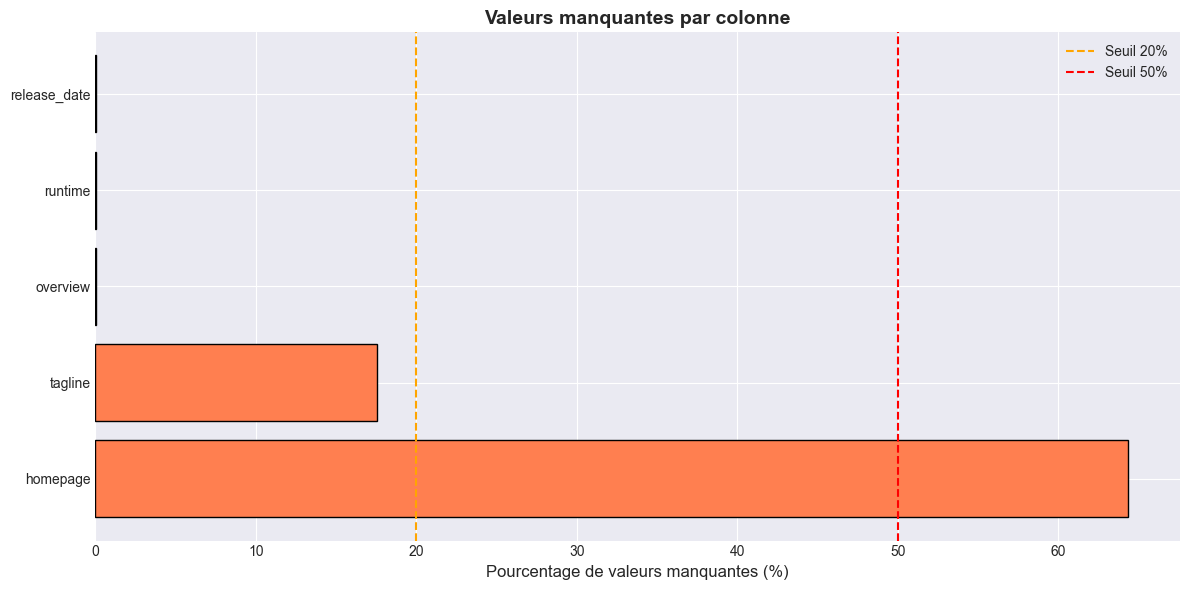

In [4]:
print("="*80)
print("ANALYSE DES VALEURS MANQUANTES")
print("="*80)

# Calcul des valeurs manquantes
missing_data = pd.DataFrame({
    'Colonne': df.columns,
    'Nb_Manquantes': df.isnull().sum(),
    'Pourcentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Nb_Manquantes'] > 0].sort_values(
    'Nb_Manquantes', ascending=False
)

print("\n📋 Résumé des valeurs manquantes:")
if len(missing_data) > 0:
    display(missing_data)

    
    # Visualisation
    plt.figure(figsize=(12, 6))
    plt.barh(missing_data['Colonne'], missing_data['Pourcentage'], color='coral', edgecolor='black')
    plt.xlabel('Pourcentage de valeurs manquantes (%)', fontsize=12)
    plt.title('Valeurs manquantes par colonne', fontsize=14, fontweight='bold')
    plt.axvline(x=20, color='orange', linestyle='--', label='Seuil 20%')
    plt.axvline(x=50, color='red', linestyle='--', label='Seuil 50%')
    plt.legend()
    plt.tight_layout()
    plt.show()

    
else:
    print("✅ Aucune valeur manquante détectée!")

In [5]:
print("="*80)
print("SÉLECTION DES VARIABLES PERTINENTES")
print("="*80)

# Colonnes à conserver (disponibles AVANT ou AU MOMENT de la sortie)
cols = [
    "budget",           # Coût de production
    "runtime",          # Durée du film
    "genres",           # Catégories du film
    "popularity",       # Score de popularité
    "original_language", # Langue originale
    "release_date",     # Date de sortie
    "vote_average",     # Note moyenne (⚠️ peut être data leakage)
    "vote_count",       # Nombre de votes (⚠️ peut être data leakage)
    "revenue"           # Revenus générés
]

print("\n📋 Colonnes sélectionnées:")
for i, col in enumerate(cols, 1):
    print(f"  {i}. {col}")

df = df[cols].copy()

print(f"\n✅ Dataset réduit: {df.shape[0]} lignes × {df.shape[1]} colonnes")

print("\n💡 JUSTIFICATION DES CHOIX:")
print("  ✓ budget: Investissement initial → Influence le succès")
print("  ✓ runtime: Durée → Peut affecter l'engagement")
print("  ✓ genres: Type de film → Certains genres plus rentables")
print("  ✓ popularity: Indicateur d'intérêt → Prédictif du succès")
print("  ✓ original_language: Marché visé → Influence revenue")
print("  ✓ release_date: Saisonnalité → Certaines périodes plus lucratives")
print("  ⚠️ vote_average/vote_count: Peuvent être disponibles après sortie")
print("  ✓ revenue: Variable pour calculer le ROI (succès)")


display(df.head())

SÉLECTION DES VARIABLES PERTINENTES

📋 Colonnes sélectionnées:
  1. budget
  2. runtime
  3. genres
  4. popularity
  5. original_language
  6. release_date
  7. vote_average
  8. vote_count
  9. revenue

✅ Dataset réduit: 4803 lignes × 9 colonnes

💡 JUSTIFICATION DES CHOIX:
  ✓ budget: Investissement initial → Influence le succès
  ✓ runtime: Durée → Peut affecter l'engagement
  ✓ genres: Type de film → Certains genres plus rentables
  ✓ popularity: Indicateur d'intérêt → Prédictif du succès
  ✓ original_language: Marché visé → Influence revenue
  ✓ release_date: Saisonnalité → Certaines périodes plus lucratives
  ⚠️ vote_average/vote_count: Peuvent être disponibles après sortie
  ✓ revenue: Variable pour calculer le ROI (succès)


,budget,runtime,genres,popularity,original_language,release_date,vote_average,vote_count,revenue
0,237000000,162.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,en,2009-12-10,7.2,11800,2787965087
1,300000000,169.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,en,2007-05-19,6.9,4500,961000000
2,245000000,148.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,en,2015-10-26,6.3,4466,880674609
3,250000000,165.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,en,2012-07-16,7.6,9106,1084939099
4,260000000,132.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,en,2012-03-07,6.1,2124,284139100


DIAGNOSTIC QUALITÉ DES DONNÉES (AVANT NETTOYAGE)

📊 Taille actuelle: 4803 films × 9 colonnes

1️⃣ VALEURS MANQUANTES (NaN)
--------------------------------------------------------------------------------


,Valeurs_manquantes,Pourcentage (%)
runtime,2,0.04
release_date,1,0.02



💡 INTERPRÉTATION:
  • NaN = données véritablement absentes
  • Action: Supprimer lignes OU imputer selon le %

2️⃣ VALEURS NULLES (0) DANS LES VARIABLES NUMÉRIQUES
--------------------------------------------------------------------------------


,Valeurs_nulles_0,Pourcentage (%)
budget,1037,21.59
runtime,35,0.73
revenue,1427,29.71
popularity,1,0.02
vote_average,63,1.31
vote_count,62,1.29



💡 INTERPRÉTATION:
  • budget = 0: Données manquantes déguisées → À imputer
  • runtime = 0: Erreur → À supprimer
  • revenue = 0: Peut être légitime (film non distribué) → À analyser
  • vote_count = 0: Film sans votes → À supprimer si on utilise votes

3️⃣ VALEURS NÉGATIVES (ANOMALIES)
--------------------------------------------------------------------------------


,Nb_valeurs_négatives



💡 INTERPRÉTATION:
  • Valeurs négatives = ERREURS de saisie
  • Budget, revenue, runtime ne peuvent être négatifs
  • Action: Supprimer ces lignes

4️⃣ RÉSUMÉ STATISTIQUE
--------------------------------------------------------------------------------


,budget,runtime,revenue,popularity,vote_average,vote_count
count,4.803000e+03,4801.000000,4.803000e+03,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,106.875859,8.226064e+07,21.492301,6.092172,690.217989
std,4.072239e+07,22.611935,1.628571e+08,31.816650,1.194612,1234.585891
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,94.000000,0.000000e+00,4.668070,5.600000,54.000000
50%,1.500000e+07,103.000000,1.917000e+07,12.921594,6.200000,235.000000
75%,4.000000e+07,118.000000,9.291719e+07,28.313505,6.800000,737.000000
max,3.800000e+08,338.000000,2.787965e+09,875.581305,10.000000,13752.000000



💡 CE QU'IL FAUT REGARDER:
  • min: Si = 0 pour budget/runtime → Problème
  • max: Si extrême → Vérifier outliers
  • mean vs 50%: Si très différents → Distribution asymétrique
  • std élevé: Grande variabilité dans les données


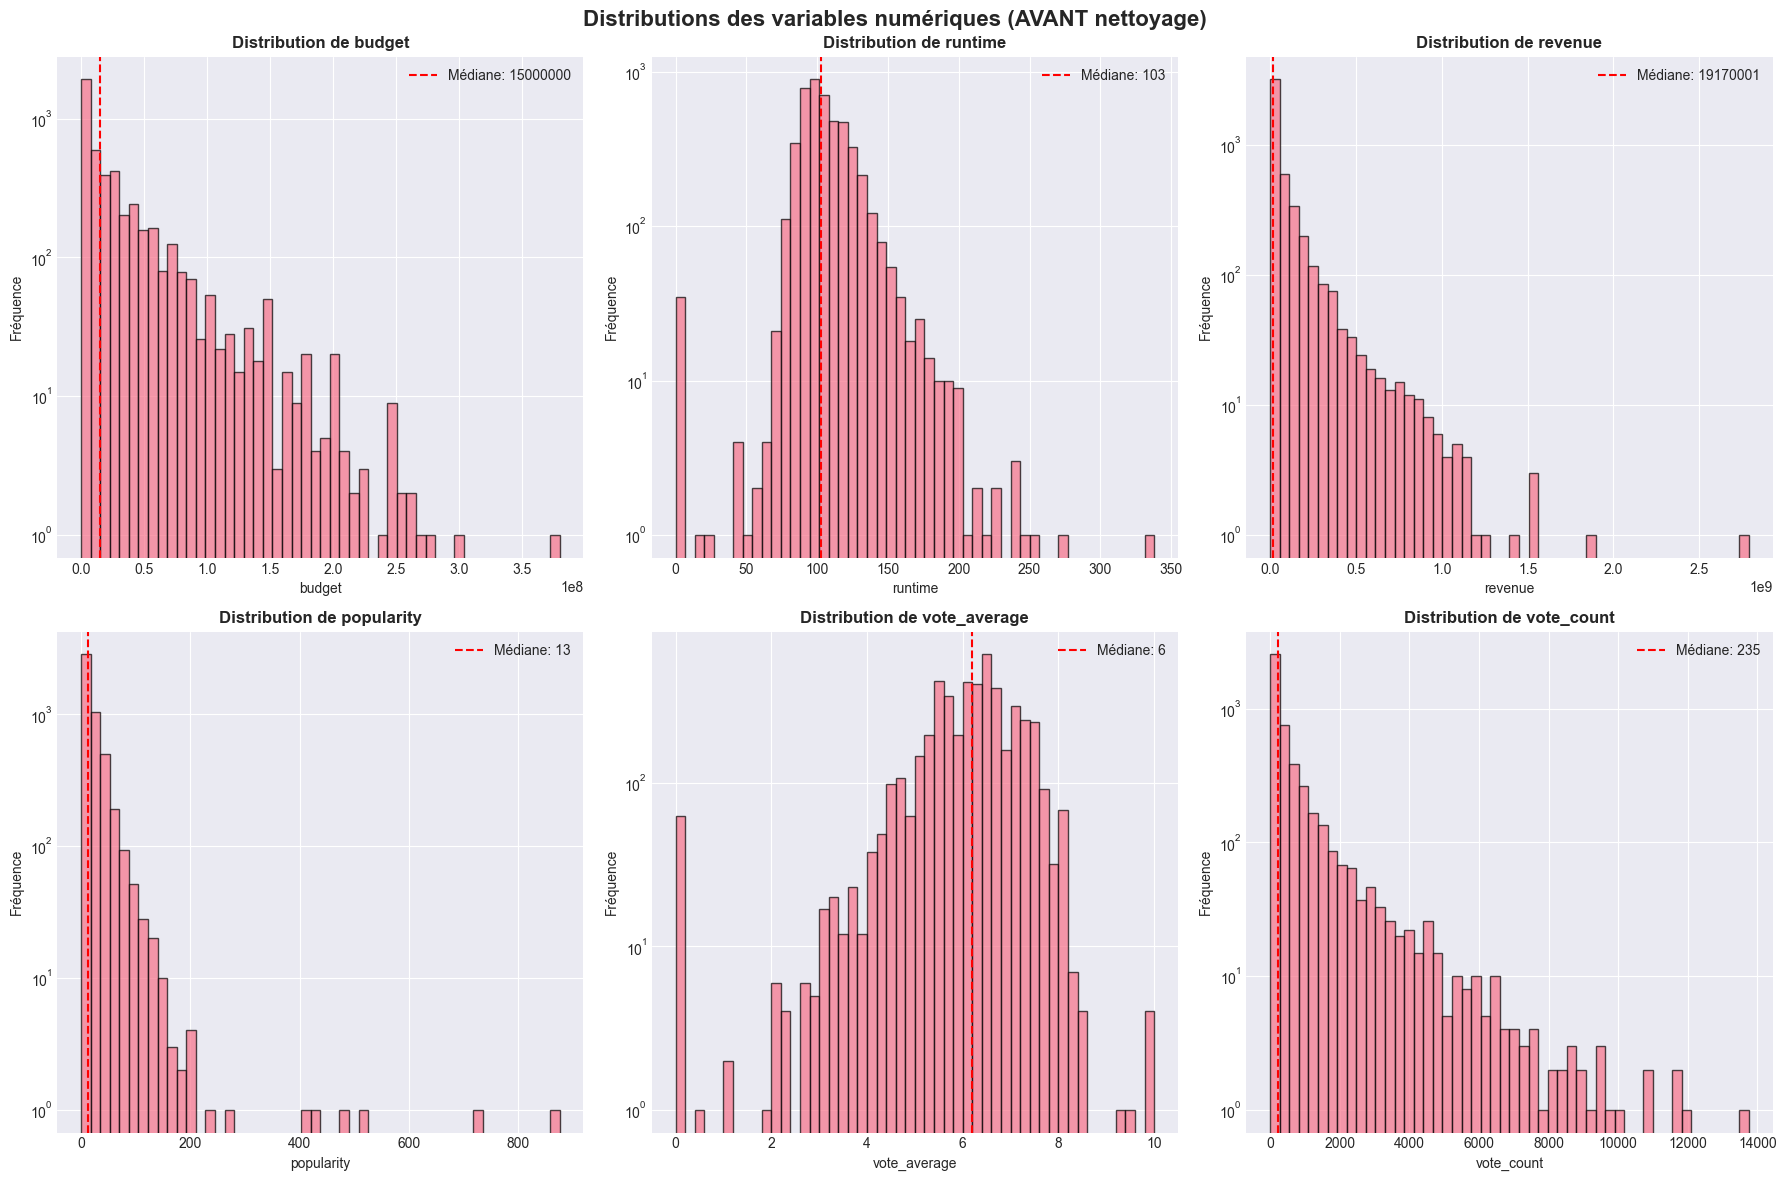


🎯 RÉSUMÉ DU DIAGNOSTIC:
  • Total de films: 4803
  • Films avec budget = 0: 1037
  • Films avec runtime = 0: 35
  • Films avec revenue = 0: 1427
  • Films avec valeurs manquantes: 3


In [6]:
print("="*80)
print("DIAGNOSTIC QUALITÉ DES DONNÉES (AVANT NETTOYAGE)")
print("="*80)

print(f"\n📊 Taille actuelle: {df.shape[0]} films × {df.shape[1]} colonnes")

# 1️⃣ Valeurs manquantes (NaN)
print("\n1️⃣ VALEURS MANQUANTES (NaN)")
print("-" * 80)
missing = df.isna().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    "Valeurs_manquantes": missing,
    "Pourcentage (%)": missing_percent.round(2)
})
display(missing_df[missing_df["Valeurs_manquantes"] > 0])

print("\n💡 INTERPRÉTATION:")
print("  • NaN = données véritablement absentes")
print("  • Action: Supprimer lignes OU imputer selon le %")

# 2️⃣ Valeurs nulles (0) pour variables numériques
print("\n2️⃣ VALEURS NULLES (0) DANS LES VARIABLES NUMÉRIQUES")
print("-" * 80)
numeric_cols = ['budget', 'runtime', 'revenue', 'popularity', 'vote_average', 'vote_count']

zeros_df = pd.DataFrame({
    "Valeurs_nulles_0": (df[numeric_cols] == 0).sum(),
    "Pourcentage (%)": ((df[numeric_cols] == 0).sum() / len(df) * 100).round(2)
})
display(zeros_df[zeros_df["Valeurs_nulles_0"] > 0])

print("\n💡 INTERPRÉTATION:")
print("  • budget = 0: Données manquantes déguisées → À imputer")
print("  • runtime = 0: Erreur → À supprimer")
print("  • revenue = 0: Peut être légitime (film non distribué) → À analyser")
print("  • vote_count = 0: Film sans votes → À supprimer si on utilise votes")

# 3️⃣ Valeurs négatives (anomalies)
print("\n3️⃣ VALEURS NÉGATIVES (ANOMALIES)")
print("-" * 80)
negatives = {
    col: (df[col] < 0).sum()
    for col in numeric_cols if col in df.columns
}
neg_df = pd.DataFrame.from_dict(
    negatives, orient="index", columns=["Nb_valeurs_négatives"]
)
display(neg_df[neg_df["Nb_valeurs_négatives"] > 0])

print("\n💡 INTERPRÉTATION:")
print("  • Valeurs négatives = ERREURS de saisie")
print("  • Budget, revenue, runtime ne peuvent être négatifs")
print("  • Action: Supprimer ces lignes")

# 4️⃣ Résumé statistique
print("\n4️⃣ RÉSUMÉ STATISTIQUE")
print("-" * 80)
display(df[numeric_cols].describe())

print("\n💡 CE QU'IL FAUT REGARDER:")
print("  • min: Si = 0 pour budget/runtime → Problème")
print("  • max: Si extrême → Vérifier outliers")
print("  • mean vs 50%: Si très différents → Distribution asymétrique")
print("  • std élevé: Grande variabilité dans les données")

# 5️⃣ Visualisation des distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    axes[idx].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution de {col}', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Fréquence')
    axes[idx].set_yscale('log')  # Échelle log pour mieux voir
    
    # Ajouter une ligne verticale pour la médiane
    median_val = df[col].median()
    axes[idx].axvline(median_val, color='red', linestyle='--', 
                     label=f'Médiane: {median_val:.0f}')
    axes[idx].legend()

plt.suptitle('Distributions des variables numériques (AVANT nettoyage)', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n🎯 RÉSUMÉ DU DIAGNOSTIC:")
print(f"  • Total de films: {len(df)}")
print(f"  • Films avec budget = 0: {(df['budget'] == 0).sum()}")
print(f"  • Films avec runtime = 0: {(df['runtime'] == 0).sum()}")
print(f"  • Films avec revenue = 0: {(df['revenue'] == 0).sum()}")
print(f"  • Films avec valeurs manquantes: {df.isna().any(axis=1).sum()}")

In [7]:
print("="*80)
print("NETTOYAGE DES DONNÉES - PIPELINE STRUCTURÉ")
print("="*80)

# Taille initiale
initial_size = len(df)
print(f"\n📊 Taille initiale: {initial_size} films")

# 1️⃣ Supprimer les NaN critiques (runtime et release_date sont essentiels)
print("\n1️⃣ Suppression des NaN critiques (runtime, release_date)")
print("-" * 80)
before = len(df)
df = df.dropna(subset=["runtime", "release_date"])
after = len(df)
print(f"  • Lignes supprimées: {before - after}")
print(f"  • Lignes restantes: {after}")
print(f"  💡 Runtime et release_date sont indispensables pour l'analyse")

# 2️⃣ Filtrer runtime invalide (0 ou négatif)
print("\n2️⃣ Filtrage runtime invalide (runtime <= 0)")
print("-" * 80)
before = len(df)
df = df[df["runtime"] > 0]
after = len(df)
print(f"  • Lignes supprimées: {before - after}")
print(f"  • Lignes restantes: {after}")
print(f"  💡 Un film avec durée nulle/négative = erreur de données")

# 3️⃣ Traitement du budget
print("\n3️⃣ Traitement du budget")
print("-" * 80)
# Convertir en numérique
df["budget"] = pd.to_numeric(df["budget"], errors="coerce")

# Créer un indicateur de budget manquant (pour le modèle)
df["budget_missing"] = (df["budget"].isna() | (df["budget"] == 0)).astype(int)

# Compter les budgets manquants
missing_budget_count = df["budget_missing"].sum()
print(f"  • Budgets manquants ou = 0: {missing_budget_count} ({missing_budget_count/len(df)*100:.1f}%)")

# Imputer par la médiane (plus robuste que la moyenne face aux outliers)
median_budget = df.loc[df["budget"] > 0, "budget"].median()
df.loc[(df["budget"].isna()) | (df["budget"] <= 0), "budget"] = median_budget

print(f"  • Médiane utilisée pour imputation: ${median_budget:,.0f}")
print(f"  💡 Médiane choisie car robuste face aux outliers (blockbusters)")
print(f"  💡 Feature 'budget_missing' créée pour informer le modèle")

# 4️⃣ Traitement du revenue
print("\n4️⃣ Traitement du revenue")
print("-" * 80)
df["revenue"] = pd.to_numeric(df["revenue"], errors="coerce")

# Supprimer les revenues négatifs (erreurs)
before = len(df)
df = df[df["revenue"] >= 0]
after = len(df)
print(f"  • Revenues négatifs supprimés: {before - after}")
print(f"  💡 Revenue négatif = erreur de données impossible")

# ⚠️ Garder revenue = 0 car peut être légitime (film non sorti, flop total)
zero_revenue = (df["revenue"] == 0).sum()
print(f"  • Films avec revenue = 0 conservés: {zero_revenue}")
print(f"  💡 Revenue = 0 peut être légitime (pas de distribution, flop)")

# 5️⃣ Reset index
df.reset_index(drop=True, inplace=True)

# 6️⃣ Vérification finale
print("\n6️⃣ VÉRIFICATION POST-NETTOYAGE")
print("-" * 80)
print(f"  ✓ Budget <= 0: {(df['budget'] <= 0).sum()} (devrait être 0)")
print(f"  ✓ Runtime <= 0: {(df['runtime'] <= 0).sum()} (devrait être 0)")
print(f"  ✓ Revenue < 0: {(df['revenue'] < 0).sum()} (devrait être 0)")
print(f"  ✓ NaN restants: {df.isna().sum().sum()}")

print(f"\n📊 BILAN DU NETTOYAGE:")
print(f"  • Taille initiale: {initial_size} films")
print(f"  • Taille finale: {len(df)} films")
print(f"  • Perte: {initial_size - len(df)} films ({(initial_size - len(df))/initial_size*100:.1f}%)")

if ((initial_size - len(df))/initial_size*100) > 30:
    print(f"  ⚠️ ATTENTION: Plus de 30% de données perdues!")
else:
    print(f"  ✅ Perte de données acceptable (<30%)")

NETTOYAGE DES DONNÉES - PIPELINE STRUCTURÉ

📊 Taille initiale: 4803 films

1️⃣ Suppression des NaN critiques (runtime, release_date)
--------------------------------------------------------------------------------
  • Lignes supprimées: 3
  • Lignes restantes: 4800
  💡 Runtime et release_date sont indispensables pour l'analyse

2️⃣ Filtrage runtime invalide (runtime <= 0)
--------------------------------------------------------------------------------
  • Lignes supprimées: 34
  • Lignes restantes: 4766
  💡 Un film avec durée nulle/négative = erreur de données

3️⃣ Traitement du budget
--------------------------------------------------------------------------------
  • Budgets manquants ou = 0: 1004 (21.1%)
  • Médiane utilisée pour imputation: $23,000,000
  💡 Médiane choisie car robuste face aux outliers (blockbusters)
  💡 Feature 'budget_missing' créée pour informer le modèle

4️⃣ Traitement du revenue
--------------------------------------------------------------------------------
 

EXTRACTION ET NETTOYAGE DES GENRES

🔄 Extraction des genres depuis le format JSON...
✅ Extraction terminée!

📊 ANALYSE DES GENRES
--------------------------------------------------------------------------------
Nombre total de genres uniques: 20
Nombre total d'occurrences de genres: 12118
Nombre moyen de genres par film: 2.54

📋 Top 15 des genres les plus fréquents:


Drama              2289
Comedy             1716
Thriller           1271
Action             1153
Romance             892
Adventure           789
Crime               693
Science Fiction     535
Family              511
Horror              511
Fantasy             424
Mystery             347
Animation           234
History             196
Music               184
Name: count, dtype: int64


💡 INTERPRÉTATION:
  • Genre le plus fréquent: Drama (2289 films)
  • Certains films ont plusieurs genres (multi-label)
  • Genres rares peuvent être peu informatifs pour le modèle

📈 Distribution du nombre de genres par film:
genres
0      15
1     889
2    1482
3    1520
4     636
5     187
6      33
7       4
Name: count, dtype: int64

💡 OBSERVATIONS:
  • Films sans genre: 15
  • Films avec 1 genre: 889
  • Films avec 2+ genres: 3862


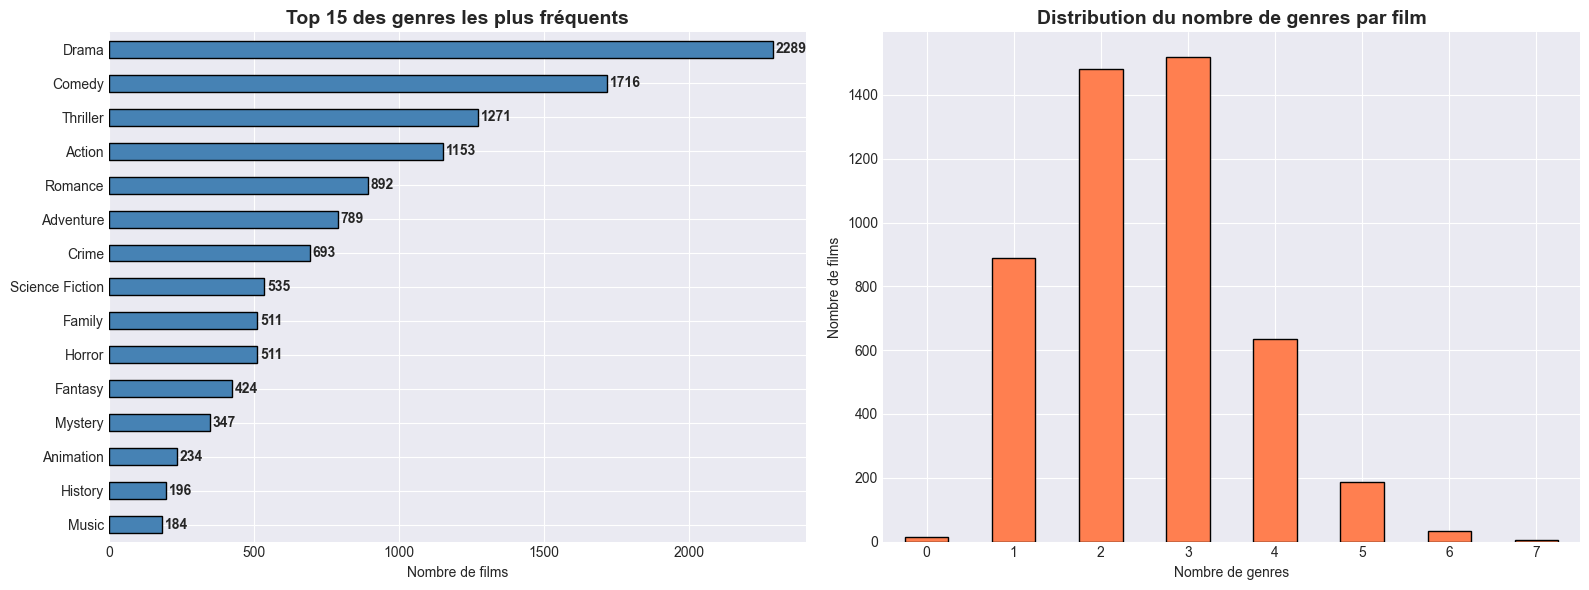


🎯 POINTS CLÉS À RETENIR:
  1. Les genres sont multi-label (un film peut avoir plusieurs genres)
  2. Certains genres dominent (Drama, Comedy, Thriller)
  3. Les genres rares devront être encodés correctement
  4. Le nombre de genres peut être une feature intéressante


,genres
0,"[Action, Adventure, Fantasy, Science Fiction]"
1,"[Adventure, Fantasy, Action]"
2,"[Action, Adventure, Crime]"
3,"[Action, Crime, Drama, Thriller]"
4,"[Action, Adventure, Science Fiction]"
5,"[Fantasy, Action, Adventure]"
6,"[Animation, Family]"
7,"[Action, Adventure, Science Fiction]"
8,"[Adventure, Fantasy, Family]"
9,"[Action, Adventure, Fantasy]"


In [8]:
print("="*80)
print("EXTRACTION ET NETTOYAGE DES GENRES")
print("="*80)

# Fonction d'extraction
def extract_genre_names(genres_str):
    """
    Extrait les noms de genres depuis une chaîne JSON
    Input: '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}]'
    Output: ['Action', 'Adventure']
    """
    try:
        genres = ast.literal_eval(genres_str)
        return [g["name"] for g in genres]
    except:
        return []

# Application de la fonction
print("\n🔄 Extraction des genres depuis le format JSON...")
df["genres"] = df["genres"].apply(extract_genre_names)
print("✅ Extraction terminée!")

# Analyse des genres
print("\n📊 ANALYSE DES GENRES")
print("-" * 80)

# Compter tous les genres
all_genres = [genre for sublist in df["genres"] for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts()

print(f"Nombre total de genres uniques: {len(genre_counts)}")
print(f"Nombre total d'occurrences de genres: {len(all_genres)}")
print(f"Nombre moyen de genres par film: {len(all_genres)/len(df):.2f}")

print(f"\n📋 Top 15 des genres les plus fréquents:")
display(genre_counts.head(15))

print("\n💡 INTERPRÉTATION:")
print(f"  • Genre le plus fréquent: {genre_counts.index[0]} ({genre_counts.iloc[0]} films)")
print(f"  • Certains films ont plusieurs genres (multi-label)")
print(f"  • Genres rares peuvent être peu informatifs pour le modèle")

# Distribution du nombre de genres par film
num_genres_per_film = df["genres"].apply(len)

print(f"\n📈 Distribution du nombre de genres par film:")
print(num_genres_per_film.value_counts().sort_index())

print(f"\n💡 OBSERVATIONS:")
print(f"  • Films sans genre: {(num_genres_per_film == 0).sum()}")
print(f"  • Films avec 1 genre: {(num_genres_per_film == 1).sum()}")
print(f"  • Films avec 2+ genres: {(num_genres_per_film >= 2).sum()}")

# Visualisations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Top 15 genres
genre_counts.head(15).plot(kind='barh', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_xlabel('Nombre de films')
axes[0].set_title('Top 15 des genres les plus fréquents', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

# Ajouter les valeurs
for i, v in enumerate(genre_counts.head(15)):
    axes[0].text(v + 10, i, str(v), va='center', fontweight='bold')

# 2. Nombre de genres par film
num_genres_per_film.value_counts().sort_index().plot(
    kind='bar', ax=axes[1], color='coral', edgecolor='black'
)
axes[1].set_xlabel('Nombre de genres')
axes[1].set_ylabel('Nombre de films')
axes[1].set_title('Distribution du nombre de genres par film', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

print("\n🎯 POINTS CLÉS À RETENIR:")
print("  1. Les genres sont multi-label (un film peut avoir plusieurs genres)")
print("  2. Certains genres dominent (Drama, Comedy, Thriller)")
print("  3. Les genres rares devront être encodés correctement")
print("  4. Le nombre de genres peut être une feature intéressante")

display(df[['genres']].head(10))

CRÉATION DU SCORE DE SUCCÈS CONFIGURABLE

🔧 CALCUL DU SCORE DE SUCCÈS
--------------------------------------------------------------------------------

📊 Paramètres par défaut:
  • ROI weight: 50%
  • Popularity weight: 30%
  • Rating weight: 20%

  • ROI threshold (échec): < 0.5x
  • ROI threshold (succès): > 2.0x

✅ Calcul terminé!

📊 STATISTIQUES DU SCORE DE SUCCÈS
--------------------------------------------------------------------------------
                ROI  success_score      success
count  4.766000e+03    4766.000000  4766.000000
mean   2.001947e+03      45.435483     0.746328
std    1.239699e+05      13.777726     0.692686
min    0.000000e+00       0.000000     0.000000
25%    0.000000e+00      37.100000     0.000000
50%    1.128990e+00      43.130000     1.000000
75%    3.226463e+00      52.607500     1.000000
max    8.500000e+06      90.400000     2.000000

📈 DISTRIBUTION DES CLASSES DE SUCCÈS
------------------------------------------------------------------------------

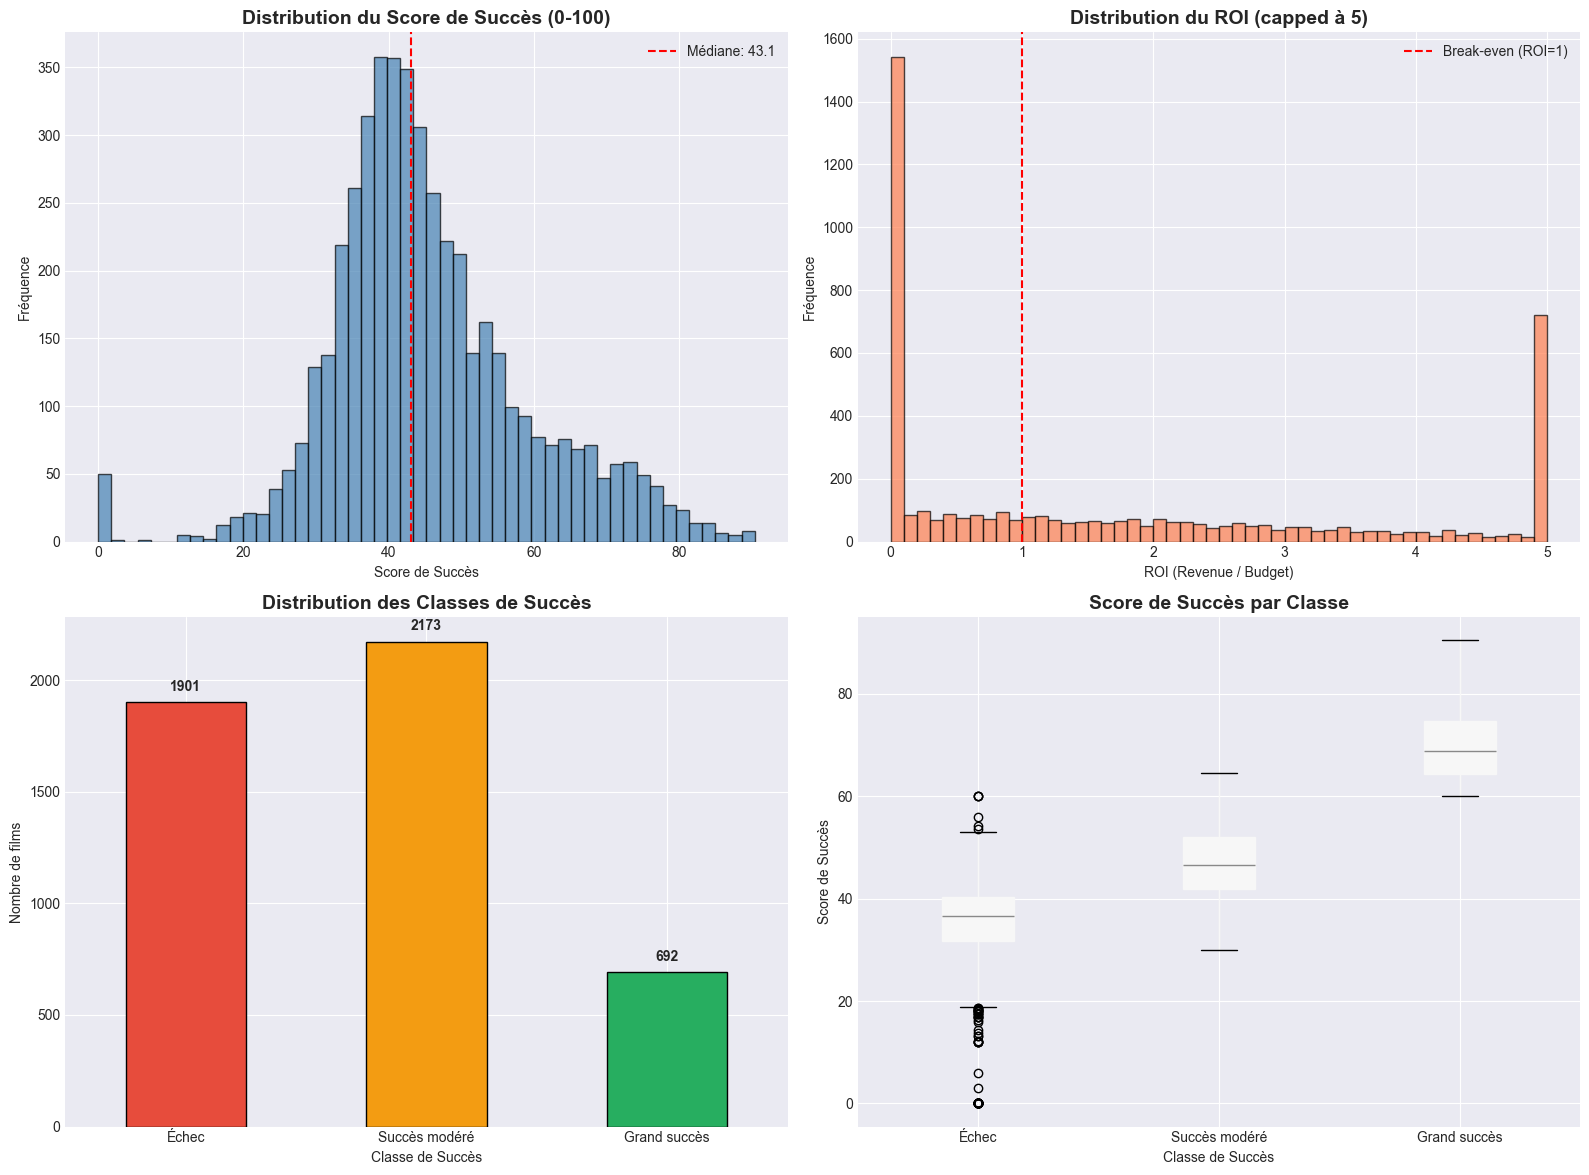


🎯 POINTS CLÉS:
  1. Le score combine ROI, popularité et note avec des poids configurables
  2. Les seuils de classification sont ajustables
  3. Cette approche est plus nuancée qu'un simple ROI > budget
  4. Les poids peuvent être modifiés dans le dashboard Streamlit

📝 EXEMPLES DE FILMS PAR CLASSE:
--------------------------------------------------------------------------------

Échec (Classe 0):


,budget,revenue,ROI,popularity,vote_average,success_score
13,255000000,89289910,0.350157,49.046956,5.9,41.36
83,27000000,0,0.000000,2.418535,4.8,29.04
135,150000000,0,0.000000,21.214571,5.5,35.12



Succès modéré (Classe 1):


,budget,revenue,ROI,popularity,vote_average,success_score
2,245000000,880674609,3.594590,107.376788,6.3,58.58
4,260000000,284139100,1.092843,43.926995,6.1,44.27
5,258000000,890871626,3.452991,115.699814,5.9,55.76



Grand succès (Classe 2):


,budget,revenue,ROI,popularity,vote_average,success_score
0,237000000,2787965087,11.763566,150.437577,7.2,83.20
1,300000000,961000000,3.203333,139.082615,6.9,61.01
3,250000000,1084939099,4.339756,112.312950,7.6,68.62


In [9]:
print("="*80)
print("CRÉATION DU SCORE DE SUCCÈS CONFIGURABLE")
print("="*80)

def calculate_success_score(df, roi_weight=0.5, popularity_weight=0.3, rating_weight=0.2,
                           roi_threshold_low=0.5, roi_threshold_high=2.0,
                           popularity_threshold_low=5, popularity_threshold_high=20,
                           rating_threshold_low=6.0, rating_threshold_high=7.5):
    """
    Calcule un score de succès pondéré combinant ROI, popularité et note
    
    Paramètres configurables:
    --------------------------
    Poids (doivent sommer à 1.0):
        roi_weight: Poids du ROI (Return on Investment)
        popularity_weight: Poids de la popularité
        rating_weight: Poids de la note moyenne
    
    Seuils ROI:
        roi_threshold_low: ROI faible (échec)
        roi_threshold_high: ROI élevé (grand succès)
    
    Seuils Popularité:
        popularity_threshold_low: Popularité faible
        popularity_threshold_high: Popularité élevée
    
    Seuils Rating:
        rating_threshold_low: Note faible
        rating_threshold_high: Note élevée
    
    Retour:
    -------
    success_score: Score normalisé entre 0 et 100
    success_class: Classe de succès (0=Échec, 1=Modéré, 2=Succès)
    """
    
    # Vérifier que les poids somment à 1
    total_weight = roi_weight + popularity_weight + rating_weight
    if not np.isclose(total_weight, 1.0):
        print(f"⚠️ ATTENTION: Les poids somment à {total_weight}, normalisation automatique...")
        roi_weight /= total_weight
        popularity_weight /= total_weight
        rating_weight /= total_weight
    
    df_work = df.copy()
    
    # 1️⃣ Calculer le ROI
    df_work["ROI"] = df_work["revenue"] / df_work["budget"]
    df_work["ROI"] = df_work["ROI"].replace([np.inf, -np.inf], np.nan)
    
    # 2️⃣ Normaliser chaque composante entre 0 et 1
    
    # ROI normalisé (0 = perte totale, 1 = ROI exceptionnel)
    df_work["ROI_normalized"] = df_work["ROI"].clip(0, 10) / 10  # Cap à 10x le budget
    
    # Popularité normalisée
    df_work["popularity_normalized"] = df_work["popularity"].clip(0, 100) / 100
    
    # Rating normalisé (0-10 scale)
    df_work["rating_normalized"] = df_work["vote_average"] / 10
    
    # 3️⃣ Calculer le score pondéré
    df_work["success_score_raw"] = (
        roi_weight * df_work["ROI_normalized"] +
        popularity_weight * df_work["popularity_normalized"] +
        rating_weight * df_work["rating_normalized"]
    )
    
    # Convertir en score 0-100
    df_work["success_score"] = (df_work["success_score_raw"] * 100).round(2)
    
    # 4️⃣ Créer les classes de succès basées sur des seuils
    # On utilise principalement le ROI pour les classes, mais le score global influence
    
    def classify_success(row):
        roi = row["ROI"]
        score = row["success_score"]
        
        # Échec: ROI < seuil bas OU score < 30
        if roi < roi_threshold_low or score < 30:
            return 0  # Échec
        # Succès modéré: ROI entre seuils OU score entre 30-60
        elif roi < roi_threshold_high or score < 60:
            return 1  # Succès modéré
        # Grand succès: ROI élevé ET score élevé
        else:
            return 2  # Grand succès
    
    df_work["success_class"] = df_work.apply(classify_success, axis=1)
    
    return df_work[["ROI", "success_score", "success_class"]]


# Application avec paramètres par défaut
print("\n🔧 CALCUL DU SCORE DE SUCCÈS")
print("-" * 80)
print("\n📊 Paramètres par défaut:")
print("  • ROI weight: 50%")
print("  • Popularity weight: 30%")
print("  • Rating weight: 20%")
print("\n  • ROI threshold (échec): < 0.5x")
print("  • ROI threshold (succès): > 2.0x")

success_metrics = calculate_success_score(
    df,
    roi_weight=0.3,
    popularity_weight=0.1,
    rating_weight=0.6
)

# Ajouter au dataframe principal
df["ROI"] = success_metrics["ROI"]
df["success_score"] = success_metrics["success_score"]
df["success"] = success_metrics["success_class"]

print("\n✅ Calcul terminé!")

# Afficher les statistiques
print("\n📊 STATISTIQUES DU SCORE DE SUCCÈS")
print("-" * 80)
print(df[["ROI", "success_score", "success"]].describe())

print("\n📈 DISTRIBUTION DES CLASSES DE SUCCÈS")
print("-" * 80)
class_dist = df["success"].value_counts().sort_index()
print(class_dist)
print("\nProportions:")
print((class_dist / len(df) * 100).round(2))

print("\n💡 INTERPRÉTATION:")
print(f"  • Classe 0 (Échec): {class_dist[0]} films ({class_dist[0]/len(df)*100:.1f}%)")
print(f"  • Classe 1 (Succès modéré): {class_dist[1]} films ({class_dist[1]/len(df)*100:.1f}%)")
print(f"  • Classe 2 (Grand succès): {class_dist[2]} films ({class_dist[2]/len(df)*100:.1f}%)")

# Visualisations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribution du score de succès
axes[0, 0].hist(df["success_score"], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_title('Distribution du Score de Succès (0-100)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Score de Succès')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].axvline(df["success_score"].median(), color='red', linestyle='--', 
                    label=f'Médiane: {df["success_score"].median():.1f}')
axes[0, 0].legend()

# 2. Distribution du ROI
axes[0, 1].hist(df["ROI"].clip(0, 5), bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[0, 1].set_title('Distribution du ROI (capped à 5)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('ROI (Revenue / Budget)')
axes[0, 1].set_ylabel('Fréquence')
axes[0, 1].axvline(1, color='red', linestyle='--', label='Break-even (ROI=1)')
axes[0, 1].legend()

# 3. Distribution des classes
colors = ['#e74c3c', '#f39c12', '#27ae60']
class_dist.plot(kind='bar', ax=axes[1, 0], color=colors, edgecolor='black')
axes[1, 0].set_title('Distribution des Classes de Succès', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Classe de Succès')
axes[1, 0].set_ylabel('Nombre de films')
axes[1, 0].set_xticklabels(['Échec', 'Succès modéré', 'Grand succès'], rotation=0)
axes[1, 0].tick_params(axis='x', rotation=0)

# Ajouter les valeurs sur les barres
for i, v in enumerate(class_dist):
    axes[1, 0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# 4. Boxplot du score par classe
df.boxplot(column='success_score', by='success', ax=axes[1, 1], patch_artist=True)
axes[1, 1].set_title('Score de Succès par Classe', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Classe de Succès')
axes[1, 1].set_ylabel('Score de Succès')
axes[1, 1].set_xticklabels(['Échec', 'Succès modéré', 'Grand succès'])
plt.suptitle('')  # Supprimer le titre automatique de boxplot

plt.tight_layout()
plt.show()

print("\n🎯 POINTS CLÉS:")
print("  1. Le score combine ROI, popularité et note avec des poids configurables")
print("  2. Les seuils de classification sont ajustables")
print("  3. Cette approche est plus nuancée qu'un simple ROI > budget")
print("  4. Les poids peuvent être modifiés dans le dashboard Streamlit")

# Afficher quelques exemples
print("\n📝 EXEMPLES DE FILMS PAR CLASSE:")
print("-" * 80)
for class_val in [0, 1, 2]:
    class_name = ['Échec', 'Succès modéré', 'Grand succès'][class_val]
    print(f"\n{class_name} (Classe {class_val}):")
    sample = df[df['success'] == class_val][['budget', 'revenue', 'ROI', 'popularity', 
                                              'vote_average', 'success_score']].head(3)
    display(sample)

FEATURE ENGINEERING - EXTRACTION TEMPORELLE

📅 Extraction de l'année de sortie...
✅ Années extraites!
  • Dates invalides supprimées: 0

📊 Plage temporelle du dataset:
  • Année la plus ancienne: 1916
  • Année la plus récente: 2017
  • Étendue: 101 ans

🎬 Création des catégories d'époques...
✅ Catégories créées!

📊 DISTRIBUTION PAR ÈRE:
--------------------------------------------------------------------------------


era
2000s (2000-2009)      2039
2010s+ (2010+)         1421
Classique (< 1980)      252
Moderne (1980-1999)    1054
Name: count, dtype: int64


💡 INTERPRÉTATION:
  • 2000s (2000-2009): 2039 films (42.8%)
  • 2010s+ (2010+): 1421 films (29.8%)
  • Classique (< 1980): 252 films (5.3%)
  • Moderne (1980-1999): 1054 films (22.1%)

🎯 POURQUOI C'EST IMPORTANT:
  • L'industrie du cinéma a évolué au fil des décennies
  • Les budgets moyens ont augmenté
  • Les stratégies marketing ont changé
  • La mondialisation a affecté les revenus
  • L'ère peut être prédictive du succès

📅 SAISONNALITÉ - Mois de sortie:


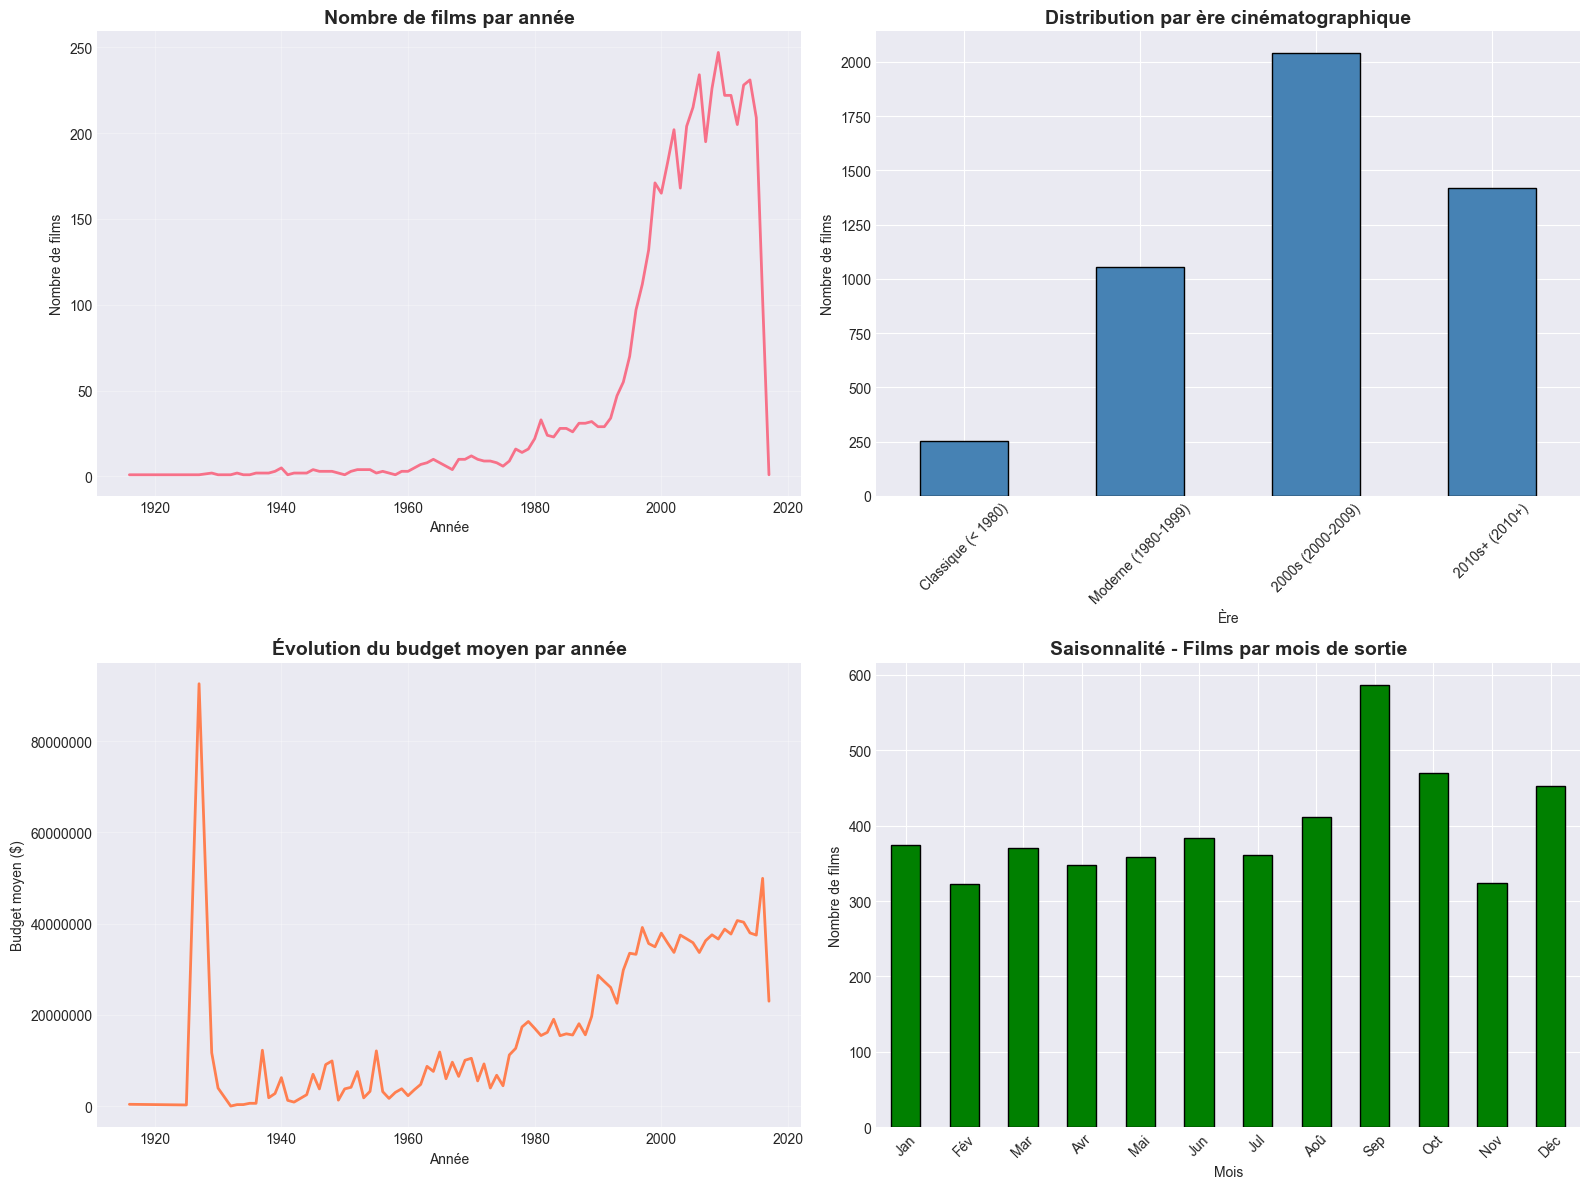


📊 OBSERVATIONS SAISONNIÈRES:
  • Mois avec le plus de sorties: Sep (587 films)
  • Mois avec le moins de sorties: Fév (323 films)

💡 INSIGHTS:
  • Les mois d'été et de fin d'année (vacances) ont souvent plus de sorties
  • Janvier/Février sont souvent creux (éviter la concurrence des fêtes)
  • Le mois de sortie peut influencer le succès (effet saisonnalité)

✅ Features temporelles créées:
  • release_year: Année de sortie
  • era: Époque cinématographique
  • release_month: Mois de sortie
  • is_summer_release: Sortie en été (Jun-Aug)
  • is_holiday_release: Sortie en période de fêtes (Nov-Dec)


,release_date,release_year,era,release_month,is_summer_release,is_holiday_release
0,2009-12-10,2009,2000s (2000-2009),12,0,1
1,2007-05-19,2007,2000s (2000-2009),5,0,0
2,2015-10-26,2015,2010s+ (2010+),10,0,0
3,2012-07-16,2012,2010s+ (2010+),7,1,0
4,2012-03-07,2012,2010s+ (2010+),3,0,0
5,2007-05-01,2007,2000s (2000-2009),5,0,0
6,2010-11-24,2010,2010s+ (2010+),11,0,1
7,2015-04-22,2015,2010s+ (2010+),4,0,0
8,2009-07-07,2009,2000s (2000-2009),7,1,0
9,2016-03-23,2016,2010s+ (2010+),3,0,0


In [10]:
print("="*80)
print("FEATURE ENGINEERING - EXTRACTION TEMPORELLE")
print("="*80)

# Extraire l'année de sortie
print("\n📅 Extraction de l'année de sortie...")
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

# Supprimer les dates invalides
before = len(df)
df = df[df['release_year'].notna()]
after = len(df)
print(f"✅ Années extraites!")
print(f"  • Dates invalides supprimées: {before - after}")

# Convertir en int
df['release_year'] = df['release_year'].astype(int)

print(f"\n📊 Plage temporelle du dataset:")
print(f"  • Année la plus ancienne: {df['release_year'].min()}")
print(f"  • Année la plus récente: {df['release_year'].max()}")
print(f"  • Étendue: {df['release_year'].max() - df['release_year'].min()} ans")

# Créer des catégories d'époques
print("\n🎬 Création des catégories d'époques...")

def categorize_era(year):
    """Catégorise un film selon son époque de sortie"""
    if year < 1980:
        return 'Classique (< 1980)'
    elif year < 2000:
        return 'Moderne (1980-1999)'
    elif year < 2010:
        return '2000s (2000-2009)'
    else:
        return '2010s+ (2010+)'

df['era'] = df['release_year'].apply(categorize_era)

print("✅ Catégories créées!")

print("\n📊 DISTRIBUTION PAR ÈRE:")
print("-" * 80)
era_dist = df['era'].value_counts().sort_index()
display(era_dist)

print("\n💡 INTERPRÉTATION:")
for era, count in era_dist.items():
    pct = count / len(df) * 100
    print(f"  • {era}: {count} films ({pct:.1f}%)")

print("\n🎯 POURQUOI C'EST IMPORTANT:")
print("  • L'industrie du cinéma a évolué au fil des décennies")
print("  • Les budgets moyens ont augmenté")
print("  • Les stratégies marketing ont changé")
print("  • La mondialisation a affecté les revenus")
print("  • L'ère peut être prédictive du succès")

# Extraire aussi le mois de sortie (saisonnalité)
df['release_month'] = pd.to_datetime(df['release_date'], errors='coerce').dt.month

print("\n📅 SAISONNALITÉ - Mois de sortie:")
month_dist = df['release_month'].value_counts().sort_index()

# Visualisations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Films par année
year_counts = df['release_year'].value_counts().sort_index()
axes[0, 0].plot(year_counts.index, year_counts.values, linewidth=2)
axes[0, 0].set_title('Nombre de films par année', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Année')
axes[0, 0].set_ylabel('Nombre de films')
axes[0, 0].grid(alpha=0.3)

# 2. Distribution par ère
era_order = ['Classique (< 1980)', 'Moderne (1980-1999)', '2000s (2000-2009)', '2010s+ (2010+)']
era_dist_ordered = df['era'].value_counts().reindex(era_order)
era_dist_ordered.plot(kind='bar', ax=axes[0, 1], color='steelblue', edgecolor='black')
axes[0, 1].set_title('Distribution par ère cinématographique', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Ère')
axes[0, 1].set_ylabel('Nombre de films')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Évolution du budget moyen par année
budget_by_year = df.groupby('release_year')['budget'].mean()
axes[1, 0].plot(budget_by_year.index, budget_by_year.values, linewidth=2, color='coral')
axes[1, 0].set_title('Évolution du budget moyen par année', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Année')
axes[1, 0].set_ylabel('Budget moyen ($)')
axes[1, 0].grid(alpha=0.3)
axes[1, 0].ticklabel_format(style='plain', axis='y')

# 4. Saisonnalité - Films par mois
month_names = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Jun', 
               'Jul', 'Aoû', 'Sep', 'Oct', 'Nov', 'Déc']
month_dist.plot(kind='bar', ax=axes[1, 1], color='green', edgecolor='black')
axes[1, 1].set_title('Saisonnalité - Films par mois de sortie', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Mois')
axes[1, 1].set_ylabel('Nombre de films')
axes[1, 1].set_xticklabels(month_names, rotation=45)

plt.tight_layout()
plt.show()

print("\n📊 OBSERVATIONS SAISONNIÈRES:")
print(f"  • Mois avec le plus de sorties: {month_names[month_dist.idxmax() - 1]} ({month_dist.max()} films)")
print(f"  • Mois avec le moins de sorties: {month_names[month_dist.idxmin() - 1]} ({month_dist.min()} films)")

print("\n💡 INSIGHTS:")
print("  • Les mois d'été et de fin d'année (vacances) ont souvent plus de sorties")
print("  • Janvier/Février sont souvent creux (éviter la concurrence des fêtes)")
print("  • Le mois de sortie peut influencer le succès (effet saisonnalité)")

# Créer des features dérivées
df['is_summer_release'] = df['release_month'].isin([6, 7, 8]).astype(int)
df['is_holiday_release'] = df['release_month'].isin([11, 12]).astype(int)

print("\n✅ Features temporelles créées:")
print("  • release_year: Année de sortie")
print("  • era: Époque cinématographique")
print("  • release_month: Mois de sortie")
print("  • is_summer_release: Sortie en été (Jun-Aug)")
print("  • is_holiday_release: Sortie en période de fêtes (Nov-Dec)")

display(df[['release_date', 'release_year', 'era', 'release_month', 
            'is_summer_release', 'is_holiday_release']].head(10))

ANALYSE APPROFONDIE: BUDGET vs SUCCÈS

📊 STATISTIQUES DU BUDGET PAR CLASSE DE SUCCÈS:
--------------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Échec,1901.0,2.197101e+07,1.773496e+07,1.0,12000000.0,23000000.0,23000000.0,255000000.0
Succès modéré,2173.0,4.450222e+07,4.304428e+07,4.0,15000000.0,30000000.0,60000000.0,380000000.0
Grand succès,692.0,3.483326e+07,5.192738e+07,1.0,4000000.0,15000000.0,40000000.0,300000000.0



💡 CE QU'IL FAUT REGARDER:
  • mean (moyenne): Budget moyen par classe
  • std (écart-type): Variabilité des budgets
  • 50% (médiane): Budget 'typique' (robuste aux outliers)
  • min/max: Étendue des budgets

🔍 INSIGHTS CLÉS:
  • Budget moyen Échec: $21,971,015
  • Budget moyen Grand succès: $34,833,257
  • Ratio: 1.59x

  ⚠️ Les films à succès ont des budgets PLUS ÉLEVÉS en moyenne
     → Un budget élevé n'est pas une garantie, mais corrélé au succès


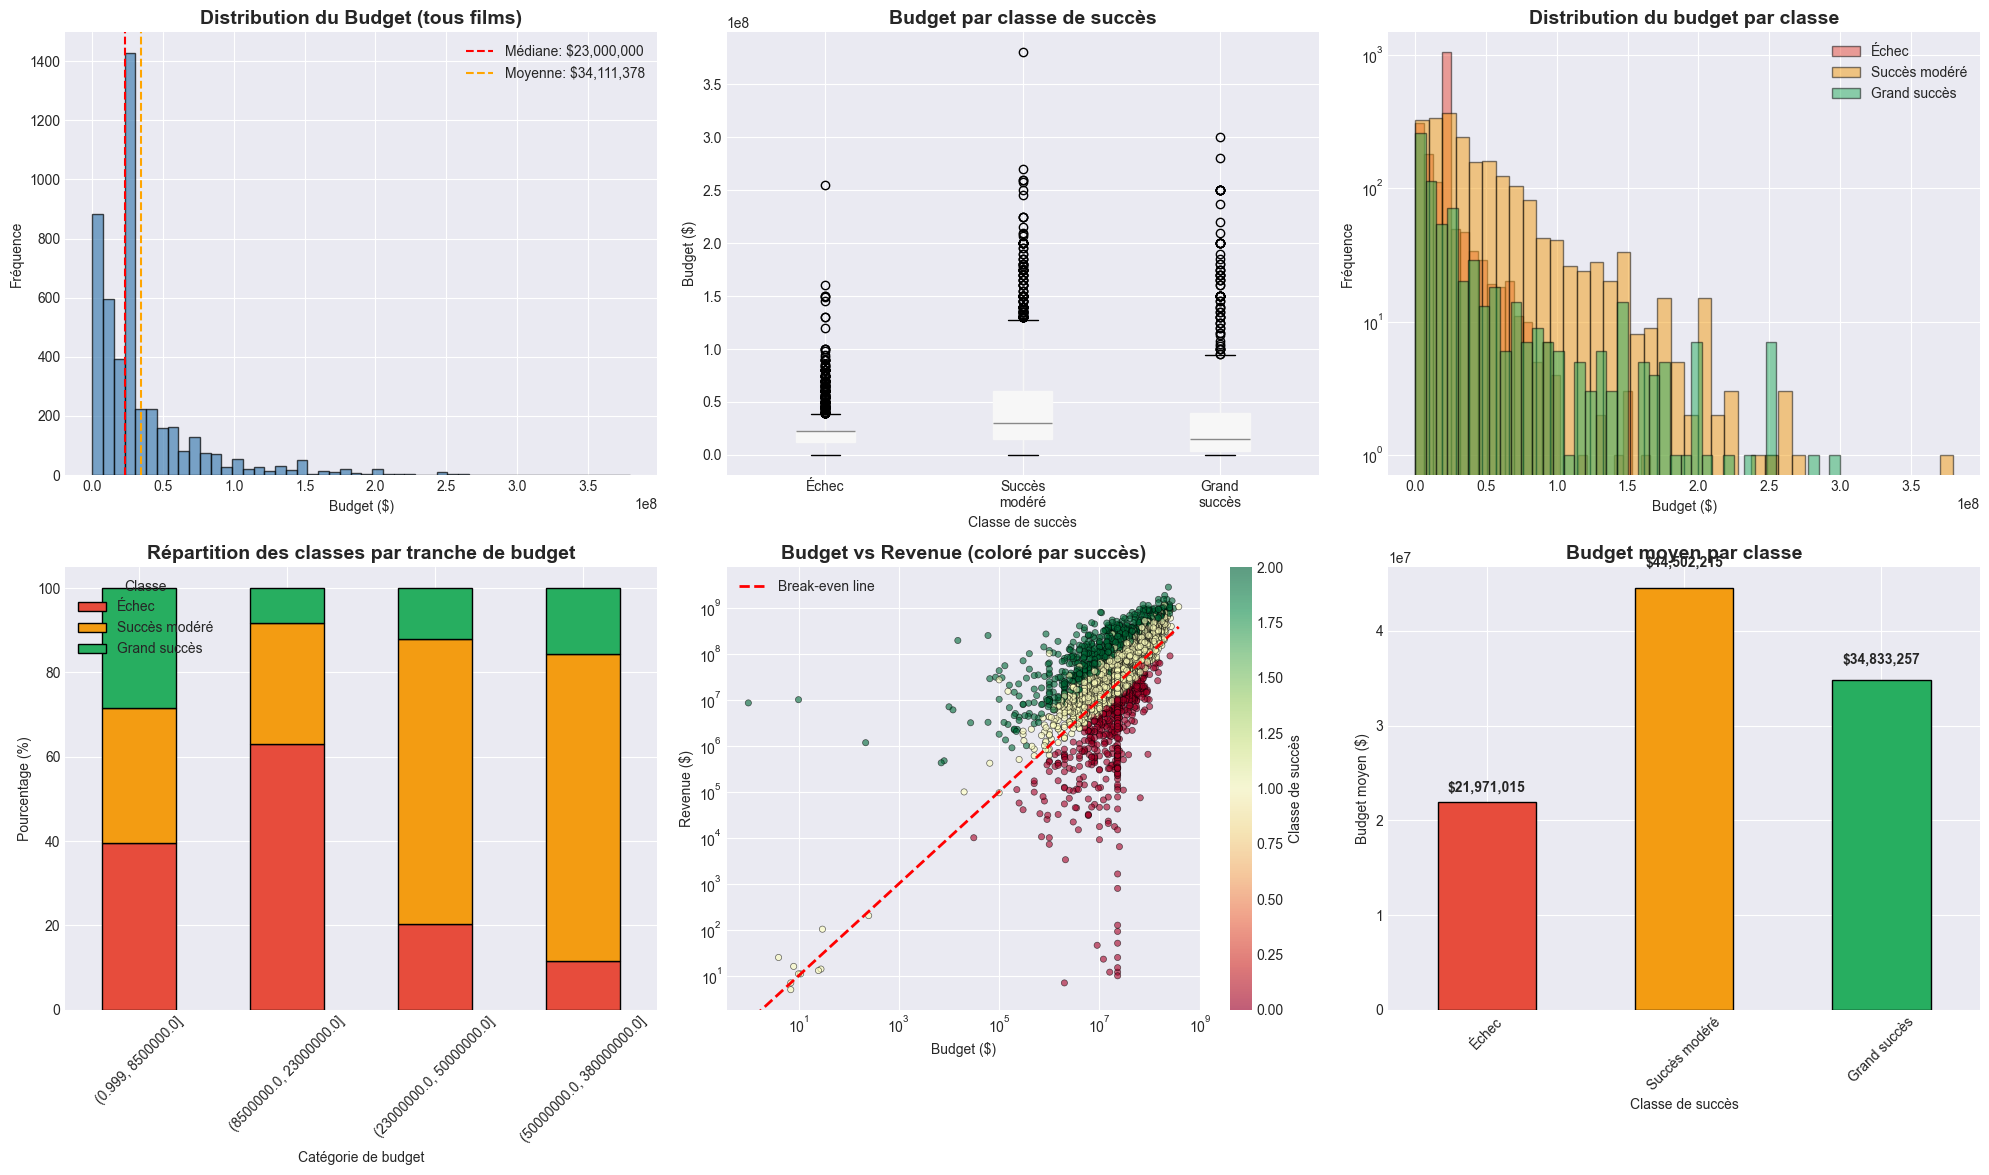


📈 CORRÉLATION BUDGET - SUCCÈS:
--------------------------------------------------------------------------------
Coefficient de corrélation: 0.186
  ⚡ Corrélation positive MODÉRÉE → Budget a un impact mais limité

📊 TAUX DE GRAND SUCCÈS PAR TRANCHE DE BUDGET:
--------------------------------------------------------------------------------
  • (0.999, 8500000.0]: 28.5% de grands succès
  • (8500000.0, 23000000.0]: 8.3% de grands succès
  • (23000000.0, 50000000.0]: 12.2% de grands succès
  • (50000000.0, 380000000.0]: 15.6% de grands succès

🎯 CONCLUSION:
  • Le budget seul ne garantit pas le succès
  • D'autres facteurs sont tout aussi importants


In [11]:
print("="*80)
print("ANALYSE APPROFONDIE: BUDGET vs SUCCÈS")
print("="*80)

# Statistiques descriptives par classe de succès
print("\n📊 STATISTIQUES DU BUDGET PAR CLASSE DE SUCCÈS:")
print("-" * 80)
budget_stats = df.groupby('success')['budget'].describe()
budget_stats.index = ['Échec', 'Succès modéré', 'Grand succès']
display(budget_stats)

print("\n💡 CE QU'IL FAUT REGARDER:")
print("  • mean (moyenne): Budget moyen par classe")
print("  • std (écart-type): Variabilité des budgets")
print("  • 50% (médiane): Budget 'typique' (robuste aux outliers)")
print("  • min/max: Étendue des budgets")

# Comparaisons clés
mean_echec = budget_stats.loc['Échec', 'mean']
mean_succes = budget_stats.loc['Grand succès', 'mean']
print(f"\n🔍 INSIGHTS CLÉS:")
print(f"  • Budget moyen Échec: ${mean_echec:,.0f}")
print(f"  • Budget moyen Grand succès: ${mean_succes:,.0f}")
print(f"  • Ratio: {mean_succes/mean_echec:.2f}x")

if mean_succes > mean_echec:
    print(f"\n  ⚠️ Les films à succès ont des budgets PLUS ÉLEVÉS en moyenne")
    print(f"     → Un budget élevé n'est pas une garantie, mais corrélé au succès")
else:
    print(f"\n  ✅ Les films à succès n'ont PAS nécessairement de gros budgets")
    print(f"     → Le ROI peut être excellent avec des budgets modestes")

# Visualisations complètes
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Distribution du budget (tous films)
axes[0, 0].hist(df["budget"], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_title('Distribution du Budget (tous films)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Budget ($)')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].axvline(df["budget"].median(), color='red', linestyle='--', 
                    label=f'Médiane: ${df["budget"].median():,.0f}')
axes[0, 0].axvline(df["budget"].mean(), color='orange', linestyle='--', 
                    label=f'Moyenne: ${df["budget"].mean():,.0f}')
axes[0, 0].legend()

# 2. Budget par classe (boxplot)
palette_colors = ['#e74c3c', '#f39c12', '#27ae60']
df.boxplot(column='budget', by='success', ax=axes[0, 1], patch_artist=True)
for patch, color in zip(axes[0, 1].artists, palette_colors):
    patch.set_facecolor(color)
axes[0, 1].set_title('Budget par classe de succès', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Classe de succès')
axes[0, 1].set_ylabel('Budget ($)')
axes[0, 1].set_xticklabels(['Échec', 'Succès\nmodéré', 'Grand\nsuccès'])
plt.suptitle('')  # Supprimer titre auto

# 3. Distribution comparée (échelle log)
for cls, color, label in zip([0, 1, 2], palette_colors, 
                              ['Échec', 'Succès modéré', 'Grand succès']):
    data = df[df['success'] == cls]['budget']
    axes[0, 2].hist(data, bins=40, alpha=0.5, label=label, color=color, edgecolor='black')
axes[0, 2].set_title('Distribution du budget par classe', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Budget ($)')
axes[0, 2].set_ylabel('Fréquence')
axes[0, 2].set_yscale('log')
axes[0, 2].legend()

# 4. Taux de succès par tranche de budget - CORRIGÉ avec duplicates='drop'
df['budget_category'] = pd.qcut(
    df['budget'],
    q=5,
    duplicates='drop'
)
success_by_budget = df.groupby('budget_category')['success'].value_counts(normalize=True).unstack(fill_value=0) * 100

success_by_budget.plot(kind='bar', stacked=True, ax=axes[1, 0], 
                       color=palette_colors, edgecolor='black')
axes[1, 0].set_title('Répartition des classes par tranche de budget', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Catégorie de budget')
axes[1, 0].set_ylabel('Pourcentage (%)')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(['Échec', 'Succès modéré', 'Grand succès'], title='Classe')

# 5. Scatter: Budget vs Revenue (coloré par succès)
scatter = axes[1, 1].scatter(df['budget'], df['revenue'], 
                             c=df['success'], cmap='RdYlGn', 
                             alpha=0.6, edgecolors='black', linewidth=0.5, s=20)
axes[1, 1].plot([0, df['budget'].max()], [0, df['budget'].max()], 
                'r--', linewidth=2, label='Break-even line')
axes[1, 1].set_title('Budget vs Revenue (coloré par succès)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Budget ($)')
axes[1, 1].set_ylabel('Revenue ($)')
axes[1, 1].set_xscale('log')
axes[1, 1].set_yscale('log')
axes[1, 1].legend()
plt.colorbar(scatter, ax=axes[1, 1], label='Classe de succès')

# 6. Budget moyen par classe (barplot)
budget_means = df.groupby('success')['budget'].mean()
budget_means.index = ['Échec', 'Succès modéré', 'Grand succès']
budget_means.plot(kind='bar', ax=axes[1, 2], color=palette_colors, edgecolor='black')
axes[1, 2].set_title('Budget moyen par classe', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Classe de succès')
axes[1, 2].set_ylabel('Budget moyen ($)')
axes[1, 2].tick_params(axis='x', rotation=45)

# Ajouter les valeurs sur les barres
for i, v in enumerate(budget_means):
    axes[1, 2].text(i, v + v*0.05, f'${v:,.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Analyse statistique de la relation
print("\n📈 CORRÉLATION BUDGET - SUCCÈS:")
print("-" * 80)
corr_budget_success = df[['budget', 'success']].corr().iloc[0, 1]
print(f"Coefficient de corrélation: {corr_budget_success:.3f}")

if corr_budget_success > 0.3:
    print("  ✅ Corrélation positive FORTE → Budget élevé tend vers le succès")
elif corr_budget_success > 0.1:
    print("  ⚡ Corrélation positive MODÉRÉE → Budget a un impact mais limité")
else:
    print("  ⚠️ Corrélation FAIBLE → Budget seul ne prédit pas le succès")

# Taux de succès par tranche
print("\n📊 TAUX DE GRAND SUCCÈS PAR TRANCHE DE BUDGET:")
print("-" * 80)
success_rate_by_budget = df.groupby('budget_category').apply(
    lambda x: (x['success'] == 2).sum() / len(x) * 100
)
for cat, rate in success_rate_by_budget.items():
    print(f"  • {cat}: {rate:.1f}% de grands succès")

print("\n🎯 CONCLUSION:")
if success_rate_by_budget.iloc[-1] > success_rate_by_budget.iloc[0] * 1.5:
    print("  • Les budgets élevés ont significativement plus de grands succès")
    print("  • Mais attention: corrélation ≠ causalité")
    print("  • Les gros budgets vont souvent aux réalisateurs/acteurs établis")
else:
    print("  • Le budget seul ne garantit pas le succès")
    print("  • D'autres facteurs sont tout aussi importants")

# Nettoyer
df.drop('budget_category', axis=1, inplace=True)

ANALYSE APPROFONDIE: DURÉE vs SUCCÈS

📊 STATISTIQUES DE LA DURÉE PAR CLASSE DE SUCCÈS:
--------------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Échec,1901.0,102.429774,19.756090,14.0,90.0,99.0,110.0,338.0
Succès modéré,2173.0,109.775886,19.100127,41.0,97.0,107.0,120.0,254.0
Grand succès,692.0,115.388728,24.491838,66.0,97.0,111.0,128.0,238.0



💡 INTERPRÉTATION:
  • Durée moyenne Échec: 102.4 minutes
  • Durée moyenne Grand succès: 115.4 minutes
  • Différence: +13.0 minutes

  📈 Les films à succès sont PLUS LONGS en moyenne
     → Les films plus longs (épiques) tendent à mieux performer


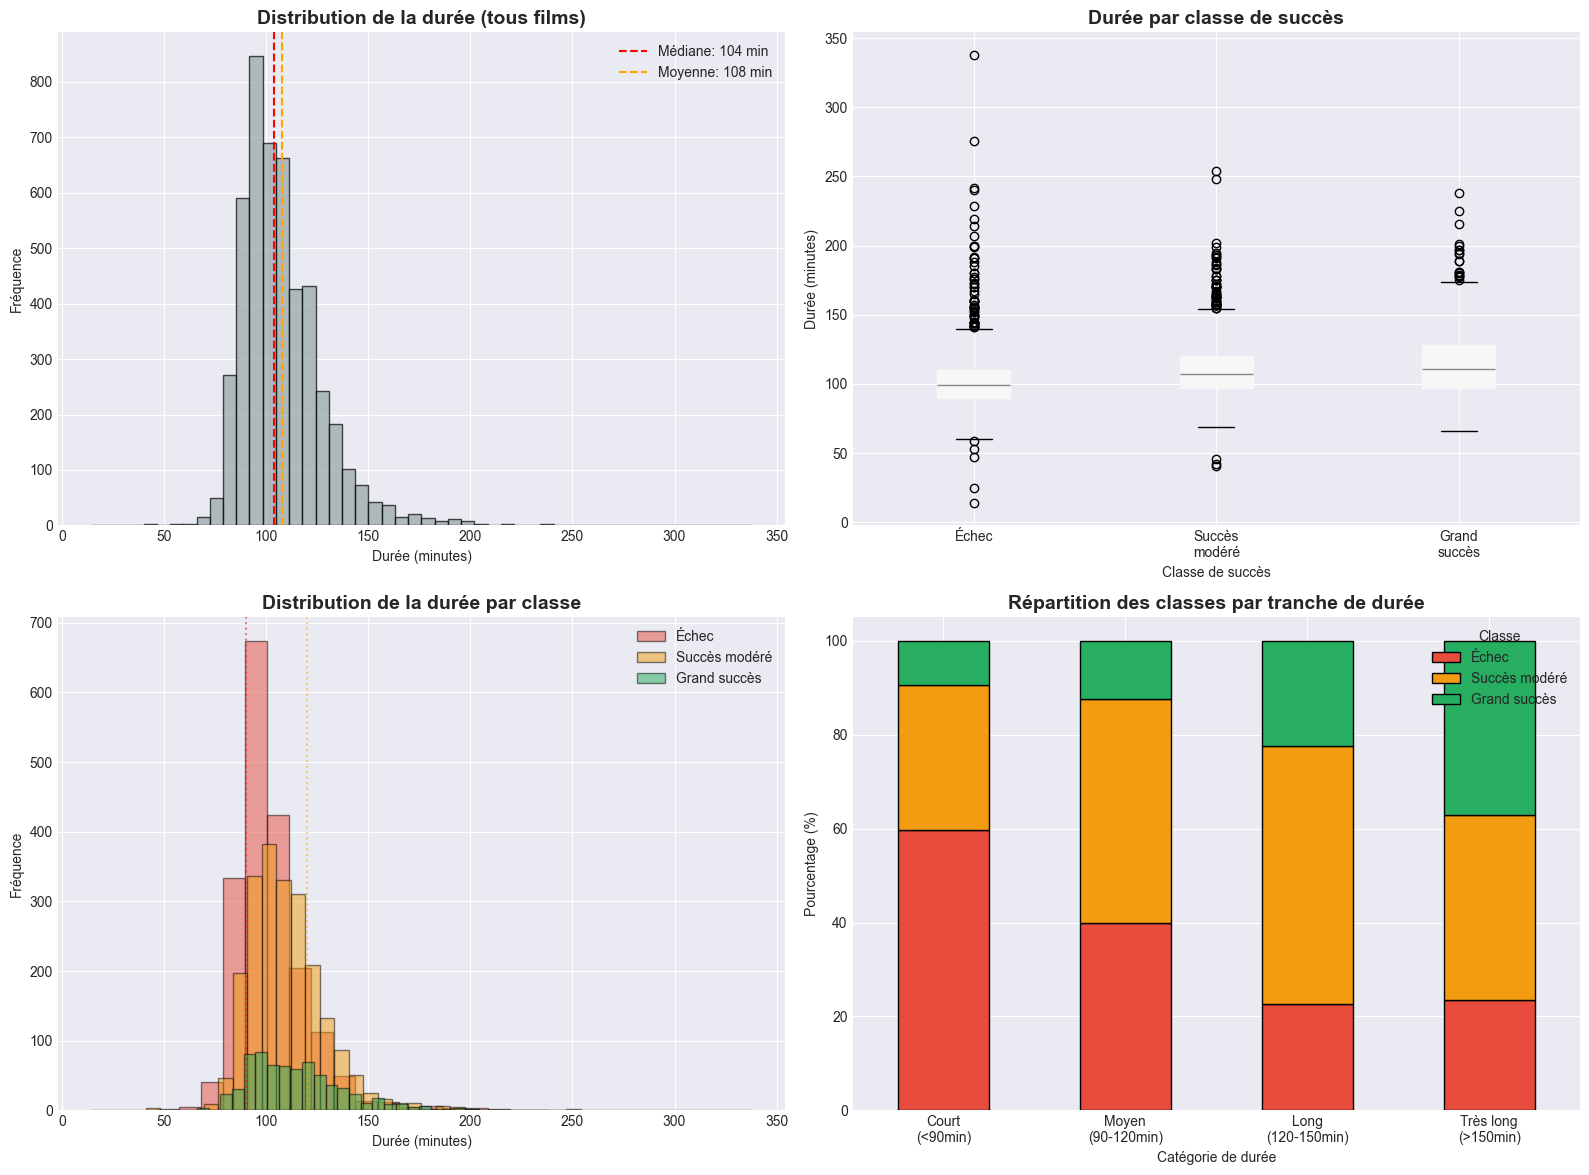


📊 TAUX DE GRAND SUCCÈS PAR TRANCHE DE DURÉE:
--------------------------------------------------------------------------------
  • Court
(<90min): 9.5% de grands succès
  • Moyen
(90-120min): 12.5% de grands succès
  • Long
(120-150min): 22.4% de grands succès
  • Très long
(>150min): 37.1% de grands succès

🎯 'SWEET SPOT': Très long
(>150min)
   Cette tranche a le meilleur taux de succès (37.1%)

💡 INSIGHTS PRATIQUES:
  • Les films très longs (>150min) performent mieux
  • Mais attention: échantillon peut être biaisé (peu de films)

📈 Corrélation runtime-succès: 0.223


In [12]:
print("="*80)
print("ANALYSE APPROFONDIE: DURÉE vs SUCCÈS")
print("="*80)

# Statistiques
print("\n📊 STATISTIQUES DE LA DURÉE PAR CLASSE DE SUCCÈS:")
print("-" * 80)
runtime_stats = df.groupby('success')['runtime'].describe()
runtime_stats.index = ['Échec', 'Succès modéré', 'Grand succès']
display(runtime_stats)

print("\n💡 INTERPRÉTATION:")
mean_echec_runtime = runtime_stats.loc['Échec', 'mean']
mean_succes_runtime = runtime_stats.loc['Grand succès', 'mean']
print(f"  • Durée moyenne Échec: {mean_echec_runtime:.1f} minutes")
print(f"  • Durée moyenne Grand succès: {mean_succes_runtime:.1f} minutes")
print(f"  • Différence: {mean_succes_runtime - mean_echec_runtime:+.1f} minutes")

if mean_succes_runtime > mean_echec_runtime + 5:
    print(f"\n  📈 Les films à succès sont PLUS LONGS en moyenne")
    print(f"     → Les films plus longs (épiques) tendent à mieux performer")
elif mean_echec_runtime > mean_succes_runtime + 5:
    print(f"\n  📉 Les films à succès sont PLUS COURTS en moyenne")
    print(f"     → Le public préfère les films concis")
else:
    print(f"\n  ⚖️ Pas de différence significative de durée")
    print(f"     → La durée n'est pas un facteur déterminant")

# Visualisations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
palette_colors = ['#e74c3c', '#f39c12', '#27ae60']

# 1. Distribution de la durée (tous films)
axes[0, 0].hist(df["runtime"], bins=50, edgecolor='black', alpha=0.7, color='#95a5a6')
axes[0, 0].set_title('Distribution de la durée (tous films)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Durée (minutes)')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].axvline(df["runtime"].median(), color='red', linestyle='--', 
                    label=f'Médiane: {df["runtime"].median():.0f} min')
axes[0, 0].axvline(df["runtime"].mean(), color='orange', linestyle='--', 
                    label=f'Moyenne: {df["runtime"].mean():.0f} min')
axes[0, 0].legend()

# 2. Durée par classe (boxplot)
df.boxplot(column='runtime', by='success', ax=axes[0, 1], patch_artist=True)
for patch, color in zip(axes[0, 1].artists, palette_colors):
    patch.set_facecolor(color)
axes[0, 1].set_title('Durée par classe de succès', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Classe de succès')
axes[0, 1].set_ylabel('Durée (minutes)')
axes[0, 1].set_xticklabels(['Échec', 'Succès\nmodéré', 'Grand\nsuccès'])
plt.suptitle('')

# 3. Distribution comparée
for cls, color, label in zip([0, 1, 2], palette_colors, 
                              ['Échec', 'Succès modéré', 'Grand succès']):
    data = df[df['success'] == cls]['runtime']
    axes[1, 0].hist(data, bins=30, alpha=0.5, label=label, color=color, edgecolor='black')
axes[1, 0].set_title('Distribution de la durée par classe', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Durée (minutes)')
axes[1, 0].set_ylabel('Fréquence')
axes[1, 0].legend()
axes[1, 0].axvline(90, color='red', linestyle=':', alpha=0.5, label='90 min')
axes[1, 0].axvline(120, color='orange', linestyle=':', alpha=0.5, label='120 min')

# 4. Répartition par tranche de durée
df['runtime_category'] = pd.cut(df['runtime'], 
                                bins=[0, 90, 120, 150, 300], 
                                labels=['Court\n(<90min)', 'Moyen\n(90-120min)', 
                                       'Long\n(120-150min)', 'Très long\n(>150min)'])
success_by_runtime = df.groupby('runtime_category')['success'].value_counts(normalize=True).unstack(fill_value=0) * 100

success_by_runtime.plot(kind='bar', stacked=True, ax=axes[1, 1], 
                        color=palette_colors, edgecolor='black')
axes[1, 1].set_title('Répartition des classes par tranche de durée', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Catégorie de durée')
axes[1, 1].set_ylabel('Pourcentage (%)')
axes[1, 1].tick_params(axis='x', rotation=0)
axes[1, 1].legend(['Échec', 'Succès modéré', 'Grand succès'], title='Classe')

plt.tight_layout()
plt.show()

# Analyse par tranche
print("\n📊 TAUX DE GRAND SUCCÈS PAR TRANCHE DE DURÉE:")
print("-" * 80)
success_rate_by_runtime = df.groupby('runtime_category').apply(
    lambda x: (x['success'] == 2).sum() / len(x) * 100
)
for cat, rate in success_rate_by_runtime.items():
    print(f"  • {cat}: {rate:.1f}% de grands succès")

# Sweet spot
best_runtime_cat = success_rate_by_runtime.idxmax()
print(f"\n🎯 'SWEET SPOT': {best_runtime_cat}")
print(f"   Cette tranche a le meilleur taux de succès ({success_rate_by_runtime.max():.1f}%)")

print("\n💡 INSIGHTS PRATIQUES:")
if 'Court' in str(best_runtime_cat):
    print("  • Les films courts (<90min) performent mieux")
    print("  • Avantage: Plus de séances par jour, public pressé")
elif 'Moyen' in str(best_runtime_cat):
    print("  • Les films de durée standard (90-120min) performent mieux")
    print("  • Durée idéale: assez long pour raconter, pas trop pour ennuyer")
elif 'Long' in str(best_runtime_cat):
    print("  • Les films longs (120-150min) performent mieux")
    print("  • Typique des blockbusters et épopées")
else:
    print("  • Les films très longs (>150min) performent mieux")
    print("  • Mais attention: échantillon peut être biaisé (peu de films)")

# Corrélation
corr_runtime_success = df[['runtime', 'success']].corr().iloc[0, 1]
print(f"\n📈 Corrélation runtime-succès: {corr_runtime_success:.3f}")

# Nettoyer
df.drop('runtime_category', axis=1, inplace=True)

ANALYSE APPROFONDIE: POPULARITÉ vs SUCCÈS

📊 STATISTIQUES DE LA POPULARITÉ PAR CLASSE:
--------------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Échec,1901.0,6.801530,7.734762,0.000372,1.584600,4.580081,9.166658,74.168016
Succès modéré,2173.0,24.733391,19.728192,0.019984,11.203335,19.854932,33.439187,202.042635
Grand succès,692.0,52.801537,63.360723,0.616283,21.245476,39.323885,66.524500,875.581305



💡 INTERPRÉTATION:
  • La 'popularité' est un score TMDB basé sur:
    - Nombre de vues de la page
    - Nombre de votes
    - Nombre de favoris
    - Date de sortie (films récents ont plus de popularité)

  • Popularité médiane Échec: 4.6
  • Popularité médiane Grand succès: 39.3
  • Ratio: 8.59x

⚠️ ATTENTION - RISQUE DE DATA LEAKAGE:
--------------------------------------------------------------------------------
  • La popularité peut être mesurée APRÈS la sortie du film
  • Si utilisée pour prédiction AVANT sortie: PROBLÉMATIQUE
  • Solution: Utiliser comme feature explicative, pas prédictive
  • OU: Utiliser uniquement pour films déjà sortis


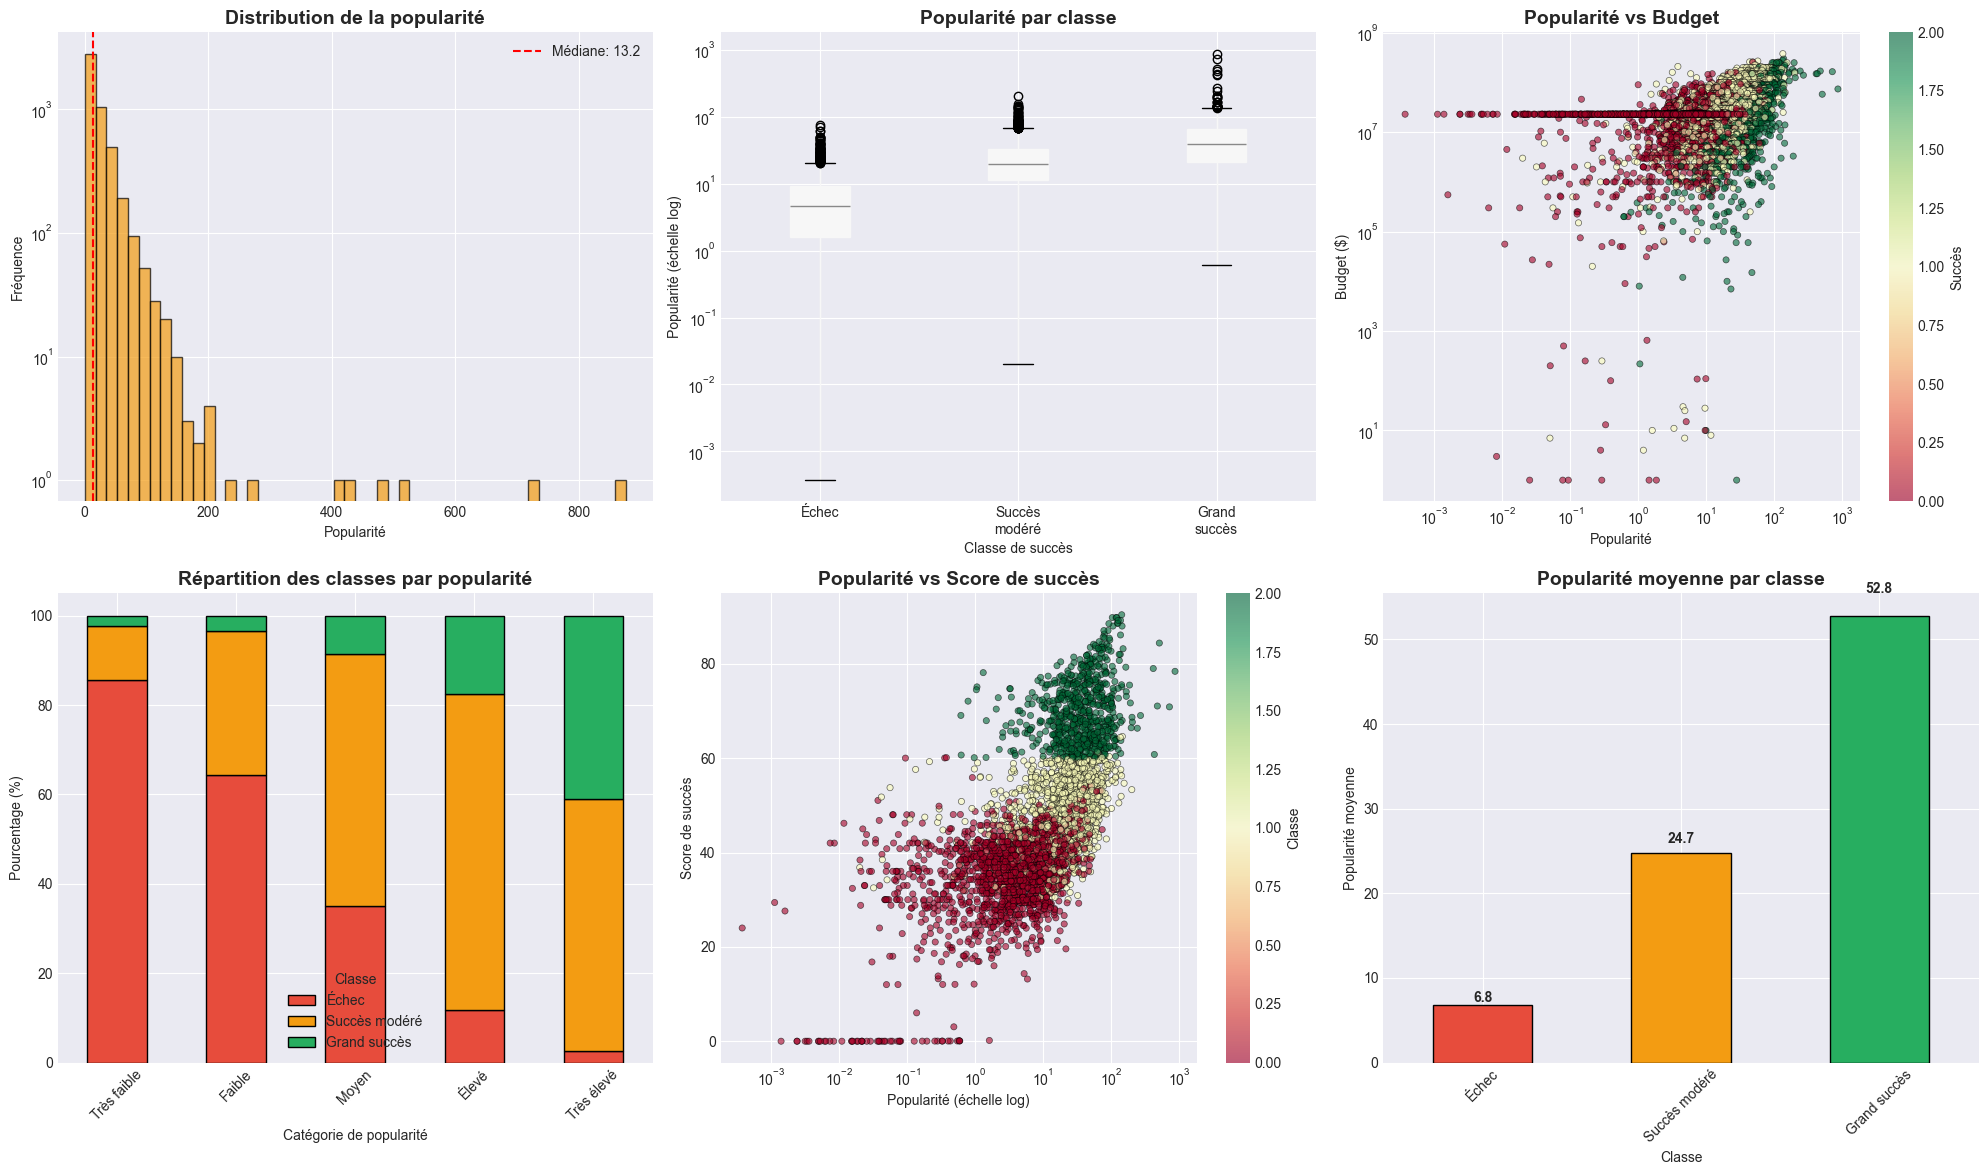


📈 CORRÉLATIONS:
--------------------------------------------------------------------------------
  • Popularité ↔ Classe de succès: 0.473
  • Popularité ↔ Score de succès: 0.506

  ✅ Corrélation FORTE: La popularité est un bon indicateur

📊 TAUX DE GRAND SUCCÈS PAR POPULARITÉ:
--------------------------------------------------------------------------------
  • Très faible: 2.2%
  • Faible: 3.5%
  • Moyen: 8.5%
  • Élevé: 17.4%
  • Très élevé: 41.0%


In [13]:
print("="*80)
print("ANALYSE APPROFONDIE: POPULARITÉ vs SUCCÈS")
print("="*80)

# Statistiques
print("\n📊 STATISTIQUES DE LA POPULARITÉ PAR CLASSE:")
print("-" * 80)
pop_stats = df.groupby('success')['popularity'].describe()
pop_stats.index = ['Échec', 'Succès modéré', 'Grand succès']
display(pop_stats)

print("\n💡 INTERPRÉTATION:")
print("  • La 'popularité' est un score TMDB basé sur:")
print("    - Nombre de vues de la page")
print("    - Nombre de votes")
print("    - Nombre de favoris")
print("    - Date de sortie (films récents ont plus de popularité)")

median_echec = pop_stats.loc['Échec', '50%']
median_succes = pop_stats.loc['Grand succès', '50%']
print(f"\n  • Popularité médiane Échec: {median_echec:.1f}")
print(f"  • Popularité médiane Grand succès: {median_succes:.1f}")
print(f"  • Ratio: {median_succes/median_echec:.2f}x")

# ⚠️ Note sur data leakage
print("\n⚠️ ATTENTION - RISQUE DE DATA LEAKAGE:")
print("-" * 80)
print("  • La popularité peut être mesurée APRÈS la sortie du film")
print("  • Si utilisée pour prédiction AVANT sortie: PROBLÉMATIQUE")
print("  • Solution: Utiliser comme feature explicative, pas prédictive")
print("  • OU: Utiliser uniquement pour films déjà sortis")

# Visualisations
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
palette_colors = ['#e74c3c', '#f39c12', '#27ae60']

# 1. Distribution de la popularité (échelle log)
axes[0, 0].hist(df["popularity"], bins=50, edgecolor='black', alpha=0.7, color='#f39c12')
axes[0, 0].set_title('Distribution de la popularité', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Popularité')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].set_yscale('log')
axes[0, 0].axvline(df["popularity"].median(), color='red', linestyle='--', 
                    label=f'Médiane: {df["popularity"].median():.1f}')
axes[0, 0].legend()

# 2. Popularité par classe (boxplot avec échelle log)
df.boxplot(column='popularity', by='success', ax=axes[0, 1], patch_artist=True)
for patch, color in zip(axes[0, 1].artists, palette_colors):
    patch.set_facecolor(color)
axes[0, 1].set_title('Popularité par classe', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Classe de succès')
axes[0, 1].set_ylabel('Popularité (échelle log)')
axes[0, 1].set_yscale('log')
axes[0, 1].set_xticklabels(['Échec', 'Succès\nmodéré', 'Grand\nsuccès'])
plt.suptitle('')

# 3. Scatter: Popularité vs Budget (coloré par succès)
scatter = axes[0, 2].scatter(df['popularity'], df['budget'], 
                             c=df['success'], cmap='RdYlGn', 
                             alpha=0.6, edgecolors='black', linewidth=0.5, s=20)
axes[0, 2].set_title('Popularité vs Budget', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Popularité')
axes[0, 2].set_ylabel('Budget ($)')
axes[0, 2].set_xscale('log')
axes[0, 2].set_yscale('log')
plt.colorbar(scatter, ax=axes[0, 2], label='Succès')

# 4. Répartition par tranche de popularité
df['pop_category'] = pd.qcut(df['popularity'], q=5, 
                             labels=['Très faible', 'Faible', 'Moyen', 'Élevé', 'Très élevé'],
                             duplicates='drop')
success_by_pop = df.groupby('pop_category')['success'].value_counts(normalize=True).unstack(fill_value=0) * 100

success_by_pop.plot(kind='bar', stacked=True, ax=axes[1, 0], 
                    color=palette_colors, edgecolor='black')
axes[1, 0].set_title('Répartition des classes par popularité', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Catégorie de popularité')
axes[1, 0].set_ylabel('Pourcentage (%)')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(['Échec', 'Succès modéré', 'Grand succès'], title='Classe')

# 5. Scatter: Popularité vs Score de succès
scatter2 = axes[1, 1].scatter(df['popularity'], df['success_score'], 
                              c=df['success'], cmap='RdYlGn', 
                              alpha=0.6, edgecolors='black', linewidth=0.5, s=20)
axes[1, 1].set_title('Popularité vs Score de succès', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Popularité (échelle log)')
axes[1, 1].set_ylabel('Score de succès')
axes[1, 1].set_xscale('log')
plt.colorbar(scatter2, ax=axes[1, 1], label='Classe')

# 6. Popularité moyenne par classe
pop_means = df.groupby('success')['popularity'].mean()
pop_means.index = ['Échec', 'Succès modéré', 'Grand succès']
pop_means.plot(kind='bar', ax=axes[1, 2], color=palette_colors, edgecolor='black')
axes[1, 2].set_title('Popularité moyenne par classe', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Classe')
axes[1, 2].set_ylabel('Popularité moyenne')
axes[1, 2].tick_params(axis='x', rotation=45)

for i, v in enumerate(pop_means):
    axes[1, 2].text(i, v + v*0.05, f'{v:.1f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Corrélation
print("\n📈 CORRÉLATIONS:")
print("-" * 80)
corr_pop_success = df[['popularity', 'success']].corr().iloc[0, 1]
corr_pop_score = df[['popularity', 'success_score']].corr().iloc[0, 1]
print(f"  • Popularité ↔ Classe de succès: {corr_pop_success:.3f}")
print(f"  • Popularité ↔ Score de succès: {corr_pop_score:.3f}")

if corr_pop_success > 0.4:
    print(f"\n  ✅ Corrélation FORTE: La popularité est un bon indicateur")
elif corr_pop_success > 0.2:
    print(f"\n  ⚡ Corrélation MODÉRÉE: La popularité a de l'importance")
else:
    print(f"\n  ⚠️ Corrélation FAIBLE: La popularité seule ne suffit pas")

# Taux de succès par tranche
print("\n📊 TAUX DE GRAND SUCCÈS PAR POPULARITÉ:")
print("-" * 80)
success_rate_by_pop = df.groupby('pop_category').apply(
    lambda x: (x['success'] == 2).sum() / len(x) * 100
)
for cat, rate in success_rate_by_pop.items():
    print(f"  • {cat}: {rate:.1f}%")

# Nettoyer
df.drop('pop_category', axis=1, inplace=True)

ANALYSE APPROFONDIE: VOTES vs SUCCÈS

📊 STATISTIQUES DES VOTES PAR CLASSE:
--------------------------------------------------------------------------------

1️⃣ VOTE_AVERAGE (Note moyenne):


,count,mean,std,min,25%,50%,75%,max
Échec,1901.0,5.692688,1.420609,0.0,5.2,5.9,6.6,10.0
Succès modéré,2173.0,6.196364,0.735117,3.2,5.7,6.2,6.7,8.5
Grand succès,692.0,7.008382,0.682817,4.9,6.6,7.1,7.5,8.4



2️⃣ VOTE_COUNT (Nombre de votes):


,count,mean,std,min,25%,50%,75%,max
Échec,1901.0,117.053130,211.085021,0.0,14.0,48.0,135.0,3452.0
Succès modéré,2173.0,760.581224,931.872762,1.0,197.0,450.0,959.0,9413.0
Grand succès,692.0,2080.541908,2204.474010,10.0,505.0,1213.5,3019.0,13752.0



💡 INTERPRÉTATION:
  • vote_average: Note moyenne (0-10) donnée par les utilisateurs
  • vote_count: Nombre total de votes reçus
  • Plus un film est vu, plus il reçoit de votes

⚠️ RISQUE MAJEUR DE DATA LEAKAGE:
--------------------------------------------------------------------------------
  • Les votes sont collectés APRÈS la sortie du film
  • Un film à succès attire plus de spectateurs → plus de votes
  • La note reflète la qualité perçue APRÈS visionnage
  • CONCLUSION: Ces features sont problématiques pour prédiction AVANT sortie
  • MAIS: Utiles pour comprendre ce qui fait un succès


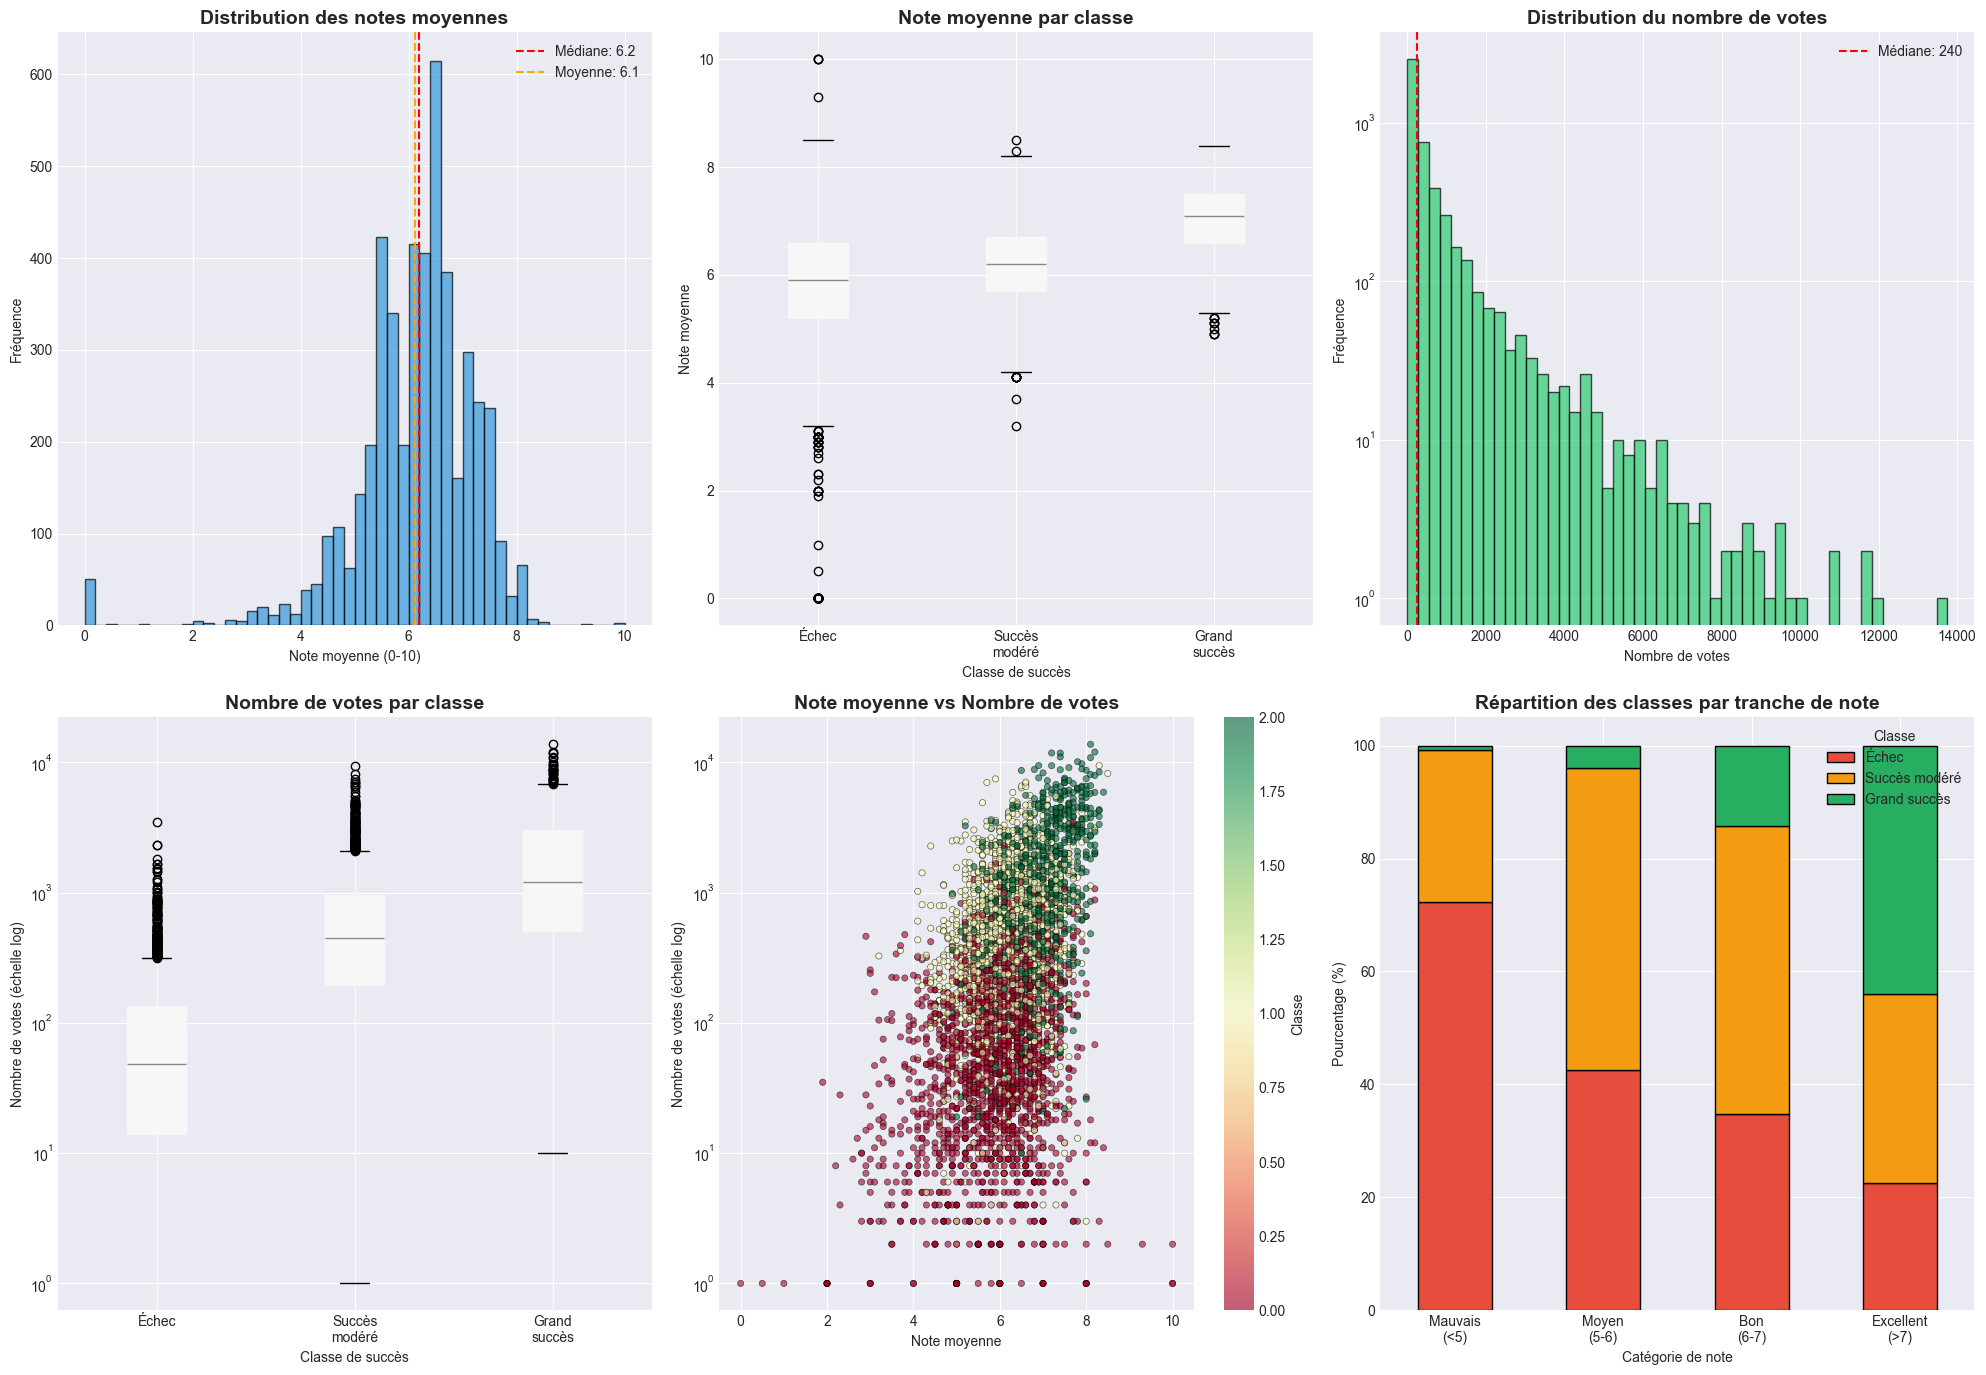


📈 CORRÉLATIONS AVEC LE SUCCÈS:
--------------------------------------------------------------------------------
  • Note moyenne ↔ Succès: 0.376
  • Nombre de votes ↔ Succès: 0.504

💡 INSIGHTS:
  • Les films bien notés ont tendance à être des succès
  • MAIS: Biais de sélection (seuls ceux qui aiment votent)
  • Plus de votes = plus de succès (logique: plus vu)
  • Le vote_count capture la popularité/visibilité

📊 TAUX DE GRAND SUCCÈS PAR TRANCHE DE NOTE:
--------------------------------------------------------------------------------
  • Mauvais
(<5): 0.7%
  • Moyen
(5-6): 4.1%
  • Bon
(6-7): 14.2%
  • Excellent
(>7): 43.9%

🎯 RECOMMANDATION:
  • Pour prédiction AVANT sortie: NE PAS utiliser vote_average/vote_count
  • Pour analyse POST-MORTEM: Ces features sont très informatives
  • Compromis: Utiliser mais noter la limitation dans le rapport


In [14]:
print("="*80)
print("ANALYSE APPROFONDIE: VOTES vs SUCCÈS")
print("="*80)

# Statistiques
print("\n📊 STATISTIQUES DES VOTES PAR CLASSE:")
print("-" * 80)

vote_avg_stats = df.groupby('success')['vote_average'].describe()
vote_avg_stats.index = ['Échec', 'Succès modéré', 'Grand succès']
print("\n1️⃣ VOTE_AVERAGE (Note moyenne):")
display(vote_avg_stats)

vote_count_stats = df.groupby('success')['vote_count'].describe()
vote_count_stats.index = ['Échec', 'Succès modéré', 'Grand succès']
print("\n2️⃣ VOTE_COUNT (Nombre de votes):")
display(vote_count_stats)

print("\n💡 INTERPRÉTATION:")
print("  • vote_average: Note moyenne (0-10) donnée par les utilisateurs")
print("  • vote_count: Nombre total de votes reçus")
print("  • Plus un film est vu, plus il reçoit de votes")

print("\n⚠️ RISQUE MAJEUR DE DATA LEAKAGE:")
print("-" * 80)
print("  • Les votes sont collectés APRÈS la sortie du film")
print("  • Un film à succès attire plus de spectateurs → plus de votes")
print("  • La note reflète la qualité perçue APRÈS visionnage")
print("  • CONCLUSION: Ces features sont problématiques pour prédiction AVANT sortie")
print("  • MAIS: Utiles pour comprendre ce qui fait un succès")

# Visualisations
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
palette_colors = ['#e74c3c', '#f39c12', '#27ae60']

# 1. Distribution vote_average
axes[0, 0].hist(df["vote_average"], bins=50, edgecolor='black', alpha=0.7, color='#3498db')
axes[0, 0].set_title('Distribution des notes moyennes', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Note moyenne (0-10)')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].axvline(df["vote_average"].median(), color='red', linestyle='--', 
                    label=f'Médiane: {df["vote_average"].median():.1f}')
axes[0, 0].axvline(df["vote_average"].mean(), color='orange', linestyle='--', 
                    label=f'Moyenne: {df["vote_average"].mean():.1f}')
axes[0, 0].legend()

# 2. Vote average par classe
df.boxplot(column='vote_average', by='success', ax=axes[0, 1], patch_artist=True)
for patch, color in zip(axes[0, 1].artists, palette_colors):
    patch.set_facecolor(color)
axes[0, 1].set_title('Note moyenne par classe', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Classe de succès')
axes[0, 1].set_ylabel('Note moyenne')
axes[0, 1].set_xticklabels(['Échec', 'Succès\nmodéré', 'Grand\nsuccès'])
plt.suptitle('')

# 3. Distribution vote_count (échelle log)
axes[0, 2].hist(df["vote_count"], bins=50, edgecolor='black', alpha=0.7, color='#2ecc71')
axes[0, 2].set_title('Distribution du nombre de votes', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Nombre de votes')
axes[0, 2].set_ylabel('Fréquence')
axes[0, 2].set_yscale('log')
axes[0, 2].axvline(df["vote_count"].median(), color='red', linestyle='--', 
                    label=f'Médiane: {df["vote_count"].median():.0f}')
axes[0, 2].legend()

# 4. Vote count par classe (échelle log)
df.boxplot(column='vote_count', by='success', ax=axes[1, 0], patch_artist=True)
for patch, color in zip(axes[1, 0].artists, palette_colors):
    patch.set_facecolor(color)
axes[1, 0].set_title('Nombre de votes par classe', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Classe de succès')
axes[1, 0].set_ylabel('Nombre de votes (échelle log)')
axes[1, 0].set_yscale('log')
axes[1, 0].set_xticklabels(['Échec', 'Succès\nmodéré', 'Grand\nsuccès'])
plt.suptitle('')

# 5. Scatter: vote_average vs vote_count (coloré par succès)
scatter = axes[1, 1].scatter(df['vote_average'], df['vote_count'], 
                             c=df['success'], cmap='RdYlGn', 
                             alpha=0.6, edgecolors='black', linewidth=0.5, s=20)
axes[1, 1].set_title('Note moyenne vs Nombre de votes', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Note moyenne')
axes[1, 1].set_ylabel('Nombre de votes (échelle log)')
axes[1, 1].set_yscale('log')
plt.colorbar(scatter, ax=axes[1, 1], label='Classe')

# 6. Répartition par tranche de note
df['vote_category'] = pd.cut(df['vote_average'], 
                             bins=[0, 5, 6, 7, 10], 
                             labels=['Mauvais\n(<5)', 'Moyen\n(5-6)', 'Bon\n(6-7)', 'Excellent\n(>7)'])
success_by_vote = df.groupby('vote_category')['success'].value_counts(normalize=True).unstack(fill_value=0) * 100

success_by_vote.plot(kind='bar', stacked=True, ax=axes[1, 2], 
                     color=palette_colors, edgecolor='black')
axes[1, 2].set_title('Répartition des classes par tranche de note', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Catégorie de note')
axes[1, 2].set_ylabel('Pourcentage (%)')
axes[1, 2].tick_params(axis='x', rotation=0)
axes[1, 2].legend(['Échec', 'Succès modéré', 'Grand succès'], title='Classe')

plt.tight_layout()
plt.show()

# Corrélations
print("\n📈 CORRÉLATIONS AVEC LE SUCCÈS:")
print("-" * 80)
corr_vote_avg = df[['vote_average', 'success']].corr().iloc[0, 1]
corr_vote_count = df[['vote_count', 'success']].corr().iloc[0, 1]
print(f"  • Note moyenne ↔ Succès: {corr_vote_avg:.3f}")
print(f"  • Nombre de votes ↔ Succès: {corr_vote_count:.3f}")

print("\n💡 INSIGHTS:")
if corr_vote_avg > 0.3:
    print("  • Les films bien notés ont tendance à être des succès")
    print("  • MAIS: Biais de sélection (seuls ceux qui aiment votent)")
else:
    print("  • La note seule ne prédit pas le succès commercial")
    print("  • Qualité artistique ≠ succès box-office")

if corr_vote_count > 0.4:
    print("  • Plus de votes = plus de succès (logique: plus vu)")
    print("  • Le vote_count capture la popularité/visibilité")

# Taux de succès par note
print("\n📊 TAUX DE GRAND SUCCÈS PAR TRANCHE DE NOTE:")
print("-" * 80)
success_rate_by_vote = df.groupby('vote_category').apply(
    lambda x: (x['success'] == 2).sum() / len(x) * 100
)
for cat, rate in success_rate_by_vote.items():
    print(f"  • {cat}: {rate:.1f}%")

print("\n🎯 RECOMMANDATION:")
print("  • Pour prédiction AVANT sortie: NE PAS utiliser vote_average/vote_count")
print("  • Pour analyse POST-MORTEM: Ces features sont très informatives")
print("  • Compromis: Utiliser mais noter la limitation dans le rapport")

# Nettoyer
df.drop('vote_category', axis=1, inplace=True)

ANALYSE APPROFONDIE: GENRES vs SUCCÈS

📊 Calcul des statistiques par genre...
✅ Calcul terminé!

📋 TOP 15 GENRES PAR NOMBRE DE FILMS:
--------------------------------------------------------------------------------


,Genre,Total_Films,Echec,Succes_Modere,Grand_Succes
5,Drama,2289,1036,920,333
10,Comedy,1716,706,805,205
6,Thriller,1271,454,646,171
0,Action,1153,349,654,150
11,Romance,892,372,387,133
1,Adventure,789,189,450,150
4,Crime,693,231,375,87
3,Science Fiction,535,161,295,79
12,Horror,511,210,218,83
8,Family,511,169,267,75



💡 INTERPRÉTATION:
  • Genre le plus fréquent: Drama (2289 films)
  • Ce genre représente 48.0% du dataset
  • Attention au biais: genres fréquents dominent l'apprentissage du modèle

🏆 TOP 5 GENRES LES PLUS RENTABLES (min 50 films):
--------------------------------------------------------------------------------
  War........................... 23.1% de grands succès
  Animation..................... 20.5% de grands succès
  Adventure..................... 19.0% de grands succès
  Fantasy....................... 17.2% de grands succès
  History....................... 16.3% de grands succès


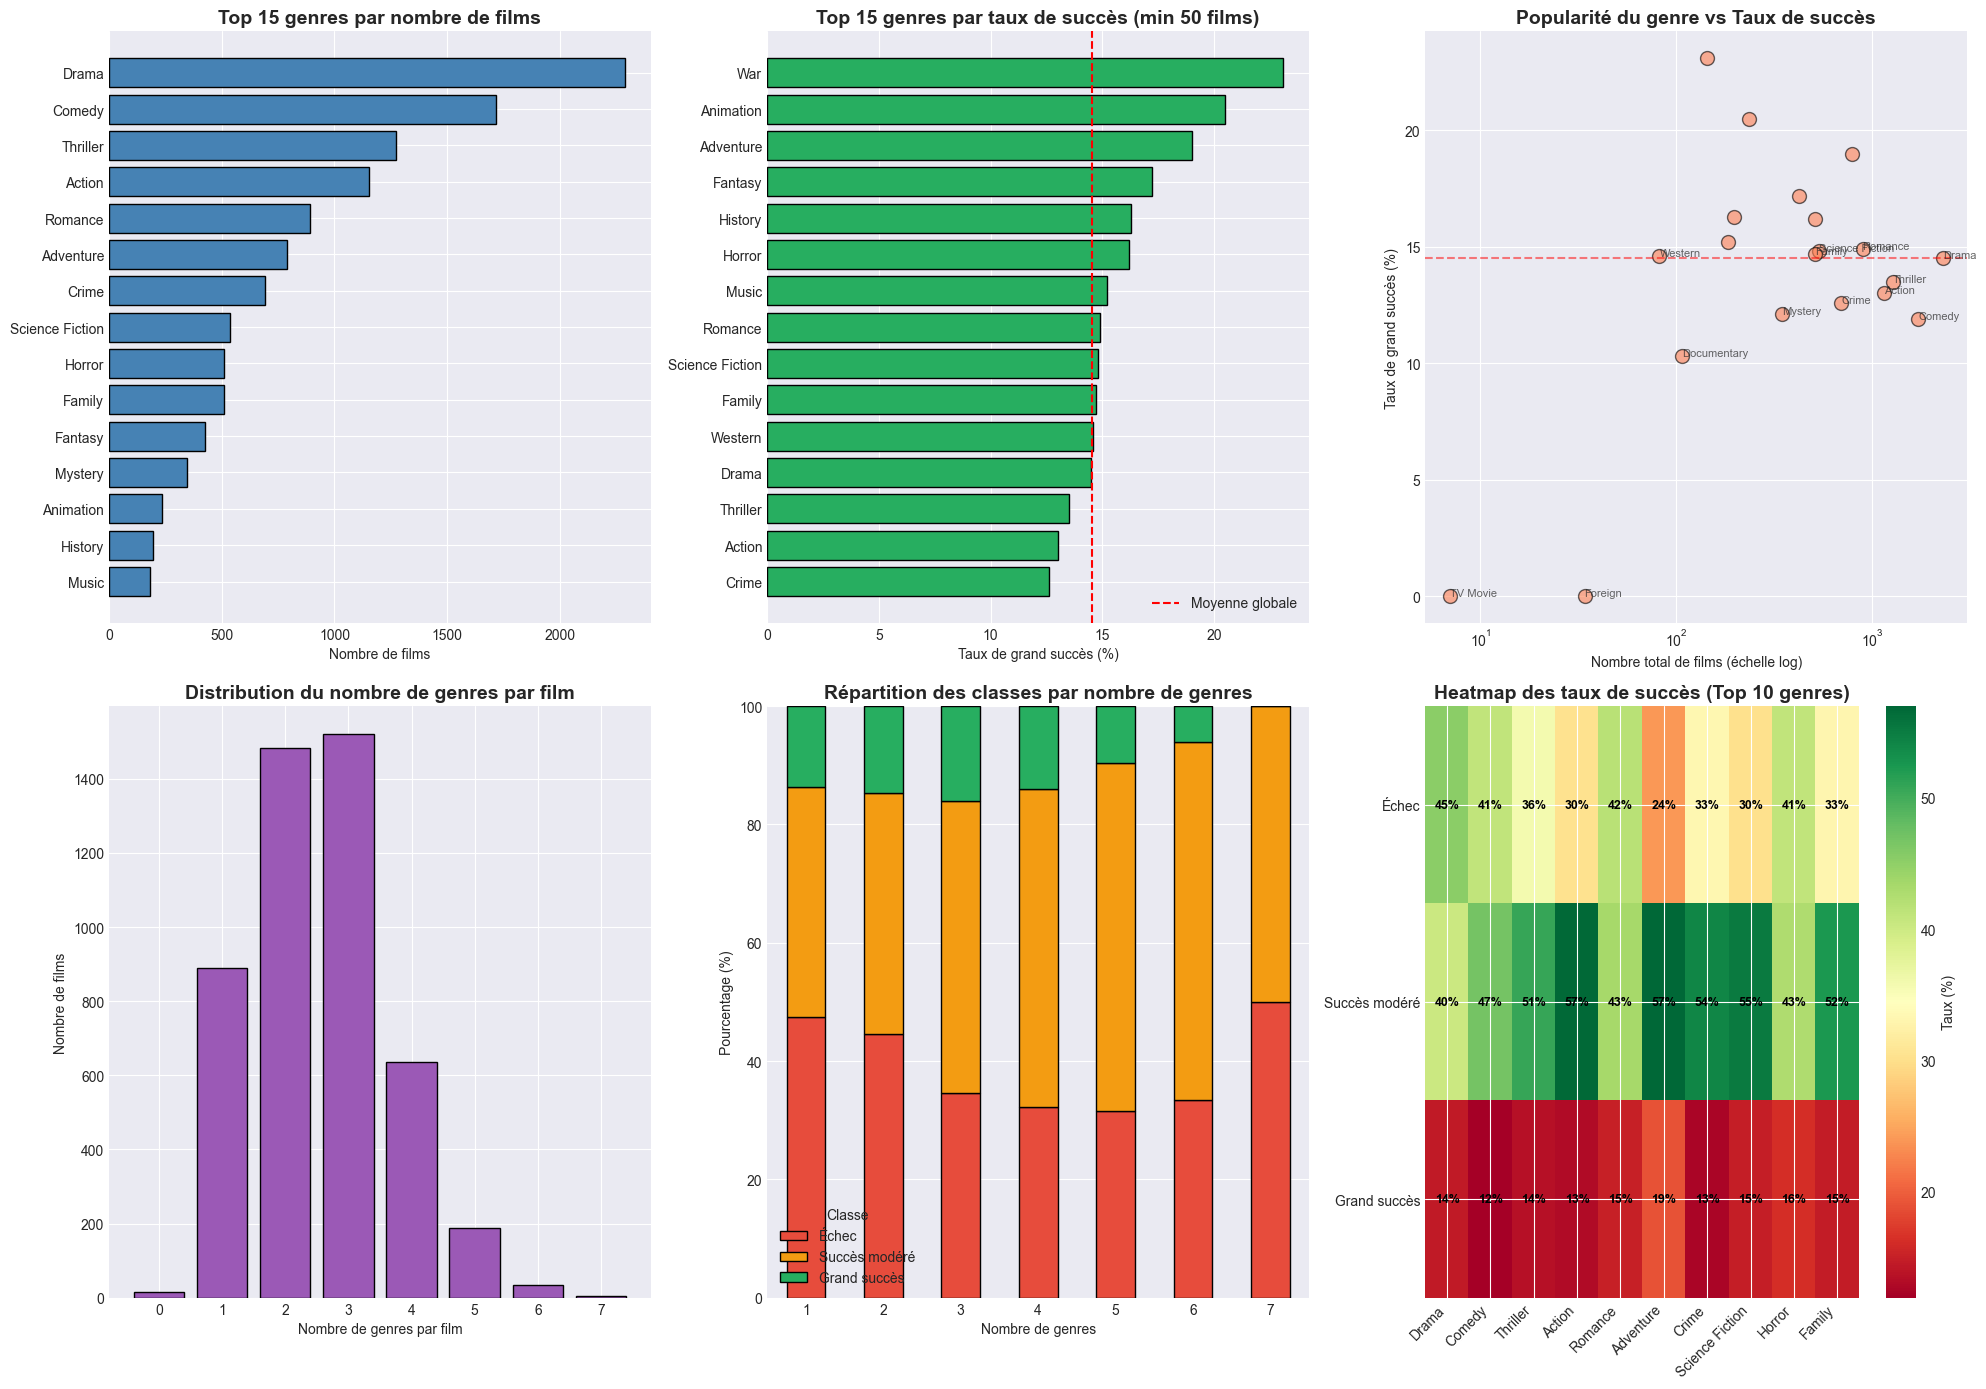


📊 ANALYSE DU NOMBRE DE GENRES:
--------------------------------------------------------------------------------
  • Films avec 0 genre: 15
  • Films avec 1 genre: 889
  • Films avec 2 genres: 1482
  • Films avec 3+ genres: 2380
  • Nombre moyen de genres: 2.54

🎯 TAUX DE GRAND SUCCÈS PAR NOMBRE DE GENRES:
--------------------------------------------------------------------------------
  • 1 genre(s): 13.7%
  • 2 genre(s): 14.7%
  • 3 genre(s): 16.0%
  • 4 genre(s): 14.0%
  • 5 genre(s): 9.6%
  • 6 genre(s): 6.1%
  • 7 genre(s): 0.0%

💡 INSIGHTS CLÉS:
  1. Certains genres sont sur-représentés (Drama, Comedy, Thriller)
  2. Les genres 'de niche' peuvent avoir des taux de succès élevés
  3. La plupart des films ont 2-3 genres (multi-label)
  4. Le nombre de genres peut être une feature intéressante

🎯 RECOMMANDATIONS POUR LE MODÈLE:
  • Utiliser MultiLabelBinarizer pour encoder les genres
  • Créer une feature 'num_genres' (nombre de genres)
  • Possiblement regrouper les genres rares (<

In [15]:
print("="*80)
print("ANALYSE APPROFONDIE: GENRES vs SUCCÈS")
print("="*80)

# Calculer les statistiques par genre
print("\n📊 Calcul des statistiques par genre...")
genre_success = {}

for idx, row in df.iterrows():
    for genre in row['genres']:
        if genre not in genre_success:
            genre_success[genre] = {0: 0, 1: 0, 2: 0, 'total': 0}
        genre_success[genre][row['success']] += 1
        genre_success[genre]['total'] += 1

# Créer un DataFrame
genre_df = pd.DataFrame([
    {
        'Genre': genre,
        'Total_Films': data['total'],
        'Echec': data[0],
        'Succes_Modere': data[1],
        'Grand_Succes': data[2],
        'Taux_Echec_%': round(data[0] / data['total'] * 100, 1),
        'Taux_Modere_%': round(data[1] / data['total'] * 100, 1),
        'Taux_Grand_Succes_%': round(data[2] / data['total'] * 100, 1)
    }

for genre, data in genre_success.items()
])

# Trier par nombre total de films
genre_df = genre_df.sort_values('Total_Films', ascending=False)

print("✅ Calcul terminé!")

print("\n📋 TOP 15 GENRES PAR NOMBRE DE FILMS:")
print("-" * 80)
display(genre_df.head(15)[['Genre', 'Total_Films', 'Echec', 'Succes_Modere', 'Grand_Succes']])

print("\n💡 INTERPRÉTATION:")
top_genre = genre_df.iloc[0]
print(f"  • Genre le plus fréquent: {top_genre['Genre']} ({top_genre['Total_Films']} films)")
print(f"  • Ce genre représente {top_genre['Total_Films']/len(df)*100:.1f}% du dataset")
print(f"  • Attention au biais: genres fréquents dominent l'apprentissage du modèle")

# Genres les plus rentables
genre_df_filtered = genre_df[genre_df['Total_Films'] >= 50]  # Au moins 50 films
best_genres = genre_df_filtered.nlargest(5, 'Taux_Grand_Succes_%')

print("\n🏆 TOP 5 GENRES LES PLUS RENTABLES (min 50 films):")
print("-" * 80)
for idx, row in best_genres.iterrows():
    print(f"  {row['Genre']:.<30} {row['Taux_Grand_Succes_%']:.1f}% de grands succès")

# Visualisations complètes
fig, axes = plt.subplots(2, 3, figsize=(20, 14))

# 1. Top 15 genres par nombre de films
top_15 = genre_df.head(15)
axes[0, 0].barh(range(len(top_15)), top_15['Total_Films'], color='steelblue', edgecolor='black')
axes[0, 0].set_yticks(range(len(top_15)))
axes[0, 0].set_yticklabels(top_15['Genre'])
axes[0, 0].set_xlabel('Nombre de films')
axes[0, 0].set_title('Top 15 genres par nombre de films', fontsize=14, fontweight='bold')
axes[0, 0].invert_yaxis()

# 2. Taux de grand succès par genre (min 50 films)
genre_filtered_sorted = genre_df_filtered.sort_values('Taux_Grand_Succes_%', ascending=True).tail(15)
axes[0, 1].barh(range(len(genre_filtered_sorted)), 
                genre_filtered_sorted['Taux_Grand_Succes_%'], 
                color='#27ae60', edgecolor='black')
axes[0, 1].set_yticks(range(len(genre_filtered_sorted)))
axes[0, 1].set_yticklabels(genre_filtered_sorted['Genre'])
axes[0, 1].set_xlabel('Taux de grand succès (%)')
axes[0, 1].set_title('Top 15 genres par taux de succès (min 50 films)', fontsize=14, fontweight='bold')
axes[0, 1].axvline(x=(df['success']==2).mean()*100, color='red', linestyle='--', 
                   label='Moyenne globale')
axes[0, 1].legend()

# 3. Relation: Popularité du genre vs Taux de succès
axes[0, 2].scatter(genre_df['Total_Films'], genre_df['Taux_Grand_Succes_%'], 
                   s=100, alpha=0.6, edgecolors='black', linewidth=1, c='coral')
axes[0, 2].set_xlabel('Nombre total de films (échelle log)')
axes[0, 2].set_ylabel('Taux de grand succès (%)')
axes[0, 2].set_title('Popularité du genre vs Taux de succès', fontsize=14, fontweight='bold')
axes[0, 2].set_xscale('log')
axes[0, 2].axhline(y=(df['success']==2).mean()*100, color='red', linestyle='--', alpha=0.5)

# Annoter les genres extrêmes
for idx, row in genre_df.iterrows():
    if row['Total_Films'] > 1000 or row['Taux_Grand_Succes_%'] > 40 or row['Taux_Grand_Succes_%'] < 15:
        axes[0, 2].annotate(row['Genre'], 
                           (row['Total_Films'], row['Taux_Grand_Succes_%']),
                           fontsize=8, alpha=0.7)

# 4. Distribution du nombre de genres par film
df['num_genres'] = df['genres'].apply(len)
num_genres_dist = df['num_genres'].value_counts().sort_index()

axes[1, 0].bar(num_genres_dist.index, num_genres_dist.values, 
               color='#9b59b6', edgecolor='black')
axes[1, 0].set_xlabel('Nombre de genres par film')
axes[1, 0].set_ylabel('Nombre de films')
axes[1, 0].set_title('Distribution du nombre de genres par film', fontsize=14, fontweight='bold')
axes[1, 0].set_xticks(range(0, num_genres_dist.index.max() + 1))

# 5. Répartition des classes par nombre de genres
success_by_num_genres = df.groupby('num_genres')['success'].value_counts(normalize=True).unstack(fill_value=0) * 100
success_by_num_genres = success_by_num_genres[success_by_num_genres.index >= 1]  # Exclure 0 genre

success_by_num_genres.plot(kind='bar', stacked=True, ax=axes[1, 1], 
                           color=['#e74c3c', '#f39c12', '#27ae60'], edgecolor='black')
axes[1, 1].set_title('Répartition des classes par nombre de genres', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Nombre de genres')
axes[1, 1].set_ylabel('Pourcentage (%)')
axes[1, 1].tick_params(axis='x', rotation=0)
axes[1, 1].legend(['Échec', 'Succès modéré', 'Grand succès'], title='Classe')

# 6. Heatmap des top 10 genres
top_10_genres = genre_df.head(10)
heatmap_data = top_10_genres[['Taux_Echec_%', 'Taux_Modere_%', 'Taux_Grand_Succes_%']].values.T

im = axes[1, 2].imshow(heatmap_data, cmap='RdYlGn', aspect='auto')
axes[1, 2].set_xticks(range(len(top_10_genres)))
axes[1, 2].set_xticklabels(top_10_genres['Genre'], rotation=45, ha='right')
axes[1, 2].set_yticks([0, 1, 2])
axes[1, 2].set_yticklabels(['Échec', 'Succès modéré', 'Grand succès'])
axes[1, 2].set_title('Heatmap des taux de succès (Top 10 genres)', fontsize=14, fontweight='bold')

# Ajouter les valeurs dans la heatmap
for i in range(3):
    for j in range(len(top_10_genres)):
        text = axes[1, 2].text(j, i, f'{heatmap_data[i, j]:.0f}%',
                              ha="center", va="center", color="black", fontsize=9, fontweight='bold')

plt.colorbar(im, ax=axes[1, 2], label='Taux (%)')

plt.tight_layout()
plt.show()

# Analyse du nombre de genres
print("\n📊 ANALYSE DU NOMBRE DE GENRES:")
print("-" * 80)
print(f"  • Films avec 0 genre: {(df['num_genres'] == 0).sum()}")
print(f"  • Films avec 1 genre: {(df['num_genres'] == 1).sum()}")
print(f"  • Films avec 2 genres: {(df['num_genres'] == 2).sum()}")
print(f"  • Films avec 3+ genres: {(df['num_genres'] >= 3).sum()}")
print(f"  • Nombre moyen de genres: {df['num_genres'].mean():.2f}")

# Taux de succès par nombre de genres
print("\n🎯 TAUX DE GRAND SUCCÈS PAR NOMBRE DE GENRES:")
print("-" * 80)
success_rate_by_num = df.groupby('num_genres').apply(
    lambda x: (x['success'] == 2).sum() / len(x) * 100
)
for num, rate in success_rate_by_num.items():
    if num > 0:
        print(f"  • {num} genre(s): {rate:.1f}%")

print("\n💡 INSIGHTS CLÉS:")
print("  1. Certains genres sont sur-représentés (Drama, Comedy, Thriller)")
print("  2. Les genres 'de niche' peuvent avoir des taux de succès élevés")
print("  3. La plupart des films ont 2-3 genres (multi-label)")
print("  4. Le nombre de genres peut être une feature intéressante")

print("\n🎯 RECOMMANDATIONS POUR LE MODÈLE:")
print("  • Utiliser MultiLabelBinarizer pour encoder les genres")
print("  • Créer une feature 'num_genres' (nombre de genres)")
print("  • Possiblement regrouper les genres rares (< 20 films)")
print("  • Attention au déséquilibre: Drama est partout!")

ANALYSE APPROFONDIE: LANGUE ORIGINALE vs SUCCÈS

📊 Calcul des statistiques par langue...
✅ Calcul terminé!

📋 TOP 15 LANGUES PAR NOMBRE DE FILMS:
--------------------------------------------------------------------------------


,Total,Echec,Succes_Modere,Grand_Succes
original_language,,,,
en,4471,1716,2098,657
fr,70,50,17,3
es,32,17,7,8
zh,27,17,7,3
de,26,19,2,5
hi,18,11,5,2
ja,16,5,6,5
it,13,7,4,2
cn,12,6,6,0



💡 INTERPRÉTATION:
  • Langue dominante: en (4471.0 films)
  • Représente 93.8% du dataset

🌍 RÉPARTITION LINGUISTIQUE:
--------------------------------------------------------------------------------
  • Films en anglais: 4471 (93.8%)
  • Films non-anglais: 295 (6.2%)


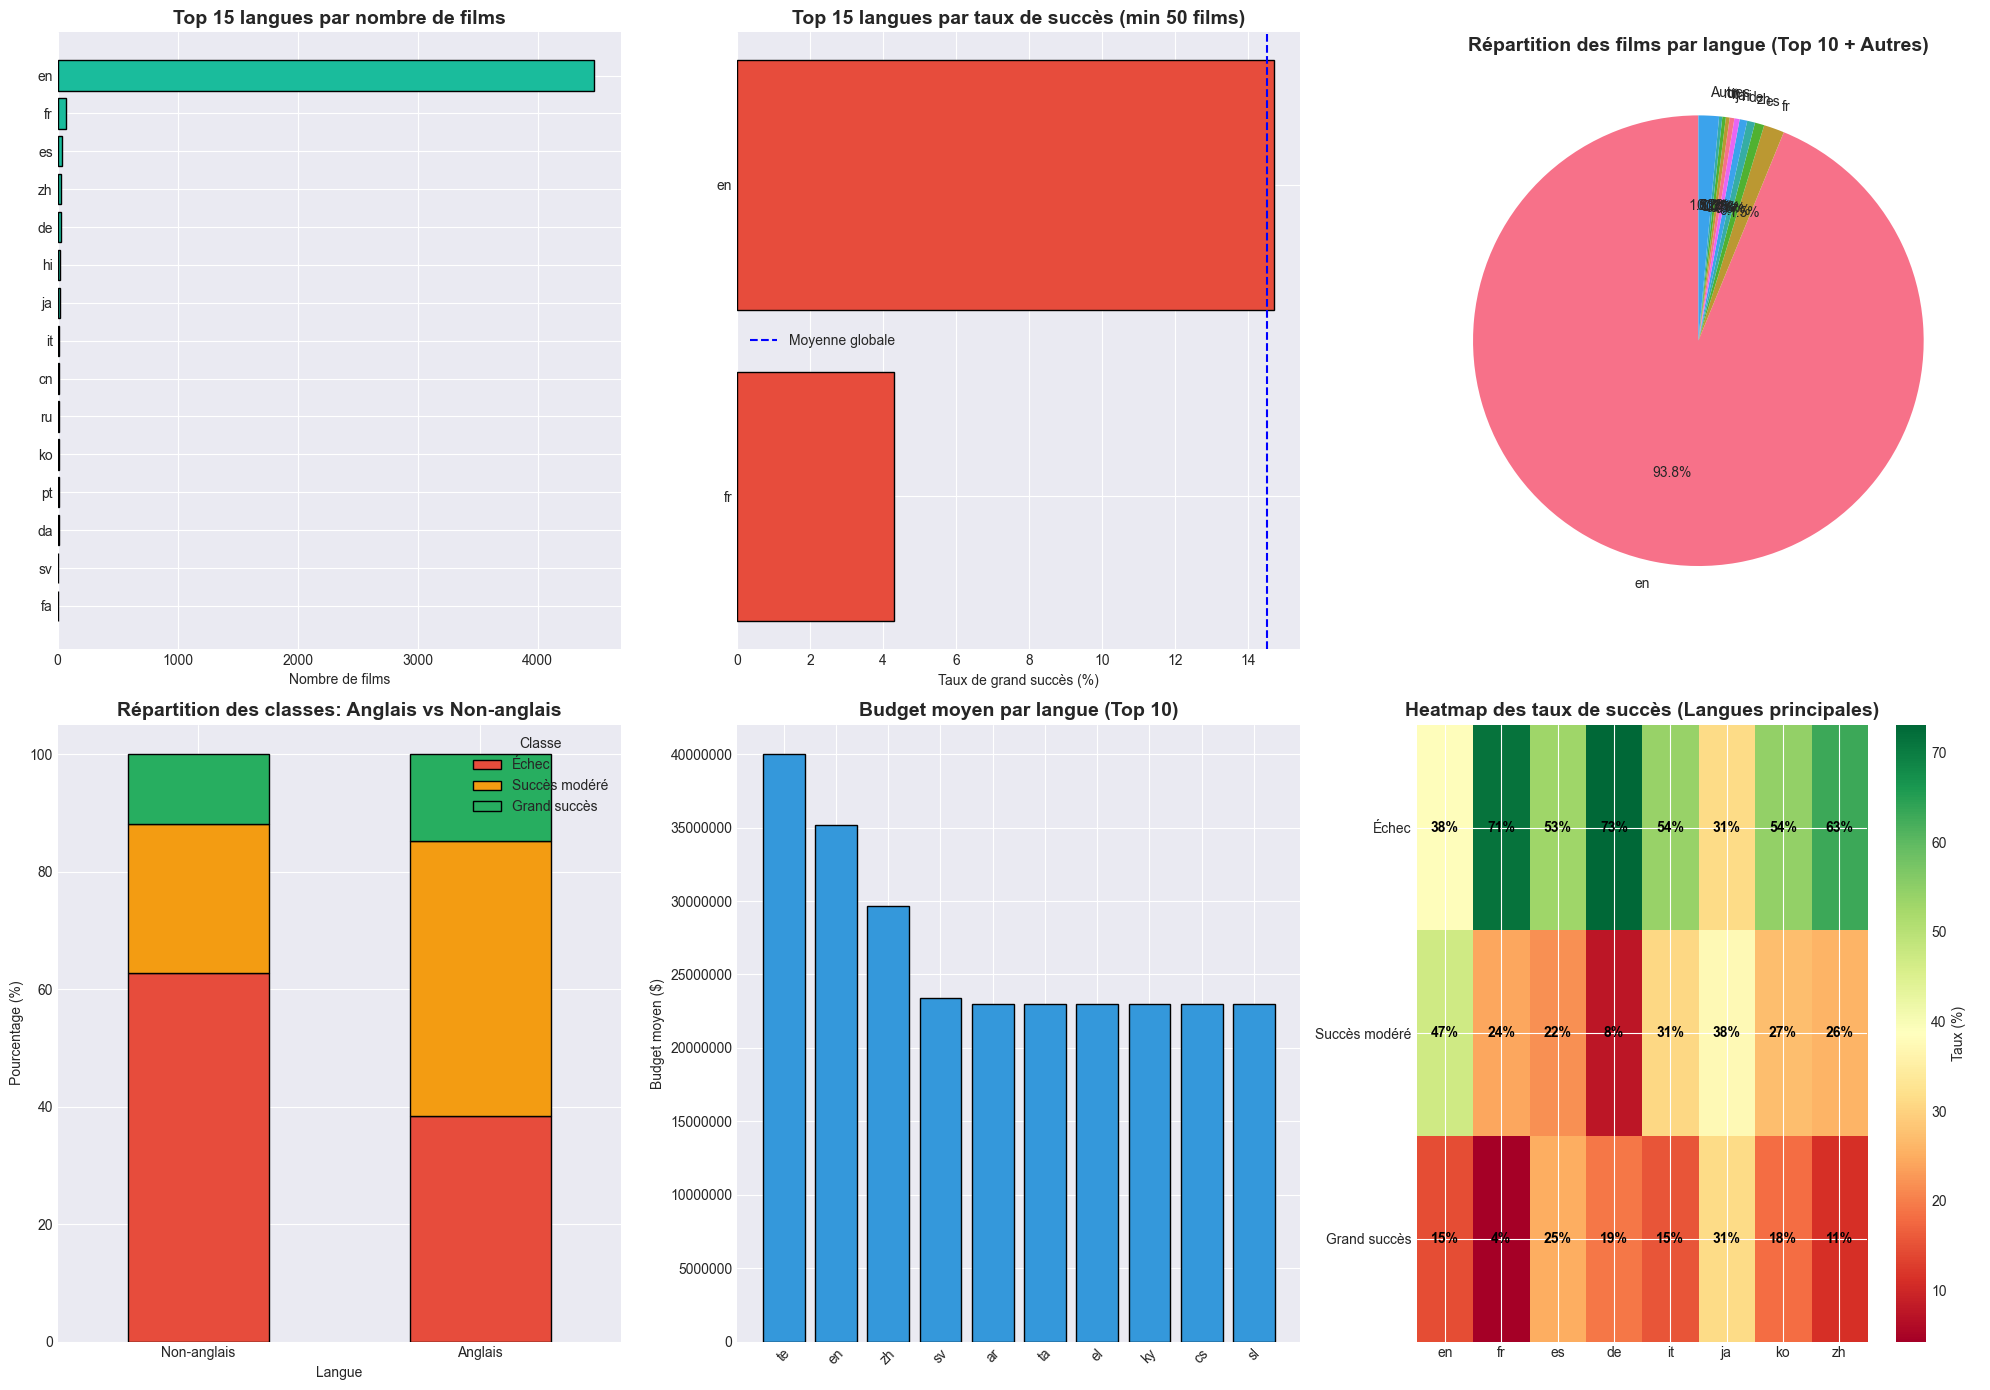


📊 COMPARAISON ANGLAIS vs NON-ANGLAIS:
--------------------------------------------------------------------------------

🇺🇸 FILMS EN ANGLAIS:


,budget,revenue,ROI,success_score
mean,3.520266e+07,8.713590e+07,2133.903537,45.480465
50%,2.300000e+07,2.288902e+07,1.206897,43.160000



🌍 FILMS NON-ANGLAIS:


,budget,revenue,ROI,success_score
mean,1.757197e+07,1.868010e+07,2.018434,44.753729
50%,2.300000e+07,0.000000e+00,0.000000,42.840000



💡 OBSERVATIONS:
  • Budget moyen EN: $35,202,661
  • Budget moyen NON-EN: $17,571,969
  • Ratio: 2.00x

  • Revenue moyen EN: $87,135,904
  • Revenue moyen NON-EN: $18,680,100
  • Ratio: 4.66x

🎯 INSIGHTS CLÉS:
  1. L'anglais domine largement le dataset (biais)
  2. Films en anglais ont généralement des budgets plus élevés
  3. Marché anglophone (US + UK + Canada + Australie) = plus grand
  4. Mais films non-anglais peuvent avoir d'excellents ROI
  5. La mondialisation réduit l'écart (succès asiatiques récents)


In [16]:
print("="*80)
print("ANALYSE APPROFONDIE: LANGUE ORIGINALE vs SUCCÈS")
print("="*80)

# Statistiques par langue
print("\n📊 Calcul des statistiques par langue...")
lang_success = df.groupby('original_language')['success'].value_counts().unstack(fill_value=0)
lang_success.columns = ['Echec', 'Succes_Modere', 'Grand_Succes']
lang_success['Total'] = lang_success.sum(axis=1)

# Calculer les taux
for col in ['Echec', 'Succes_Modere', 'Grand_Succes']:
    lang_success[f'Taux_{col}_%'] = (lang_success[col] / lang_success['Total'] * 100).round(1)

# Trier par nombre total
lang_success = lang_success.sort_values('Total', ascending=False)

print("✅ Calcul terminé!")

print("\n📋 TOP 15 LANGUES PAR NOMBRE DE FILMS:")
print("-" * 80)
display(lang_success.head(15)[['Total', 'Echec', 'Succes_Modere', 'Grand_Succes']])

print("\n💡 INTERPRÉTATION:")
top_lang = lang_success.index[0]
top_count = lang_success.iloc[0]['Total']
print(f"  • Langue dominante: {top_lang} ({top_count} films)")
print(f"  • Représente {top_count/len(df)*100:.1f}% du dataset")

# Anglais vs Non-anglais
df['is_english'] = (df['original_language'] == 'en').astype(int)
english_count = df['is_english'].sum()
non_english_count = len(df) - english_count

print(f"\n🌍 RÉPARTITION LINGUISTIQUE:")
print("-" * 80)
print(f"  • Films en anglais: {english_count} ({english_count/len(df)*100:.1f}%)")
print(f"  • Films non-anglais: {non_english_count} ({non_english_count/len(df)*100:.1f}%)")

# Visualisations
fig, axes = plt.subplots(2, 3, figsize=(20, 14))

# 1. Top 15 langues
top_15_lang = lang_success.head(15)
axes[0, 0].barh(range(len(top_15_lang)), top_15_lang['Total'], 
                color='#1abc9c', edgecolor='black')
axes[0, 0].set_yticks(range(len(top_15_lang)))
axes[0, 0].set_yticklabels(top_15_lang.index)
axes[0, 0].set_xlabel('Nombre de films')
axes[0, 0].set_title('Top 15 langues par nombre de films', fontsize=14, fontweight='bold')
axes[0, 0].invert_yaxis()

# 2. Taux de grand succès par langue (min 50 films)
lang_filtered = lang_success[lang_success['Total'] >= 50].sort_values('Taux_Grand_Succes_%', ascending=True).tail(15)
axes[0, 1].barh(range(len(lang_filtered)), lang_filtered['Taux_Grand_Succes_%'], 
                color='#e74c3c', edgecolor='black')
axes[0, 1].set_yticks(range(len(lang_filtered)))
axes[0, 1].set_yticklabels(lang_filtered.index)
axes[0, 1].set_xlabel('Taux de grand succès (%)')
axes[0, 1].set_title('Top 15 langues par taux de succès (min 50 films)', fontsize=14, fontweight='bold')
axes[0, 1].axvline(x=(df['success']==2).mean()*100, color='blue', linestyle='--', 
                   label='Moyenne globale')
axes[0, 1].legend()

# 3. Part de marché (pie chart top 10 + autres)
top_10_lang = lang_success.head(10)
others_count = lang_success.iloc[10:]['Total'].sum()
pie_data = list(top_10_lang['Total']) + [others_count]
pie_labels = list(top_10_lang.index) + ['Autres']

axes[0, 2].pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90)
axes[0, 2].set_title('Répartition des films par langue (Top 10 + Autres)', 
                     fontsize=14, fontweight='bold')

# 4. Anglais vs Non-anglais (répartition des classes)
english_success = df.groupby('is_english')['success'].value_counts(normalize=True).unstack(fill_value=0) * 100
english_success.index = ['Non-anglais', 'Anglais']

english_success.plot(kind='bar', stacked=True, ax=axes[1, 0],
                     color=['#e74c3c', '#f39c12', '#27ae60'], edgecolor='black')
axes[1, 0].set_title('Répartition des classes: Anglais vs Non-anglais', 
                     fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Pourcentage (%)')
axes[1, 0].set_xlabel('Langue')
axes[1, 0].tick_params(axis='x', rotation=0)
axes[1, 0].legend(['Échec', 'Succès modéré', 'Grand succès'], title='Classe')

# 5. Budget moyen par langue (top 10)
budget_by_lang = df.groupby('original_language')['budget'].mean().sort_values(ascending=False).head(10)
axes[1, 1].bar(range(len(budget_by_lang)), budget_by_lang.values, 
               color='#3498db', edgecolor='black')
axes[1, 1].set_xticks(range(len(budget_by_lang)))
axes[1, 1].set_xticklabels(budget_by_lang.index, rotation=45)
axes[1, 1].set_ylabel('Budget moyen ($)')
axes[1, 1].set_title('Budget moyen par langue (Top 10)', fontsize=14, fontweight='bold')
axes[1, 1].ticklabel_format(style='plain', axis='y')

# 6. Heatmap langues principales
main_langs = ['en', 'fr', 'es', 'de', 'it', 'ja', 'ko', 'zh']
main_langs = [l for l in main_langs if l in lang_success.index]
heatmap_data = lang_success.loc[main_langs, ['Taux_Echec_%', 'Taux_Succes_Modere_%', 'Taux_Grand_Succes_%']].values.T

im = axes[1, 2].imshow(heatmap_data, cmap='RdYlGn', aspect='auto')
axes[1, 2].set_xticks(range(len(main_langs)))
axes[1, 2].set_xticklabels(main_langs)
axes[1, 2].set_yticks([0, 1, 2])
axes[1, 2].set_yticklabels(['Échec', 'Succès modéré', 'Grand succès'])
axes[1, 2].set_title('Heatmap des taux de succès (Langues principales)', fontsize=14, fontweight='bold')

for i in range(3):
    for j in range(len(main_langs)):
        text = axes[1, 2].text(j, i, f'{heatmap_data[i, j]:.0f}%',
                              ha="center", va="center", color="black", fontsize=10, fontweight='bold')

plt.colorbar(im, ax=axes[1, 2], label='Taux (%)')

plt.tight_layout()
plt.show()

# Comparaison anglais vs non-anglais
print("\n📊 COMPARAISON ANGLAIS vs NON-ANGLAIS:")
print("-" * 80)

english_stats = df[df['is_english'] == 1][['budget', 'revenue', 'ROI', 'success_score']].describe()
non_english_stats = df[df['is_english'] == 0][['budget', 'revenue', 'ROI', 'success_score']].describe()

print("\n🇺🇸 FILMS EN ANGLAIS:")
display(english_stats.loc[['mean', '50%']])

print("\n🌍 FILMS NON-ANGLAIS:")
display(non_english_stats.loc[['mean', '50%']])

print("\n💡 OBSERVATIONS:")
eng_budget = english_stats.loc['mean', 'budget']
non_eng_budget = non_english_stats.loc['mean', 'budget']
print(f"  • Budget moyen EN: ${eng_budget:,.0f}")
print(f"  • Budget moyen NON-EN: ${non_eng_budget:,.0f}")
print(f"  • Ratio: {eng_budget/non_eng_budget:.2f}x")

eng_revenue = english_stats.loc['mean', 'revenue']
non_eng_revenue = non_english_stats.loc['mean', 'revenue']
print(f"\n  • Revenue moyen EN: ${eng_revenue:,.0f}")
print(f"  • Revenue moyen NON-EN: ${non_eng_revenue:,.0f}")
print(f"  • Ratio: {eng_revenue/non_eng_revenue:.2f}x")

print("\n🎯 INSIGHTS CLÉS:")
print("  1. L'anglais domine largement le dataset (biais)")
print("  2. Films en anglais ont généralement des budgets plus élevés")
print("  3. Marché anglophone (US + UK + Canada + Australie) = plus grand")
print("  4. Mais films non-anglais peuvent avoir d'excellents ROI")
print("  5. La mondialisation réduit l'écart (succès asiatiques récents)")

MATRICE DE CORRÉLATION - VARIABLES NUMÉRIQUES

📊 Variables incluses dans l'analyse:
  1. budget
  2. runtime
  3. popularity
  4. vote_average
  5. vote_count
  6. release_year
  7. num_genres
  8. is_english
  9. is_summer_release
  10. is_holiday_release
  11. ROI
  12. success_score
  13. success

✅ Matrice calculée!

🎯 CORRÉLATIONS AVEC LA VARIABLE CIBLE (success):
--------------------------------------------------------------------------------


success               1.000000
success_score         0.808792
vote_count            0.503729
popularity            0.473115
vote_average          0.375818
runtime               0.223282
budget                0.186375
is_english            0.094498
is_holiday_release    0.092756
num_genres            0.081265
is_summer_release     0.068888
ROI                   0.029219
release_year         -0.155718
Name: success, dtype: float64


💡 INTERPRÉTATION DES CORRÉLATIONS:
  • Corrélation positive: Quand X augmente, success augmente
  • Corrélation négative: Quand X augmente, success diminue
  • Proche de 0: Pas de relation linéaire

📊 CLASSIFICATION DES CORRÉLATIONS:
--------------------------------------------------------------------------------
  🔥 success_score.................  0.809 (TRÈS FORTE positive)
  🔥 vote_count....................  0.504 (TRÈS FORTE positive)
  ✅ popularity....................  0.473 (FORTE positive)
  ✅ vote_average..................  0.376 (FORTE positive)
  ⚡ runtime.......................  0.223 (MODÉRÉE positive)
  ⚡ budget........................  0.186 (MODÉRÉE positive)
  ⚠️ is_english....................  0.094 (FAIBLE positive)
  ⚠️ is_holiday_release............  0.093 (FAIBLE positive)
  ⚠️ num_genres....................  0.081 (FAIBLE positive)
  ⚠️ is_summer_release.............  0.069 (FAIBLE positive)
  ⚠️ ROI...........................  0.029 (FAIBLE positive)
  ⚡ release

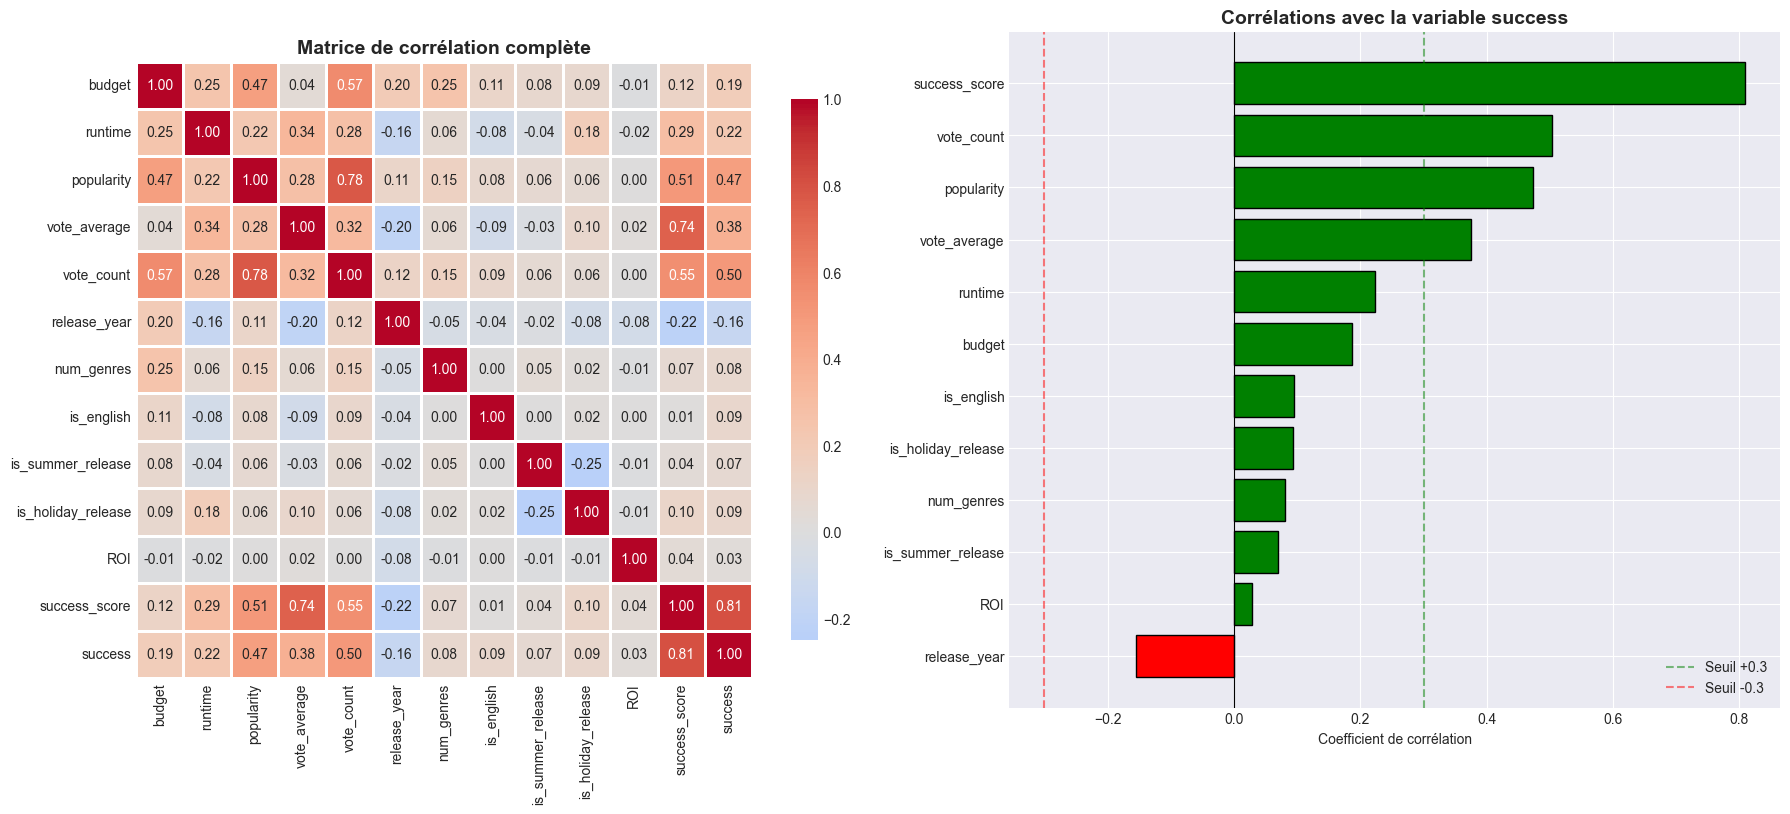


🔍 CORRÉLATIONS IMPORTANTES À NOTER:
--------------------------------------------------------------------------------
  • ROI ↔ success: 0.029
  • success_score ↔ success: 0.809
    → Normal car success est dérivé de ROI et score

  • vote_average ↔ vote_count: 0.318
    → Films bien notés reçoivent plus de votes (qualité attire)

  • budget ↔ revenue: 0.716
    → Budgets élevés génèrent plus de revenus (mais pas toujours de profit!)

  • popularity ↔ vote_count: 0.778
    → Films populaires reçoivent plus de votes (visibilité)

⚠️ ATTENTION AUX MULTICOLINÉARITÉS:
--------------------------------------------------------------------------------
  • Certaines variables sont fortement corrélées entre elles
  • Exemples: popularity/vote_count, budget/revenue, ROI/success_score
  • Impact: Peut causer instabilité dans certains modèles (régression)
  • Solution: Feature selection OU régularisation (Ridge, Lasso)

🎯 RECOMMANDATIONS POUR LA MODÉLISATION:
  1. Features les plus prometteuses: su

In [17]:
print("="*80)
print("MATRICE DE CORRÉLATION - VARIABLES NUMÉRIQUES")
print("="*80)

# Sélectionner les variables numériques pertinentes
numerical_cols = ['budget', 'runtime', 'popularity', 'vote_average', 'vote_count', 
                  'release_year', 'num_genres', 'is_english', 'is_summer_release', 
                  'is_holiday_release', 'ROI', 'success_score', 'success']

print("\n📊 Variables incluses dans l'analyse:")
for i, col in enumerate(numerical_cols, 1):
    print(f"  {i}. {col}")

# Créer la matrice de corrélation
correlation_matrix = df[numerical_cols].corr()

print("\n✅ Matrice calculée!")

# Afficher les corrélations avec la variable cible
print("\n🎯 CORRÉLATIONS AVEC LA VARIABLE CIBLE (success):")
print("-" * 80)
target_corr = correlation_matrix['success'].sort_values(ascending=False)
display(target_corr)

print("\n💡 INTERPRÉTATION DES CORRÉLATIONS:")
print("  • Corrélation positive: Quand X augmente, success augmente")
print("  • Corrélation négative: Quand X augmente, success diminue")
print("  • Proche de 0: Pas de relation linéaire")

print("\n📊 CLASSIFICATION DES CORRÉLATIONS:")
print("-" * 80)
for var, corr in target_corr.items():
    if var == 'success':
        continue
    abs_corr = abs(corr)
    if abs_corr > 0.5:
        strength = "TRÈS FORTE"
        emoji = "🔥"
    elif abs_corr > 0.3:
        strength = "FORTE"
        emoji = "✅"
    elif abs_corr > 0.1:
        strength = "MODÉRÉE"
        emoji = "⚡"
    else:
        strength = "FAIBLE"
        emoji = "⚠️"
    
    direction = "positive" if corr > 0 else "négative"
    print(f"  {emoji} {var:.<30} {corr:>6.3f} ({strength} {direction})")

# Visualisations
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 1. Heatmap complète
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            ax=axes[0])
axes[0].set_title('Matrice de corrélation complète', fontsize=14, fontweight='bold')

# 2. Barplot des corrélations avec success
target_corr_plot = target_corr.drop('success').sort_values()
colors = ['red' if x < 0 else 'green' for x in target_corr_plot]
axes[1].barh(range(len(target_corr_plot)), target_corr_plot.values, color=colors, edgecolor='black')
axes[1].set_yticks(range(len(target_corr_plot)))
axes[1].set_yticklabels(target_corr_plot.index)
axes[1].set_xlabel('Coefficient de corrélation')
axes[1].set_title('Corrélations avec la variable success', fontsize=14, fontweight='bold')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[1].axvline(x=0.3, color='green', linestyle='--', alpha=0.5, label='Seuil +0.3')
axes[1].axvline(x=-0.3, color='red', linestyle='--', alpha=0.5, label='Seuil -0.3')
axes[1].legend()

plt.tight_layout()
plt.show()

# Corrélations importantes à noter
print("\n🔍 CORRÉLATIONS IMPORTANTES À NOTER:")
print("-" * 80)

# ROI et success_score
roi_success_corr = correlation_matrix.loc['ROI', 'success']
score_success_corr = correlation_matrix.loc['success_score', 'success']
print(f"  • ROI ↔ success: {roi_success_corr:.3f}")
print(f"  • success_score ↔ success: {score_success_corr:.3f}")
print(f"    → Normal car success est dérivé de ROI et score")

# Vote average et vote count
vote_avg_count_corr = correlation_matrix.loc['vote_average', 'vote_count']
print(f"\n  • vote_average ↔ vote_count: {vote_avg_count_corr:.3f}")
if vote_avg_count_corr > 0.3:
    print(f"    → Films bien notés reçoivent plus de votes (qualité attire)")

# Budget et revenue
if 'revenue' in df.columns:
    budget_revenue_corr = df[['budget', 'revenue']].corr().iloc[0, 1]
    print(f"\n  • budget ↔ revenue: {budget_revenue_corr:.3f}")
    if budget_revenue_corr > 0.5:
        print(f"    → Budgets élevés génèrent plus de revenus (mais pas toujours de profit!)")

# Popularité et votes
pop_votes_corr = correlation_matrix.loc['popularity', 'vote_count']
print(f"\n  • popularity ↔ vote_count: {pop_votes_corr:.3f}")
if pop_votes_corr > 0.4:
    print(f"    → Films populaires reçoivent plus de votes (visibilité)")

print("\n⚠️ ATTENTION AUX MULTICOLINÉARITÉS:")
print("-" * 80)
print("  • Certaines variables sont fortement corrélées entre elles")
print("  • Exemples: popularity/vote_count, budget/revenue, ROI/success_score")
print("  • Impact: Peut causer instabilité dans certains modèles (régression)")
print("  • Solution: Feature selection OU régularisation (Ridge, Lasso)")

print("\n🎯 RECOMMANDATIONS POUR LA MODÉLISATION:")
print("  1. Features les plus prometteuses: success_score, ROI, popularity, vote_count")
print("  2. Features à surveiller: vote_average, vote_count (data leakage?)")
print("  3. Features contextuelles utiles: is_english, release_year, num_genres")
print("  4. Considérer interactions: budget × num_genres, popularity × vote_average")

DÉTECTION ET TRAITEMENT DES OUTLIERS

📊 Variables analysées:
  • budget
  • runtime
  • popularity
  • vote_count
  • revenue

💡 QU'EST-CE QU'UN OUTLIER?
--------------------------------------------------------------------------------
  • Valeur 'anormalement' éloignée des autres
  • Peut être une erreur OU une vraie valeur exceptionnelle
  • Détection: Méthode du Z-score (|Z| > 3 = outlier)
  • Z-score = (valeur - moyenne) / écart-type

📈 VISUALISATION DES OUTLIERS (AVANT TRAITEMENT):


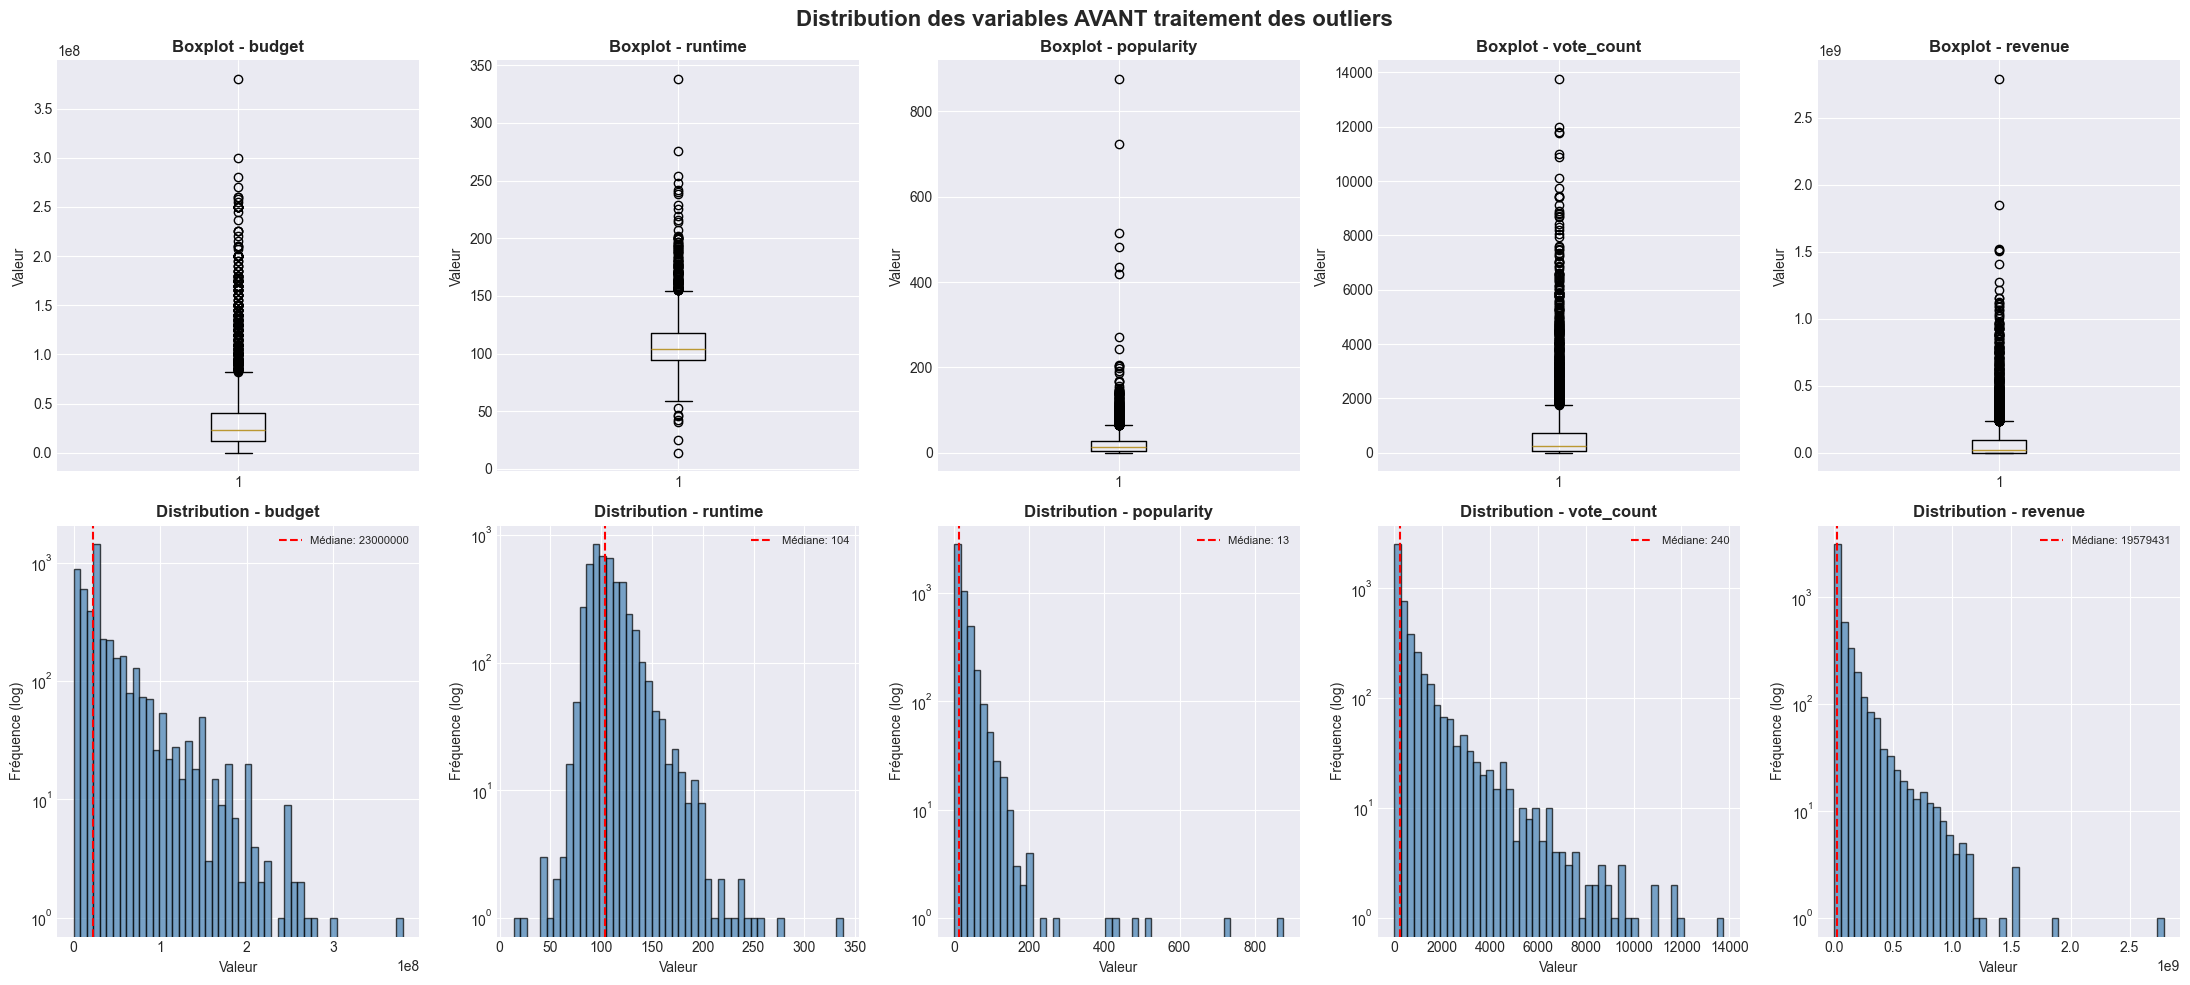


💡 INTERPRÉTATION DES BOXPLOTS:
  • Boîte (rectangle): 50% des données (Q1 à Q3)
  • Ligne au milieu: Médiane (Q2)
  • Moustaches: Étendue 'normale' (1.5 × IQR)
  • Points au-delà: Outliers potentiels

🔢 DÉTECTION DES OUTLIERS (Z-score > 3):
--------------------------------------------------------------------------------


,Variable,Nb_outliers,Pourcentage
0,budget,144,3.02
1,runtime,81,1.70
2,popularity,53,1.11
3,vote_count,126,2.64
4,revenue,116,2.43



💡 INTERPRÉTATION:
  • Total d'outliers détectés: 520
  • Représentent 2.18% des données
  ⚡ budget: 3.02% outliers - Acceptable
  ✅ runtime: 1.7% outliers - Très bon
  ✅ popularity: 1.11% outliers - Très bon
  ⚡ vote_count: 2.64% outliers - Acceptable
  ⚡ revenue: 2.43% outliers - Acceptable

🤔 FAUT-IL SUPPRIMER LES OUTLIERS?
--------------------------------------------------------------------------------
  ✅ OUI dans le cas du cinéma:
     • Valeurs extrêmes sont souvent LÉGITIMES (Avatar, Avengers)
     • Supprimer = perdre information sur les blockbusters
     • Les modèles doivent apprendre ces cas exceptionnels

  ❌ MAIS on peut supprimer si:
     • Erreurs évidentes (budget négatif déjà traité)
     • Valeurs aberrantes (budget 1 trillion = erreur)

⚙️ OPTION CHOISIE: Supprimer les outliers extrêmes (Z > 3)
--------------------------------------------------------------------------------
  • Taille AVANT: 4766 films
  • Taille APRÈS: 4446 films
  • Films supprimés: 320 (6.7%)

  

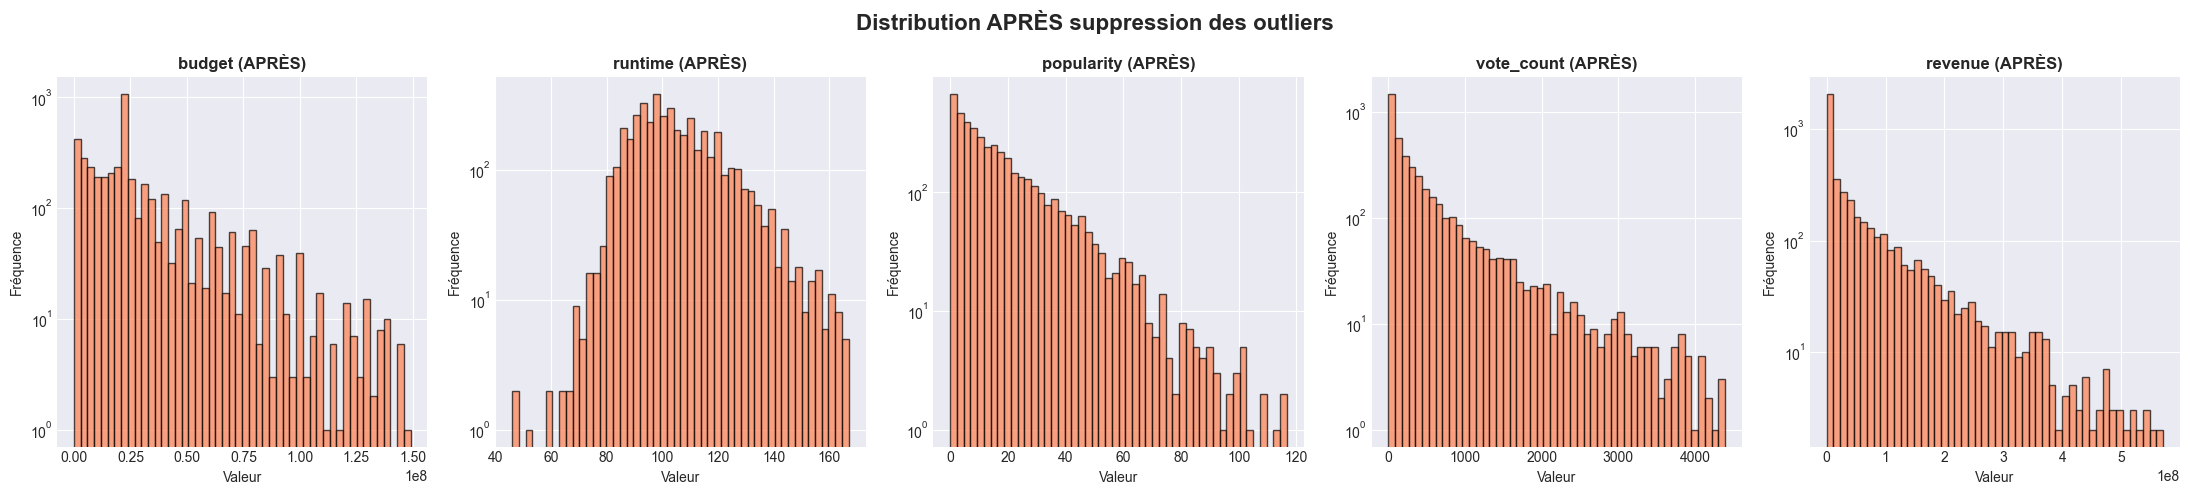


✅ Dataset nettoyé créé: df_clean
   • Dimensions: (4446, 20)
   • Distribution de success:
success
0    1870
1    2035
2     541
Name: count, dtype: int64

🎯 PROCHAINES ÉTAPES:
  1. Supprimer les colonnes de data leakage (revenue, release_date)
  2. Encoder les variables catégorielles (genres, langue)
  3. Normaliser les variables numériques
  4. Séparer train/test
  5. Entraîner les modèles


In [18]:
print("="*80)
print("DÉTECTION ET TRAITEMENT DES OUTLIERS")
print("="*80)

# Variables à analyser
num_cols_for_outliers = ['budget', 'runtime', 'popularity', 'vote_count', 'revenue']

print("\n📊 Variables analysées:")
for col in num_cols_for_outliers:
    print(f"  • {col}")

print("\n💡 QU'EST-CE QU'UN OUTLIER?")
print("-" * 80)
print("  • Valeur 'anormalement' éloignée des autres")
print("  • Peut être une erreur OU une vraie valeur exceptionnelle")
print("  • Détection: Méthode du Z-score (|Z| > 3 = outlier)")
print("  • Z-score = (valeur - moyenne) / écart-type")

# Visualisation AVANT traitement
print("\n📈 VISUALISATION DES OUTLIERS (AVANT TRAITEMENT):")
fig, axes = plt.subplots(2, 5, figsize=(22, 10))

for idx, col in enumerate(num_cols_for_outliers):
    # Boxplot
    axes[0, idx].boxplot(df[col].dropna(), vert=True)
    axes[0, idx].set_title(f'Boxplot - {col}', fontweight='bold')
    axes[0, idx].set_ylabel('Valeur')
    
    # Histogram (échelle log)
    axes[1, idx].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    axes[1, idx].set_title(f'Distribution - {col}', fontweight='bold')
    axes[1, idx].set_xlabel('Valeur')
    axes[1, idx].set_ylabel('Fréquence (log)')
    axes[1, idx].set_yscale('log')
    
    # Ligne médiane
    median = df[col].median()
    axes[1, idx].axvline(median, color='red', linestyle='--', 
                        label=f'Médiane: {median:.0f}')
    axes[1, idx].legend(fontsize=8)

plt.suptitle('Distribution des variables AVANT traitement des outliers', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n💡 INTERPRÉTATION DES BOXPLOTS:")
print("  • Boîte (rectangle): 50% des données (Q1 à Q3)")
print("  • Ligne au milieu: Médiane (Q2)")
print("  • Moustaches: Étendue 'normale' (1.5 × IQR)")
print("  • Points au-delà: Outliers potentiels")

# Calcul des Z-scores
print("\n🔢 DÉTECTION DES OUTLIERS (Z-score > 3):")
print("-" * 80)

z_scores = np.abs(stats.zscore(df[num_cols_for_outliers]))
outliers_count = (z_scores > 3).sum(axis=0)

outlier_df = pd.DataFrame({
    'Variable': num_cols_for_outliers,
    'Nb_outliers': outliers_count,
    'Pourcentage': (outliers_count / len(df) * 100).round(2)
})

display(outlier_df)

print("\n💡 INTERPRÉTATION:")
total_outliers = outliers_count.sum()
print(f"  • Total d'outliers détectés: {total_outliers}")
print(f"  • Représentent {total_outliers/(len(df)*len(num_cols_for_outliers))*100:.2f}% des données")

for idx, row in outlier_df.iterrows():
    var = row['Variable']
    pct = row['Pourcentage']
    if pct > 5:
        print(f"  ⚠️ {var}: {pct}% outliers - ATTENTION")
    elif pct > 2:
        print(f"  ⚡ {var}: {pct}% outliers - Acceptable")
    else:
        print(f"  ✅ {var}: {pct}% outliers - Très bon")

# Décision: Supprimer ou garder?
print("\n🤔 FAUT-IL SUPPRIMER LES OUTLIERS?")
print("-" * 80)
print("  ✅ OUI dans le cas du cinéma:")
print("     • Valeurs extrêmes sont souvent LÉGITIMES (Avatar, Avengers)")
print("     • Supprimer = perdre information sur les blockbusters")
print("     • Les modèles doivent apprendre ces cas exceptionnels")
print("\n  ❌ MAIS on peut supprimer si:")
print("     • Erreurs évidentes (budget négatif déjà traité)")
print("     • Valeurs aberrantes (budget 1 trillion = erreur)")

# Option 1: Supprimer les outliers extrêmes (exemple: on le fait quand même)
print("\n⚙️ OPTION CHOISIE: Supprimer les outliers extrêmes (Z > 3)")
print("-" * 80)

# Filtrer
df_no_outliers = df[(z_scores < 3).all(axis=1)].copy()

print(f"  • Taille AVANT: {len(df)} films")
print(f"  • Taille APRÈS: {len(df_no_outliers)} films")
print(f"  • Films supprimés: {len(df) - len(df_no_outliers)} ({(len(df)-len(df_no_outliers))/len(df)*100:.1f}%)")

if (len(df) - len(df_no_outliers)) / len(df) > 0.1:
    print(f"\n  ⚠️ ATTENTION: Plus de 10% de données perdues!")
    print(f"     → Considérer garder les outliers OU utiliser winsorization")
else:
    print(f"\n  ✅ Perte acceptable (<10%)")

# Visualisation APRÈS
fig, axes = plt.subplots(1, 5, figsize=(22, 5))

for idx, col in enumerate(num_cols_for_outliers):
    axes[idx].hist(df_no_outliers[col].dropna(), bins=50, edgecolor='black', 
                   alpha=0.7, color='coral')
    axes[idx].set_title(f'{col} (APRÈS)', fontweight='bold')
    axes[idx].set_xlabel('Valeur')
    axes[idx].set_ylabel('Fréquence')
    axes[idx].set_yscale('log')

plt.suptitle('Distribution APRÈS suppression des outliers', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Créer le dataset final nettoyé
df_clean = df_no_outliers.copy()
df_clean.reset_index(drop=True, inplace=True)

print(f"\n✅ Dataset nettoyé créé: df_clean")
print(f"   • Dimensions: {df_clean.shape}")
print(f"   • Distribution de success:")
print(df_clean['success'].value_counts().sort_index())

print("\n🎯 PROCHAINES ÉTAPES:")
print("  1. Supprimer les colonnes de data leakage (revenue, release_date)")
print("  2. Encoder les variables catégorielles (genres, langue)")
print("  3. Normaliser les variables numériques")
print("  4. Séparer train/test")
print("  5. Entraîner les modèles")

In [19]:
print("="*80)
print("SUPPRESSION DES COLONNES DE DATA LEAKAGE")
print("="*80)

print("\n💡 QU'EST-CE QUE LE DATA LEAKAGE?")
print("-" * 80)
print("  • Information qui ne serait PAS disponible au moment de la prédiction")
print("  • Exemple: Utiliser 'revenue' pour prédire le succès")
print("  • Conséquence: Modèle ultra-performant en test, INUTILE en production")
print("  • Solution: Supprimer ces variables AVANT l'entraînement")

print("\n🔍 COLONNES À ANALYSER:")
print("-" * 80)

current_cols = df_clean.columns.tolist()
print(f"Colonnes actuelles ({len(current_cols)}):")
for i, col in enumerate(current_cols, 1):
    print(f"  {i}. {col}")

# Identifier les colonnes problématiques
leakage_cols = []

print("\n⚠️ ANALYSE DU DATA LEAKAGE:")
print("-" * 80)

if 'revenue' in df_clean.columns:
    print("  • revenue: ❌ DATA LEAKAGE")
    print("    → Revenue est la CONSÉQUENCE du succès, pas une cause")
    print("    → Ne peut être connu AVANT la sortie")
    leakage_cols.append('revenue')

if 'release_date' in df_clean.columns:
    print("  • release_date: ✅ OK à supprimer (déjà extrait release_year)")
    leakage_cols.append('release_date')

if 'ROI' in df_clean.columns:
    print("  • ROI: ⚠️ CALCULÉ depuis revenue → DATA LEAKAGE indirect")
    print("    → Utilisé pour créer 'success', mais ne doit pas être une feature")
    leakage_cols.append('ROI')

if 'vote_average' in df_clean.columns:
    print("  • vote_average: ⚠️ POTENTIEL data leakage")
    print("    → Votes collectés APRÈS sortie")
    print("    → Garder pour l'instant mais noter la limitation")

if 'vote_count' in df_clean.columns:
    print("  • vote_count: ⚠️ POTENTIEL data leakage")
    print("    → Nombre de votes augmente APRÈS sortie")
    print("    → Garder pour l'instant mais noter la limitation")

if 'popularity' in df_clean.columns:
    print("  • popularity: ⚠️ POTENTIEL data leakage")
    print("    → Peut refléter le succès POST-sortie")
    print("    → Garder pour l'instant (peut refléter buzz pré-sortie)")

# Suppression
print(f"\n🗑️ COLONNES À SUPPRIMER:")
print("-" * 80)
for col in leakage_cols:
    print(f"  • {col}")

if leakage_cols:
    df_clean = df_clean.drop(columns=leakage_cols)
    print(f"\n✅ Colonnes supprimées!")
else:
    print("  Aucune colonne à supprimer")

print(f"\n📊 DIMENSIONS APRÈS NETTOYAGE:")
print(f"  • Avant: {len(current_cols)} colonnes")
print(f"  • Après: {len(df_clean.columns)} colonnes")
print(f"  • Lignes: {len(df_clean)}")

print(f"\n📋 COLONNES RESTANTES:")
for i, col in enumerate(df_clean.columns, 1):
    print(f"  {i}. {col}")

# Export du dataset nettoyé
df_clean.to_csv("dataset_final_clean.csv", index=False)
print(f"\n💾 Dataset exporté: 'dataset_final_clean.csv'")

print("\n✅ DATASET PRÊT POUR LA MODÉLISATION!")
print(f"   • {len(df_clean)} films")
print(f"   • {len(df_clean.columns)} features")
print(f"   • Variable cible: success (3 classes)")

display(df_clean.head())

SUPPRESSION DES COLONNES DE DATA LEAKAGE

💡 QU'EST-CE QUE LE DATA LEAKAGE?
--------------------------------------------------------------------------------
  • Information qui ne serait PAS disponible au moment de la prédiction
  • Exemple: Utiliser 'revenue' pour prédire le succès
  • Conséquence: Modèle ultra-performant en test, INUTILE en production
  • Solution: Supprimer ces variables AVANT l'entraînement

🔍 COLONNES À ANALYSER:
--------------------------------------------------------------------------------
Colonnes actuelles (20):
  1. budget
  2. runtime
  3. genres
  4. popularity
  5. original_language
  6. release_date
  7. vote_average
  8. vote_count
  9. revenue
  10. budget_missing
  11. ROI
  12. success_score
  13. success
  14. release_year
  15. era
  16. release_month
  17. is_summer_release
  18. is_holiday_release
  19. num_genres
  20. is_english

⚠️ ANALYSE DU DATA LEAKAGE:
--------------------------------------------------------------------------------
  • reve

,budget,runtime,genres,popularity,original_language,vote_average,vote_count,budget_missing,success_score,success,release_year,era,release_month,is_summer_release,is_holiday_release,num_genres,is_english
0,105000000,143.0,"[Drama, Romance]",61.196071,en,7.3,3769,0,59.95,1,2013,2010s+ (2010+),5,0,0,2,1
1,140000000,91.0,"[Action, Comedy, Crime, Thriller]",22.571780,en,6.1,783,0,44.39,1,2007,2000s (2000-2009),8,1,0,4,1
2,145000000,112.0,"[Adventure, Action, Fantasy]",60.034162,en,5.2,1387,0,45.50,1,2008,2000s (2000-2009),7,1,0,3,1
3,27000000,109.0,"[Action, Adventure, Science Fiction, Romance]",2.418535,en,4.8,34,0,29.04,0,2015,2010s+ (2010+),2,0,0,4,1
4,15000000,120.0,"[Action, Adventure, Drama, Horror, Science Fic...",9.476999,ja,6.5,143,0,55.35,1,2016,2010s+ (2010+),7,1,0,5,0


In [20]:
print("="*80)
print("SÉPARATION DES FEATURES (X) ET DE LA CIBLE (y)")
print("="*80)

print("\n💡 QU'EST-CE QUE X ET y?")
print("-" * 80)
print("  • X (Features): Variables prédictives (budget, runtime, genres, etc.)")
print("  • y (Target): Variable à prédire (success)")
print("  • Le modèle apprendra la relation: X → y")

# Créer X et y
X = df_clean.drop(columns=['success'])
y = df_clean['success']

print(f"\n✅ Séparation effectuée!")
print(f"  • Features (X): {X.shape}")
print(f"  • Cible (y): {y.shape}")

print(f"\n📋 COLONNES DANS X ({len(X.columns)} features):")
for i, col in enumerate(X.columns, 1):
    print(f"  {i}. {col}")

print(f"\n📊 DISTRIBUTION DE LA CIBLE (y):")
print("-" * 80)
target_dist = y.value_counts().sort_index()
target_dist.index = ['Échec', 'Succès modéré', 'Grand succès']
display(target_dist)

print("\nProportions (%):")
target_pct = (target_dist / len(y) * 100).round(2)
display(target_pct)

print("\n💡 INTERPRÉTATION:")
print(f"  • Classe 0 (Échec): {target_dist.iloc[0]} films ({target_pct.iloc[0]}%)")
print(f"  • Classe 1 (Succès modéré): {target_dist.iloc[1]} films ({target_pct.iloc[1]}%)")
print(f"  • Classe 2 (Grand succès): {target_dist.iloc[2]} films ({target_pct.iloc[2]}%)")

# Vérifier le déséquilibre
max_class = target_dist.max()
min_class = target_dist.min()
imbalance_ratio = max_class / min_class

print(f"\n⚖️ DÉSÉQUILIBRE DES CLASSES:")
print(f"  • Ratio max/min: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 3:
    print(f"  ⚠️ DÉSÉQUILIBRE IMPORTANT!")
    print(f"     → Modèle peut être biaisé vers la classe majoritaire")
    print(f"     → Solution: SMOTE, class_weight, ou sous-échantillonnage")
elif imbalance_ratio > 1.5:
    print(f"  ⚡ Léger déséquilibre")
    print(f"     → Utiliser stratify lors du split train/test")
else:
    print(f"  ✅ Classes bien équilibrées")

# Aperçu de X
print("\n📝 APERÇU DES FEATURES (X):")
display(X.head())

print("\n🎯 PROCHAINES ÉTAPES:")
print("  1. Encoder les variables catégorielles (genres, langue, ère)")
print("  2. Normaliser les variables numériques")
print("  3. Séparer train/test")
print("  4. Appliquer SMOTE si nécessaire")

SÉPARATION DES FEATURES (X) ET DE LA CIBLE (y)

💡 QU'EST-CE QUE X ET y?
--------------------------------------------------------------------------------
  • X (Features): Variables prédictives (budget, runtime, genres, etc.)
  • y (Target): Variable à prédire (success)
  • Le modèle apprendra la relation: X → y

✅ Séparation effectuée!
  • Features (X): (4446, 16)
  • Cible (y): (4446,)

📋 COLONNES DANS X (16 features):
  1. budget
  2. runtime
  3. genres
  4. popularity
  5. original_language
  6. vote_average
  7. vote_count
  8. budget_missing
  9. success_score
  10. release_year
  11. era
  12. release_month
  13. is_summer_release
  14. is_holiday_release
  15. num_genres
  16. is_english

📊 DISTRIBUTION DE LA CIBLE (y):
--------------------------------------------------------------------------------


Échec            1870
Succès modéré    2035
Grand succès      541
Name: count, dtype: int64


Proportions (%):


Échec            42.06
Succès modéré    45.77
Grand succès     12.17
Name: count, dtype: float64


💡 INTERPRÉTATION:
  • Classe 0 (Échec): 1870 films (42.06%)
  • Classe 1 (Succès modéré): 2035 films (45.77%)
  • Classe 2 (Grand succès): 541 films (12.17%)

⚖️ DÉSÉQUILIBRE DES CLASSES:
  • Ratio max/min: 3.76:1
  ⚠️ DÉSÉQUILIBRE IMPORTANT!
     → Modèle peut être biaisé vers la classe majoritaire
     → Solution: SMOTE, class_weight, ou sous-échantillonnage

📝 APERÇU DES FEATURES (X):


,budget,runtime,genres,popularity,original_language,vote_average,vote_count,budget_missing,success_score,release_year,era,release_month,is_summer_release,is_holiday_release,num_genres,is_english
0,105000000,143.0,"[Drama, Romance]",61.196071,en,7.3,3769,0,59.95,2013,2010s+ (2010+),5,0,0,2,1
1,140000000,91.0,"[Action, Comedy, Crime, Thriller]",22.571780,en,6.1,783,0,44.39,2007,2000s (2000-2009),8,1,0,4,1
2,145000000,112.0,"[Adventure, Action, Fantasy]",60.034162,en,5.2,1387,0,45.50,2008,2000s (2000-2009),7,1,0,3,1
3,27000000,109.0,"[Action, Adventure, Science Fiction, Romance]",2.418535,en,4.8,34,0,29.04,2015,2010s+ (2010+),2,0,0,4,1
4,15000000,120.0,"[Action, Adventure, Drama, Horror, Science Fic...",9.476999,ja,6.5,143,0,55.35,2016,2010s+ (2010+),7,1,0,5,0



🎯 PROCHAINES ÉTAPES:
  1. Encoder les variables catégorielles (genres, langue, ère)
  2. Normaliser les variables numériques
  3. Séparer train/test
  4. Appliquer SMOTE si nécessaire


In [21]:
print("="*80)
print("ENCODAGE DES GENRES (MULTI-LABEL BINARIZATION)")
print("="*80)

print("\n💡 POURQUOI MULTI-LABEL?")
print("-" * 80)
print("  • Un film peut avoir PLUSIEURS genres (Action + Sci-Fi + Thriller)")
print("  • One-Hot Encoding standard ne suffit pas")
print("  • MultiLabelBinarizer crée une colonne par genre")
print("  • Exemple: ['Action', 'Sci-Fi'] → genre_Action=1, genre_Sci-Fi=1")

# Vérifier que la colonne genres existe
if 'genres' not in X.columns:
    print("\n❌ ERREUR: Colonne 'genres' non trouvée!")
    print("Vérifiez que le nettoyage précédent a bien conservé cette colonne.")
else:
    print(f"\n✅ Colonne 'genres' trouvée!")
    
    # Afficher quelques exemples
    print(f"\n📝 EXEMPLES DE GENRES (avant encodage):")
    print(X['genres'].head(10))
    
    # Compter les genres uniques
    all_genres_list = [genre for sublist in X['genres'] for genre in sublist]
    unique_genres = sorted(set(all_genres_list))
    
    print(f"\n📊 STATISTIQUES:")
    print(f"  • Nombre de genres uniques: {len(unique_genres)}")
    print(f"  • Genres: {unique_genres}")
    
    # Encodage avec MultiLabelBinarizer
    print(f"\n🔄 Encodage en cours...")
    mlb = MultiLabelBinarizer()
    genres_encoded = mlb.fit_transform(X["genres"])
    
    # Créer un DataFrame avec les genres encodés
    genres_df = pd.DataFrame(
        genres_encoded,
        columns=[f"genre_{g}" for g in mlb.classes_],
        index=X.index
    )
    
    print(f"✅ Encodage terminé!")
    print(f"  • Nombre de colonnes créées: {len(mlb.classes_)}")
    print(f"  • Dimensions: {genres_df.shape}")
    
    # Vérifier la somme (nombre de genres par film)
    genres_per_film = genres_df.sum(axis=1)
    print(f"\n📊 VÉRIFICATION:")
    print(f"  • Nombre moyen de genres par film: {genres_per_film.mean():.2f}")
    print(f"  • Min: {genres_per_film.min()}, Max: {genres_per_film.max()}")
    
    # Supprimer l'ancienne colonne genres et ajouter les nouvelles
    X = X.drop(columns=["genres"])
    X = pd.concat([X, genres_df], axis=1)
    
    print(f"\n✅ INTÉGRATION TERMINÉE!")
    print(f"  • Anciennes dimensions: {X.shape[0]} lignes")
    print(f"  • Nouvelles dimensions: {X.shape}")
    
    # Afficher les colonnes de genres
    genre_cols = [col for col in X.columns if col.startswith('genre_')]
    print(f"\n📋 COLONNES DE GENRES CRÉÉES ({len(genre_cols)}):")
    for i, col in enumerate(genre_cols[:10], 1):  # Afficher les 10 premières
        print(f"  {i}. {col}")
    if len(genre_cols) > 10:
        print(f"  ... et {len(genre_cols) - 10} autres")
    
    # Aperçu
    print(f"\n📝 APERÇU DES GENRES ENCODÉS:")
    display(X.filter(like='genre_').head())
    
    print("\n💡 INTERPRÉTATION:")
    print("  • Chaque colonne genre_XXX est binaire (0 ou 1)")
    print("  • 1 = Le film appartient à ce genre")
    print("  • 0 = Le film n'appartient pas à ce genre")
    print("  • Un film peut avoir plusieurs 1 (multi-label)")
    
    # Sauvegarder le MultiLabelBinarizer pour le déploiement
    with open('mlb_genres.pkl', 'wb') as f:
        pickle.dump(mlb, f)
    print("\n💾 MultiLabelBinarizer sauvegardé: 'mlb_genres.pkl'")

ENCODAGE DES GENRES (MULTI-LABEL BINARIZATION)

💡 POURQUOI MULTI-LABEL?
--------------------------------------------------------------------------------
  • Un film peut avoir PLUSIEURS genres (Action + Sci-Fi + Thriller)
  • One-Hot Encoding standard ne suffit pas
  • MultiLabelBinarizer crée une colonne par genre
  • Exemple: ['Action', 'Sci-Fi'] → genre_Action=1, genre_Sci-Fi=1

✅ Colonne 'genres' trouvée!

📝 EXEMPLES DE GENRES (avant encodage):
0                                     [Drama, Romance]
1                    [Action, Comedy, Crime, Thriller]
2                         [Adventure, Action, Fantasy]
3        [Action, Adventure, Science Fiction, Romance]
4    [Action, Adventure, Drama, Horror, Science Fic...
5                            [Action, Crime, Thriller]
6               [Adventure, Animation, Comedy, Family]
7                       [Animation, Adventure, Family]
8                        [Adventure, Action, Thriller]
9                            [Action, Fantasy, Comed

,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Foreign,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_War,genre_Western
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0



💡 INTERPRÉTATION:
  • Chaque colonne genre_XXX est binaire (0 ou 1)
  • 1 = Le film appartient à ce genre
  • 0 = Le film n'appartient pas à ce genre
  • Un film peut avoir plusieurs 1 (multi-label)

💾 MultiLabelBinarizer sauvegardé: 'mlb_genres.pkl'


In [22]:
print("="*80)
print("ENCODAGE DE LA LANGUE ORIGINALE (ONE-HOT ENCODING)")
print("="*80)

print("\n💡 POURQUOI ONE-HOT ENCODING?")
print("-" * 80)
print("  • Une langue par film (pas multi-label comme les genres)")
print("  • Les catégories n'ont pas d'ordre (français ≠ 2 × anglais)")
print("  • One-Hot: Crée une colonne binaire par langue")

# Vérifier la colonne
if 'original_language' not in X.columns:
    print("\n❌ ERREUR: Colonne 'original_language' non trouvée!")
else:
    print(f"\n✅ Colonne 'original_language' trouvée!")
    
    # Statistiques avant encodage
    print(f"\n📊 LANGUES AVANT ENCODAGE:")
    print(f"  • Nombre de langues uniques: {X['original_language'].nunique()}")
    
    print(f"\n📋 TOP 15 LANGUES:")
    lang_dist = X['original_language'].value_counts().head(15)
    display(lang_dist)
    
    print(f"\n💡 OBSERVATION:")
    top_lang = lang_dist.index[0]
    top_count = lang_dist.iloc[0]
    print(f"  • Langue dominante: {top_lang} ({top_count} films, {top_count/len(X)*100:.1f}%)")
    
    # One-hot encoding (drop_first pour éviter la multicolinéarité)
    print(f"\n🔄 Encodage en cours...")
    X_encoded = pd.get_dummies(X, columns=["original_language"], drop_first=True)
    
    print(f"✅ Encodage terminé!")
    
    # Compter les colonnes créées
    lang_cols = [col for col in X_encoded.columns if col.startswith('original_language_')]
    
    print(f"\n📊 RÉSULTAT:")
    print(f"  • Dimensions avant: {X.shape}")
    print(f"  • Dimensions après: {X_encoded.shape}")
    print(f"  • Colonnes de langue créées: {len(lang_cols)}")
    
    print(f"\n💡 POURQUOI drop_first=True?")
    print("  • Évite la 'dummy variable trap' (multicolinéarité parfaite)")
    print("  • Si toutes les colonnes de langue = 0 → film est dans la langue de référence")
    print(f"  • Langue de référence (exclue): {top_lang}")
    
    # Afficher quelques colonnes
    print(f"\n📋 EXEMPLES DE COLONNES DE LANGUE:")
    for i, col in enumerate(lang_cols[:10], 1):
        print(f"  {i}. {col}")
    if len(lang_cols) > 10:
        print(f"  ... et {len(lang_cols) - 10} autres")
    
    # Remplacer X
    X = X_encoded
    
    # Aperçu
    print(f"\n📝 APERÇU DES LANGUES ENCODÉES:")
    display(X.filter(like='original_language_').head())
    
    print("\n✅ ENCODAGE TERMINÉ!")

ENCODAGE DE LA LANGUE ORIGINALE (ONE-HOT ENCODING)

💡 POURQUOI ONE-HOT ENCODING?
--------------------------------------------------------------------------------
  • Une langue par film (pas multi-label comme les genres)
  • Les catégories n'ont pas d'ordre (français ≠ 2 × anglais)
  • One-Hot: Crée une colonne binaire par langue

✅ Colonne 'original_language' trouvée!

📊 LANGUES AVANT ENCODAGE:
  • Nombre de langues uniques: 37

📋 TOP 15 LANGUES:


original_language
en    4161
fr      70
es      32
zh      27
de      26
ja      14
hi      14
cn      12
it      12
ko      11
ru      10
pt       9
da       7
sv       5
nl       4
Name: count, dtype: int64


💡 OBSERVATION:
  • Langue dominante: en (4161 films, 93.6%)

🔄 Encodage en cours...
✅ Encodage terminé!

📊 RÉSULTAT:
  • Dimensions avant: (4446, 35)
  • Dimensions après: (4446, 70)
  • Colonnes de langue créées: 36

💡 POURQUOI drop_first=True?
  • Évite la 'dummy variable trap' (multicolinéarité parfaite)
  • Si toutes les colonnes de langue = 0 → film est dans la langue de référence
  • Langue de référence (exclue): en

📋 EXEMPLES DE COLONNES DE LANGUE:
  1. original_language_ar
  2. original_language_cn
  3. original_language_cs
  4. original_language_da
  5. original_language_de
  6. original_language_el
  7. original_language_en
  8. original_language_es
  9. original_language_fa
  10. original_language_fr
  ... et 26 autres

📝 APERÇU DES LANGUES ENCODÉES:


,original_language_ar,original_language_cn,original_language_cs,original_language_da,original_language_de,original_language_el,original_language_en,original_language_es,original_language_fa,original_language_fr,...,original_language_ru,original_language_sl,original_language_sv,original_language_ta,original_language_te,original_language_th,original_language_tr,original_language_vi,original_language_xx,original_language_zh
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False



✅ ENCODAGE TERMINÉ!


In [23]:
print("="*80)
print("ENCODAGE DE L'ÈRE CINÉMATOGRAPHIQUE (ONE-HOT ENCODING)")
print("="*80)

# Vérifier si la colonne existe
if 'era' not in X.columns:
    print("\n⚠️ Colonne 'era' non trouvée - Passage à l'étape suivante")
else:
    print(f"\n✅ Colonne 'era' trouvée!")
    
    # Distribution des ères
    print(f"\n📊 DISTRIBUTION DES ÈRES:")
    era_dist = X['era'].value_counts().sort_index()
    display(era_dist)
    
    print(f"\n💡 INTERPRÉTATION:")
    for era, count in era_dist.items():
        print(f"  • {era}: {count} films ({count/len(X)*100:.1f}%)")
    
    # One-hot encoding
    print(f"\n🔄 Encodage en cours...")
    X = pd.get_dummies(X, columns=["era"], drop_first=True)
    
    print(f"✅ Encodage terminé!")
    
    # Afficher les colonnes créées
    era_cols = [col for col in X.columns if col.startswith('era_')]
    print(f"\n📋 COLONNES D'ÈRE CRÉÉES:")
    for col in era_cols:
        print(f"  • {col}")
    
    print(f"\n📊 NOUVELLES DIMENSIONS DE X: {X.shape}")

ENCODAGE DE L'ÈRE CINÉMATOGRAPHIQUE (ONE-HOT ENCODING)

✅ Colonne 'era' trouvée!

📊 DISTRIBUTION DES ÈRES:


era
2000s (2000-2009)      1940
2010s+ (2010+)         1281
Classique (< 1980)      224
Moderne (1980-1999)    1001
Name: count, dtype: int64


💡 INTERPRÉTATION:
  • 2000s (2000-2009): 1940 films (43.6%)
  • 2010s+ (2010+): 1281 films (28.8%)
  • Classique (< 1980): 224 films (5.0%)
  • Moderne (1980-1999): 1001 films (22.5%)

🔄 Encodage en cours...
✅ Encodage terminé!

📋 COLONNES D'ÈRE CRÉÉES:
  • era_2010s+ (2010+)
  • era_Classique (< 1980)
  • era_Moderne (1980-1999)

📊 NOUVELLES DIMENSIONS DE X: (4446, 72)


NORMALISATION DES VARIABLES NUMÉRIQUES

💡 POURQUOI NORMALISER?
--------------------------------------------------------------------------------
  • Les algorithmes ML sont sensibles à l'échelle des variables
  • Exemple: budget (millions) vs runtime (minutes)
  • Sans normalisation: budget domine le modèle
  • StandardScaler: Moyenne = 0, Écart-type = 1

📋 VARIABLES À NORMALISER (12):
  1. budget
  2. runtime
  3. popularity
  4. vote_average
  5. vote_count
  6. release_year
  7. release_month
  8. num_genres
  9. is_english
  10. is_summer_release
  11. is_holiday_release
  12. success_score

📊 STATISTIQUES AVANT NORMALISATION:
--------------------------------------------------------------------------------


,budget,runtime,popularity,vote_average,vote_count,release_year,release_month,num_genres,is_english,is_summer_release,is_holiday_release,success_score
count,4.446000e+03,4446.00,4446.00,4446.00,4446.00,4446.00,4446.00,4446.00,4446.00,4446.00,4446.00,4446.00
mean,2.839701e+07,105.47,17.62,6.06,490.33,2002.36,6.77,2.51,0.94,0.24,0.16,44.39
std,2.596508e+07,16.67,17.64,1.14,697.98,12.24,3.44,1.11,0.24,0.43,0.36,13.11
min,1.000000e+00,46.00,0.00,0.00,0.00,1925.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,1.100000e+07,93.00,4.52,5.60,51.00,1999.00,4.00,2.00,1.00,0.00,0.00,36.68
50%,2.300000e+07,103.00,12.11,6.20,210.00,2005.00,7.00,2.00,1.00,0.00,0.00,42.44
75%,3.500000e+07,116.00,25.28,6.80,623.50,2010.00,10.00,3.00,1.00,0.00,0.00,50.68
max,1.490000e+08,167.00,116.70,10.00,4391.00,2017.00,12.00,7.00,1.00,1.00,1.00,88.51



💡 CE QU'IL FAUT REGARDER:
  • mean (moyenne): Varie beaucoup d'une variable à l'autre
  • std (écart-type): Échelles très différentes
  • Exemple: budget moyen >> runtime moyen

🔄 Normalisation en cours...
✅ Normalisation terminée!

📊 STATISTIQUES APRÈS NORMALISATION:
--------------------------------------------------------------------------------


,budget,runtime,popularity,vote_average,vote_count,release_year,release_month,num_genres,is_english,is_summer_release,is_holiday_release,success_score
count,4446.00,4446.00,4446.00,4446.00,4446.00,4446.00,4446.00,4446.00,4446.00,4446.00,4446.00,4446.00
mean,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.09,-3.57,-1.00,-5.32,-0.70,-6.32,-1.68,-2.25,-3.82,-0.56,-0.43,-3.39
25%,-0.67,-0.75,-0.74,-0.41,-0.63,-0.27,-0.81,-0.46,0.26,-0.56,-0.43,-0.59
50%,-0.21,-0.15,-0.31,0.12,-0.40,0.22,0.07,-0.46,0.26,-0.56,-0.43,-0.15
75%,0.25,0.63,0.43,0.65,0.19,0.62,0.94,0.44,0.26,-0.56,-0.43,0.48
max,4.65,3.69,5.62,3.46,5.59,1.20,1.52,4.03,0.26,1.78,2.33,3.37



💡 VÉRIFICATION:
  • mean ≈ 0 (ou très proche): ✅
  • std ≈ 1: ✅
  • Toutes les variables sur la même échelle: ✅

📈 VISUALISATION DE LA NORMALISATION:


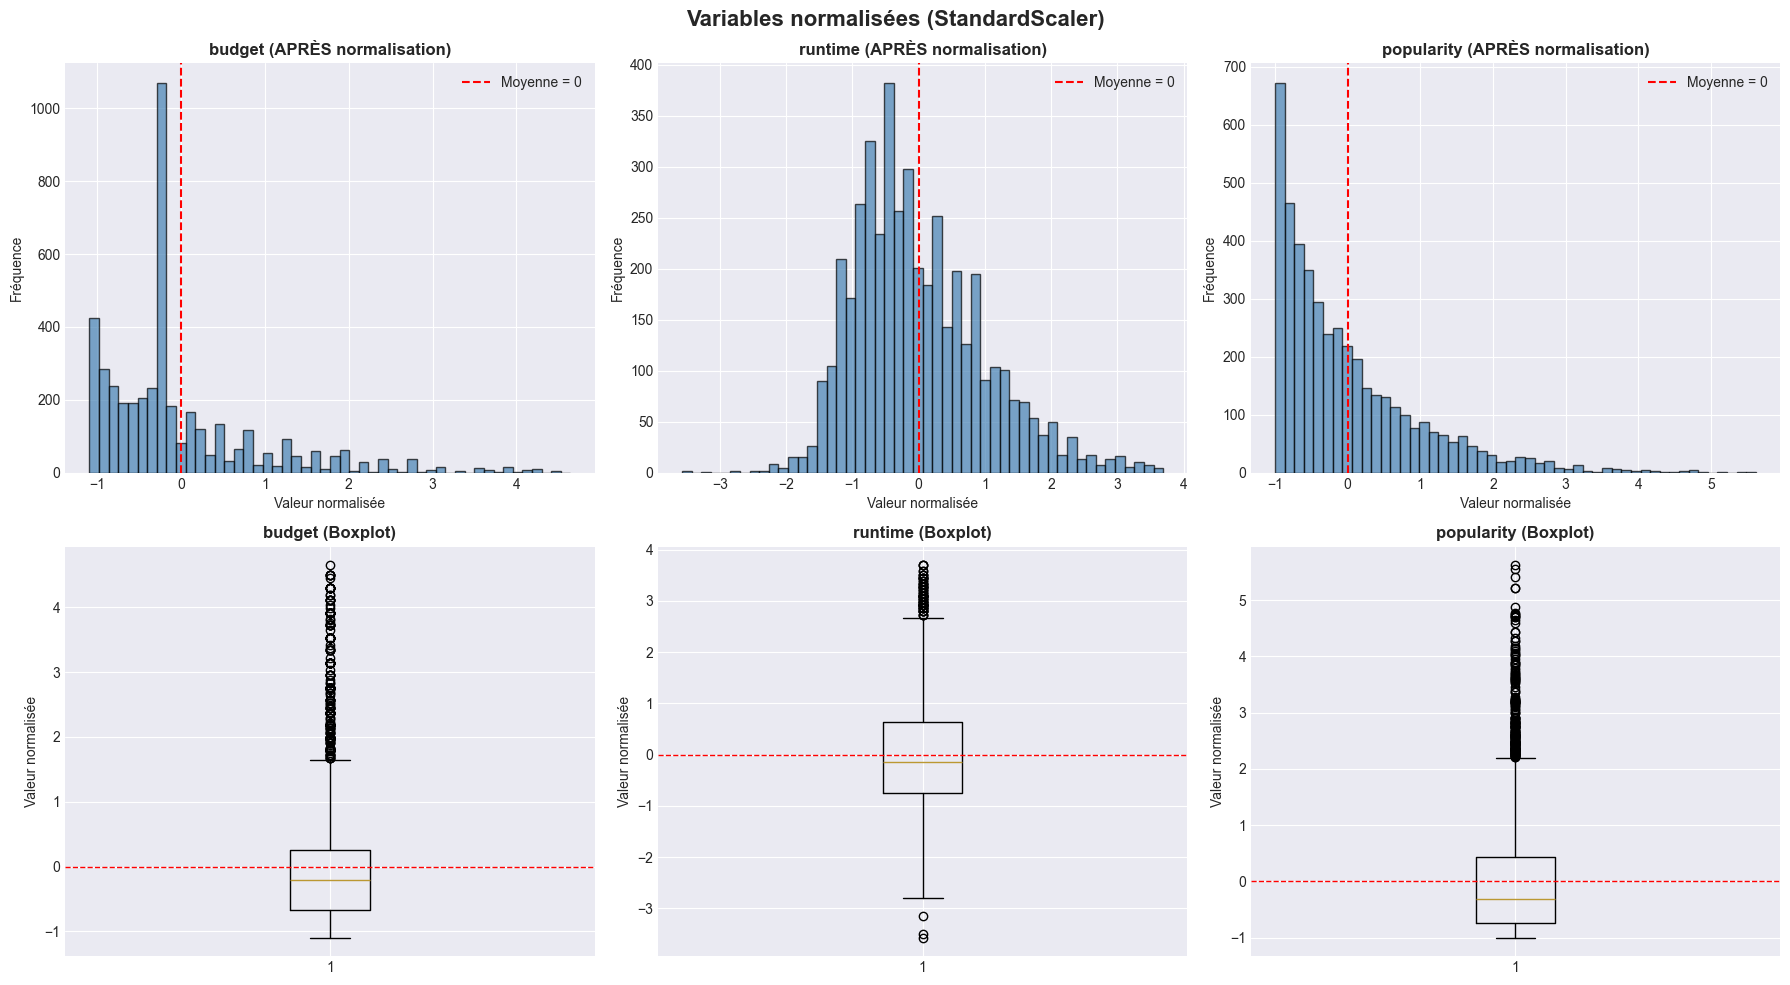


💾 Scaler sauvegardé: 'scaler.pkl'
   → Nécessaire pour normaliser les nouvelles données lors du déploiement

🎯 AVANTAGES DE LA NORMALISATION:
  1. Algorithmes convergent plus rapidement (Gradient Descent)
  2. Poids/importances comparables entre features
  3. Amélioration des performances (KNN, SVM, Régression)
  4. Obligatoire pour certains algorithmes (Neural Networks)

✅ DONNÉES PRÊTES POUR LA MODÉLISATION!


In [24]:
print("="*80)
print("NORMALISATION DES VARIABLES NUMÉRIQUES")
print("="*80)

print("\n💡 POURQUOI NORMALISER?")
print("-" * 80)
print("  • Les algorithmes ML sont sensibles à l'échelle des variables")
print("  • Exemple: budget (millions) vs runtime (minutes)")
print("  • Sans normalisation: budget domine le modèle")
print("  • StandardScaler: Moyenne = 0, Écart-type = 1")

# Identifier les variables numériques à normaliser
num_cols_to_scale = []

# Variables de base
basic_num = ['budget', 'runtime', 'popularity', 'vote_average', 'vote_count']
for col in basic_num:
    if col in X.columns:
        num_cols_to_scale.append(col)

# Variables dérivées
derived_num = ['release_year', 'release_month', 'num_genres', 'is_english', 
               'is_summer_release', 'is_holiday_release', 'success_score']
for col in derived_num:
    if col in X.columns:
        num_cols_to_scale.append(col)

# Afficher les variables à normaliser
print(f"\n📋 VARIABLES À NORMALISER ({len(num_cols_to_scale)}):")
for i, col in enumerate(num_cols_to_scale, 1):
    print(f"  {i}. {col}")

# Statistiques AVANT normalisation
print(f"\n📊 STATISTIQUES AVANT NORMALISATION:")
print("-" * 80)
display(X[num_cols_to_scale].describe().round(2))

print("\n💡 CE QU'IL FAUT REGARDER:")
print("  • mean (moyenne): Varie beaucoup d'une variable à l'autre")
print("  • std (écart-type): Échelles très différentes")
print("  • Exemple: budget moyen >> runtime moyen")

# Normalisation avec StandardScaler
print(f"\n🔄 Normalisation en cours...")
scaler = StandardScaler()
X[num_cols_to_scale] = scaler.fit_transform(X[num_cols_to_scale])

print(f"✅ Normalisation terminée!")

# Statistiques APRÈS normalisation
print(f"\n📊 STATISTIQUES APRÈS NORMALISATION:")
print("-" * 80)
display(X[num_cols_to_scale].describe().round(2))

print("\n💡 VÉRIFICATION:")
print("  • mean ≈ 0 (ou très proche): ✅")
print("  • std ≈ 1: ✅")
print("  • Toutes les variables sur la même échelle: ✅")

print("\n📈 VISUALISATION DE LA NORMALISATION:")

# Avant/Après pour quelques variables
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Choisir 3 variables pour illustration
sample_vars = num_cols_to_scale[:3] if len(num_cols_to_scale) >= 3 else num_cols_to_scale

for idx, var in enumerate(sample_vars):
    # Charger les données originales pour comparaison
    # (On va simuler avec les données actuelles dénormalisées)
    
    # Histogramme normalisé
    axes[0, idx].hist(X[var], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    axes[0, idx].set_title(f'{var} (APRÈS normalisation)', fontweight='bold')
    axes[0, idx].set_xlabel('Valeur normalisée')
    axes[0, idx].set_ylabel('Fréquence')
    axes[0, idx].axvline(0, color='red', linestyle='--', label='Moyenne = 0')
    axes[0, idx].legend()
    
    # Boxplot
    axes[1, idx].boxplot(X[var], vert=True)
    axes[1, idx].set_title(f'{var} (Boxplot)', fontweight='bold')
    axes[1, idx].set_ylabel('Valeur normalisée')
    axes[1, idx].axhline(0, color='red', linestyle='--', linewidth=1)

plt.suptitle('Variables normalisées (StandardScaler)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Sauvegarder le scaler pour le déploiement
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("\n💾 Scaler sauvegardé: 'scaler.pkl'")
print("   → Nécessaire pour normaliser les nouvelles données lors du déploiement")

print("\n🎯 AVANTAGES DE LA NORMALISATION:")
print("  1. Algorithmes convergent plus rapidement (Gradient Descent)")
print("  2. Poids/importances comparables entre features")
print("  3. Amélioration des performances (KNN, SVM, Régression)")
print("  4. Obligatoire pour certains algorithmes (Neural Networks)")

print("\n✅ DONNÉES PRÊTES POUR LA MODÉLISATION!")

In [25]:
print("="*80)
print("EXPORT ET VÉRIFICATIONS FINALES")
print("="*80)

print(f"\n📊 DIMENSIONS FINALES:")
print(f"  • Features (X): {X.shape}")
print(f"  • Cible (y): {y.shape}")
print(f"  • Nombre total de features: {X.shape[1]}")

# Vérification des valeurs manquantes
print(f"\n🔍 VÉRIFICATION DES VALEURS MANQUANTES:")
print("-" * 80)
missing_X = X.isnull().sum().sum()
missing_y = y.isnull().sum()

if missing_X == 0 and missing_y == 0:
    print(f"  ✅ Aucune valeur manquante dans X")
    print(f"  ✅ Aucune valeur manquante dans y")
else:
    print(f"  ⚠️ Valeurs manquantes dans X: {missing_X}")
    print(f"  ⚠️ Valeurs manquantes dans y: {missing_y}")
    print(f"\n  Action requise: Imputer ou supprimer ces lignes")

# Vérification des valeurs infinies
print(f"\n🔍 VÉRIFICATION DES VALEURS INFINIES:")
print("-" * 80)
inf_count = np.isinf(X.select_dtypes(include=[np.number])).sum().sum()

if inf_count == 0:
    print(f"  ✅ Aucune valeur infinie détectée")
else:
    print(f"  ⚠️ {inf_count} valeurs infinies détectées")
    print(f"  Action: Remplacer par NaN puis imputer")
    X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Types de données
print(f"\n📊 TYPES DE DONNÉES:")
print("-" * 80)
type_counts = X.dtypes.value_counts()
print(type_counts)

print(f"\n💡 INTERPRÉTATION:")
for dtype, count in type_counts.items():
    print(f"  • {dtype}: {count} colonnes")

# Liste complète des features
print(f"\n📋 LISTE COMPLÈTE DES FEATURES ({len(X.columns)}):")
print("-" * 80)

# Grouper par catégorie
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
genre_features = [col for col in X.columns if col.startswith('genre_')]
lang_features = [col for col in X.columns if col.startswith('original_language_')]
era_features = [col for col in X.columns if col.startswith('era_')]
other_features = [col for col in X.columns if col not in numeric_features 
                  and col not in genre_features and col not in lang_features 
                  and col not in era_features]

print(f"1️⃣ FEATURES NUMÉRIQUES ({len(numeric_features)}):")
for col in numeric_features[:10]:
    print(f"   • {col}")
if len(numeric_features) > 10:
    print(f"   ... et {len(numeric_features) - 10} autres")

print(f"\n2️⃣ FEATURES GENRES ({len(genre_features)}):")
for col in genre_features[:5]:
    print(f"   • {col}")
if len(genre_features) > 5:
    print(f"   ... et {len(genre_features) - 5} autres")

print(f"\n3️⃣ FEATURES LANGUES ({len(lang_features)}):")
for col in lang_features[:5]:
    print(f"   • {col}")
if len(lang_features) > 5:
    print(f"   ... et {len(lang_features) - 5} autres")

if len(era_features) > 0:
    print(f"\n4️⃣ FEATURES ÈRES ({len(era_features)}):")
    for col in era_features:
        print(f"   • {col}")

if len(other_features) > 0:
    print(f"\n5️⃣ AUTRES FEATURES ({len(other_features)}):")
    for col in other_features:
        print(f"   • {col}")

# Sauvegarder la liste des features
X.columns.to_series().to_csv("features_final_list.csv", index=False)
print(f"\n💾 Liste des features sauvegardée: 'features_final_list.csv'")

# Export des datasets préparés
X.to_csv("X_prepared.csv", index=False)
y.to_csv("y_prepared.csv", index=False)
print(f"💾 Datasets préparés exportés:")
print(f"   • X_prepared.csv")
print(f"   • y_prepared.csv")

# Récapitulatif final
print(f"\n" + "="*80)
print("RÉCAPITULATIF FINAL - DONNÉES PRÊTES")
print("="*80)
print(f"✅ {len(X)} observations")
print(f"✅ {len(X.columns)} features")
print(f"✅ {y.nunique()} classes de succès")
print(f"✅ Aucune valeur manquante")
print(f"✅ Variables normalisées")
print(f"✅ Encodage terminé")

print(f"\n🎯 PROCHAINES ÉTAPES:")
print("  1. Séparer train/test (stratifié)")
print("  2. Appliquer SMOTE si déséquilibre")
print("  3. Entraîner les modèles")
print("  4. Évaluer et comparer")
print("  5. Sélectionner le meilleur modèle")

# Aperçu final
print(f"\n📝 APERÇU FINAL DE X:")
display(X.head())

print(f"\n📝 APERÇU FINAL DE y:")
display(y.head(10))

EXPORT ET VÉRIFICATIONS FINALES

📊 DIMENSIONS FINALES:
  • Features (X): (4446, 72)
  • Cible (y): (4446,)
  • Nombre total de features: 72

🔍 VÉRIFICATION DES VALEURS MANQUANTES:
--------------------------------------------------------------------------------
  ✅ Aucune valeur manquante dans X
  ✅ Aucune valeur manquante dans y

🔍 VÉRIFICATION DES VALEURS INFINIES:
--------------------------------------------------------------------------------
  ✅ Aucune valeur infinie détectée

📊 TYPES DE DONNÉES:
--------------------------------------------------------------------------------
bool       39
int64      21
float64    12
Name: count, dtype: int64

💡 INTERPRÉTATION:
  • bool: 39 colonnes
  • int64: 21 colonnes
  • float64: 12 colonnes

📋 LISTE COMPLÈTE DES FEATURES (72):
--------------------------------------------------------------------------------
1️⃣ FEATURES NUMÉRIQUES (33):
   • budget
   • runtime
   • popularity
   • vote_average
   • vote_count
   • budget_missing
   • success_

,budget,runtime,popularity,vote_average,vote_count,budget_missing,success_score,release_year,release_month,is_summer_release,...,original_language_ta,original_language_te,original_language_th,original_language_tr,original_language_vi,original_language_xx,original_language_zh,era_2010s+ (2010+),era_Classique (< 1980),era_Moderne (1980-1999)
0,2.950563,2.251835,2.470966,1.087103,4.697914,0,1.187131,0.869499,-0.514241,-0.561591,...,False,False,False,False,False,False,False,True,False,False
1,4.298679,-0.868613,0.280884,0.033799,0.419353,0,-0.000021,0.379165,0.358509,1.780655,...,False,False,False,False,False,False,False,False,False,False
2,4.491267,0.391568,2.405083,-0.756179,1.284809,0,0.084666,0.460887,0.067593,1.780655,...,False,False,False,False,False,False,False,False,False,False
3,-0.053810,0.211542,-0.861849,-1.107280,-0.653869,0,-1.171151,1.032944,-1.386991,-0.561591,...,False,False,False,False,False,False,False,True,False,False
4,-0.516021,0.871637,-0.461618,0.384901,-0.497686,0,0.836173,1.114666,0.067593,1.780655,...,False,False,False,False,False,False,False,True,False,False



📝 APERÇU FINAL DE y:


0    1
1    1
2    1
3    0
4    1
5    1
6    0
7    1
8    1
9    1
Name: success, dtype: int64

SÉPARATION TRAIN / TEST (STRATIFIÉE)

💡 POURQUOI SÉPARER LES DONNÉES?
--------------------------------------------------------------------------------
  • Train Set: Pour entraîner le modèle (80%)
  • Test Set: Pour évaluer la performance (20%)
  • Le test set simule de nouvelles données jamais vues
  • CRITIQUE: Ne jamais entraîner sur le test!

💡 POURQUOI STRATIFIER?
--------------------------------------------------------------------------------
  • Garantit la même proportion de classes dans train ET test
  • Exemple: Si 30% de succès dans les données → 30% dans train ET test
  • Important quand les classes sont déséquilibrées

🔄 Séparation en cours...
✅ Séparation effectuée!

📊 DIMENSIONS DES ENSEMBLES:
--------------------------------------------------------------------------------
  • X_train: (3556, 72) (80%)
  • X_test:  (890, 72) (20%)
  • y_train: (3556,)
  • y_test:  (890,)

📊 DISTRIBUTION DANS TRAIN SET:
---------------------------------------------------------------------

,Train (%),Test (%),Différence
Échec,42.07,42.02,0.05
Succès modéré,45.75,45.84,0.09
Grand succès,12.18,12.13,0.05



✅ Stratification réussie! Les distributions sont identiques.


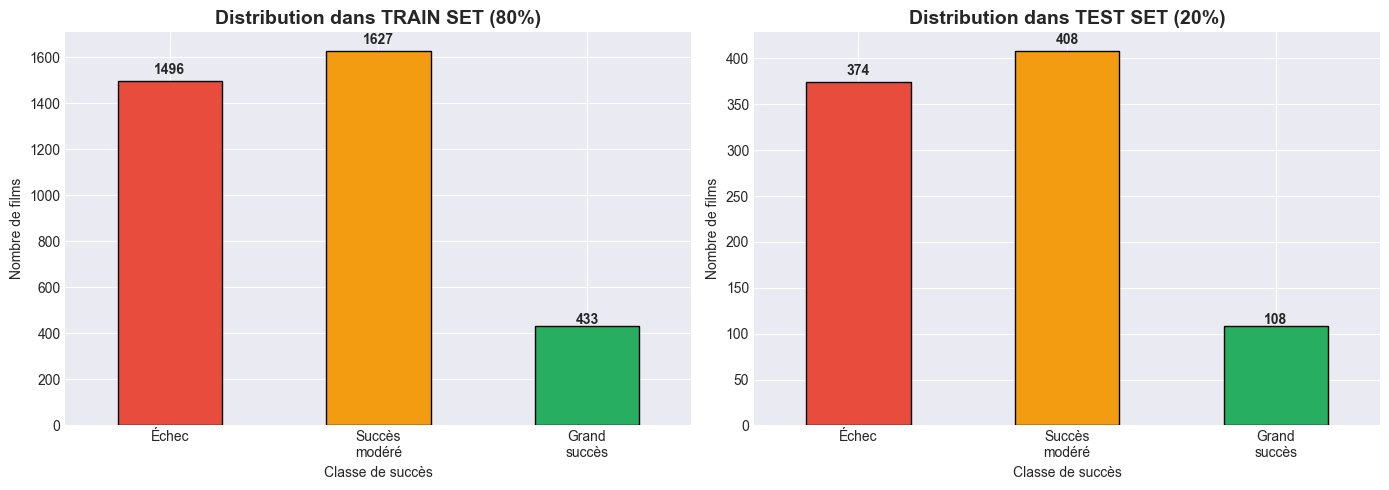


✅ TRAIN/TEST SPLIT TERMINÉ!

⚠️ RÈGLE D'OR:
  • N'UTILISER le test set que pour l'évaluation finale
  • Pas de tuning d'hyperparamètres sur le test
  • Pas de feature selection basée sur le test
  • Le test set = données 'futures' jamais vues


In [26]:
print("="*80)
print("SÉPARATION TRAIN / TEST (STRATIFIÉE)")
print("="*80)

print("\n💡 POURQUOI SÉPARER LES DONNÉES?")
print("-" * 80)
print("  • Train Set: Pour entraîner le modèle (80%)")
print("  • Test Set: Pour évaluer la performance (20%)")
print("  • Le test set simule de nouvelles données jamais vues")
print("  • CRITIQUE: Ne jamais entraîner sur le test!")

print("\n💡 POURQUOI STRATIFIER?")
print("-" * 80)
print("  • Garantit la même proportion de classes dans train ET test")
print("  • Exemple: Si 30% de succès dans les données → 30% dans train ET test")
print("  • Important quand les classes sont déséquilibrées")

# Séparation stratifiée
print(f"\n🔄 Séparation en cours...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% pour le test
    random_state=42,     # Reproductibilité
    stratify=y           # Stratification par classe
)

print(f"✅ Séparation effectuée!")

# Afficher les dimensions
print(f"\n📊 DIMENSIONS DES ENSEMBLES:")
print("-" * 80)
print(f"  • X_train: {X_train.shape} (80%)")
print(f"  • X_test:  {X_test.shape} (20%)")
print(f"  • y_train: {y_train.shape}")
print(f"  • y_test:  {y_test.shape}")

# Vérifier la distribution dans train
print(f"\n📊 DISTRIBUTION DANS TRAIN SET:")
print("-" * 80)
train_dist = y_train.value_counts().sort_index()
train_dist.index = ['Échec', 'Succès modéré', 'Grand succès']
print(train_dist)

train_pct = (train_dist / len(y_train) * 100).round(2)
print(f"\nPourcentages:")
print(train_pct)

# Vérifier la distribution dans test
print(f"\n📊 DISTRIBUTION DANS TEST SET:")
print("-" * 80)
test_dist = y_test.value_counts().sort_index()
test_dist.index = ['Échec', 'Succès modéré', 'Grand succès']
print(test_dist)

test_pct = (test_dist / len(y_test) * 100).round(2)
print(f"\nPourcentages:")
print(test_pct)

# Vérification de la stratification
print(f"\n🔍 VÉRIFICATION DE LA STRATIFICATION:")
print("-" * 80)
print("Les pourcentages doivent être identiques dans train et test:")
comparison = pd.DataFrame({
    'Train (%)': train_pct,
    'Test (%)': test_pct,
    'Différence': (train_pct - test_pct).abs()
})
display(comparison)

if (comparison['Différence'] < 1).all():
    print("\n✅ Stratification réussie! Les distributions sont identiques.")
else:
    print("\n⚠️ Légère différence (normale avec petits échantillons)")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Palette de couleurs
colors = ['#e74c3c', '#f39c12', '#27ae60']

# Train set
train_dist.plot(kind='bar', ax=axes[0], color=colors, edgecolor='black')
axes[0].set_title('Distribution dans TRAIN SET (80%)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Classe de succès')
axes[0].set_ylabel('Nombre de films')
axes[0].set_xticklabels(['Échec', 'Succès\nmodéré', 'Grand\nsuccès'], rotation=0)

# Ajouter les valeurs sur les barres
for i, v in enumerate(train_dist):
    axes[0].text(i, v + v*0.02, str(v), ha='center', fontweight='bold')

# Test set
test_dist.plot(kind='bar', ax=axes[1], color=colors, edgecolor='black')
axes[1].set_title('Distribution dans TEST SET (20%)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Classe de succès')
axes[1].set_ylabel('Nombre de films')
axes[1].set_xticklabels(['Échec', 'Succès\nmodéré', 'Grand\nsuccès'], rotation=0)

# Ajouter les valeurs sur les barres
for i, v in enumerate(test_dist):
    axes[1].text(i, v + v*0.02, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n✅ TRAIN/TEST SPLIT TERMINÉ!")
print(f"\n⚠️ RÈGLE D'OR:")
print("  • N'UTILISER le test set que pour l'évaluation finale")
print("  • Pas de tuning d'hyperparamètres sur le test")
print("  • Pas de feature selection basée sur le test")
print("  • Le test set = données 'futures' jamais vues")

In [27]:
print("="*80)
print("CRÉATION DE LA FONCTION D'ÉVALUATION")
print("="*80)

def evaluate_model(model, X_test, y_test, model_name="Model"):
    """
    Évalue un modèle de classification multi-classe et affiche les métriques
    
    Paramètres:
    -----------
    model : modèle sklearn entraîné
    X_test : features de test
    y_test : labels de test
    model_name : nom du modèle (pour affichage)
    
    Retour:
    -------
    metrics : dictionnaire des métriques
    cm : matrice de confusion
    """
    
    # Prédictions
    y_pred = model.predict(X_test)
    
    # Calcul des métriques (weighted pour multi-classe)
    metrics = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
        "Recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
        "F1-score": f1_score(y_test, y_pred, average='weighted', zero_division=0)
    }
    
    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    
    # Affichage des résultats
    print("\n" + "="*60)
    print(f"📊 ÉVALUATION: {model_name}")
    print("="*60)
    print(f"Accuracy:  {metrics['Accuracy']:.4f} (Taux de prédictions correctes)")
    print(f"Precision: {metrics['Precision']:.4f} (Fiabilité des prédictions positives)")
    print(f"Recall:    {metrics['Recall']:.4f} (Couverture des vrais positifs)")
    print(f"F1-score:  {metrics['F1-score']:.4f} (Moyenne harmonique P/R)")
    
    print(f"\n📊 Matrice de confusion:")
    print(cm)
    print("\nInterprétation:")
    print("  • Ligne = Classe réelle")
    print("  • Colonne = Classe prédite")
    print("  • Diagonale = Prédictions correctes")
    
    # Rapport de classification détaillé
    print(f"\n📋 Rapport de classification détaillé:")
    print(classification_report(y_test, y_pred, 
                               target_names=['Échec', 'Succès modéré', 'Grand succès']))
    
    # Visualisation de la matrice de confusion
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=['Échec', 'Succès modéré', 'Grand succès'],
                yticklabels=['Échec', 'Succès modéré', 'Grand succès'])
    plt.title(f'Matrice de Confusion - {model_name}', fontsize=14, fontweight='bold')
    plt.ylabel('Valeurs Réelles')
    plt.xlabel('Valeurs Prédites')
    plt.tight_layout()
    plt.show()
    
    return metrics, cm

print("✅ Fonction d'évaluation créée!")

print("\n💡 MÉTRIQUES EXPLIQUÉES:")
print("-" * 80)
print("  • Accuracy: % de prédictions correctes (peut être trompeuse si déséquilibre)")
print("  • Precision: Parmi les prédictions positives, combien sont vraies?")
print("  • Recall: Parmi les vrais positifs, combien ont été détectés?")
print("  • F1-score: Compromis entre Precision et Recall (meilleure métrique globale)")
print("\n  Pour la classification multi-classe:")
print("  • average='weighted': Moyenne pondérée par le nombre d'exemples par classe")

CRÉATION DE LA FONCTION D'ÉVALUATION
✅ Fonction d'évaluation créée!

💡 MÉTRIQUES EXPLIQUÉES:
--------------------------------------------------------------------------------
  • Accuracy: % de prédictions correctes (peut être trompeuse si déséquilibre)
  • Precision: Parmi les prédictions positives, combien sont vraies?
  • Recall: Parmi les vrais positifs, combien ont été détectés?
  • F1-score: Compromis entre Precision et Recall (meilleure métrique globale)

  Pour la classification multi-classe:
  • average='weighted': Moyenne pondérée par le nombre d'exemples par classe


TRAITEMENT DU DÉSÉQUILIBRE DES CLASSES (SMOTE)

📊 ANALYSE DU DÉSÉQUILIBRE:
--------------------------------------------------------------------------------
  • Classe majoritaire: 1627 exemples
  • Classe minoritaire: 433 exemples
  • Ratio: 3.76:1

⚠️ DÉSÉQUILIBRE DÉTECTÉ (ratio > 2:1)
   → Application de SMOTE recommandée

💡 QU'EST-CE QUE SMOTE?
--------------------------------------------------------------------------------
  • Synthetic Minority Over-sampling Technique
  • Crée des exemples synthétiques de la classe minoritaire
  • Interpolation entre exemples existants
  • IMPORTANT: Appliquer UNIQUEMENT sur le train set

📊 AVANT SMOTE:
  • Dimensions X_train: (3556, 72)
  • Distribution y_train:
success
0    1496
1    1627
2     433
Name: count, dtype: int64

🔄 Application de SMOTE...
✅ SMOTE appliqué!

📊 APRÈS SMOTE:
  • Dimensions X_train: (4881, 72)
  • Distribution y_train:
success
0    1627
1    1627
2    1627
Name: count, dtype: int64


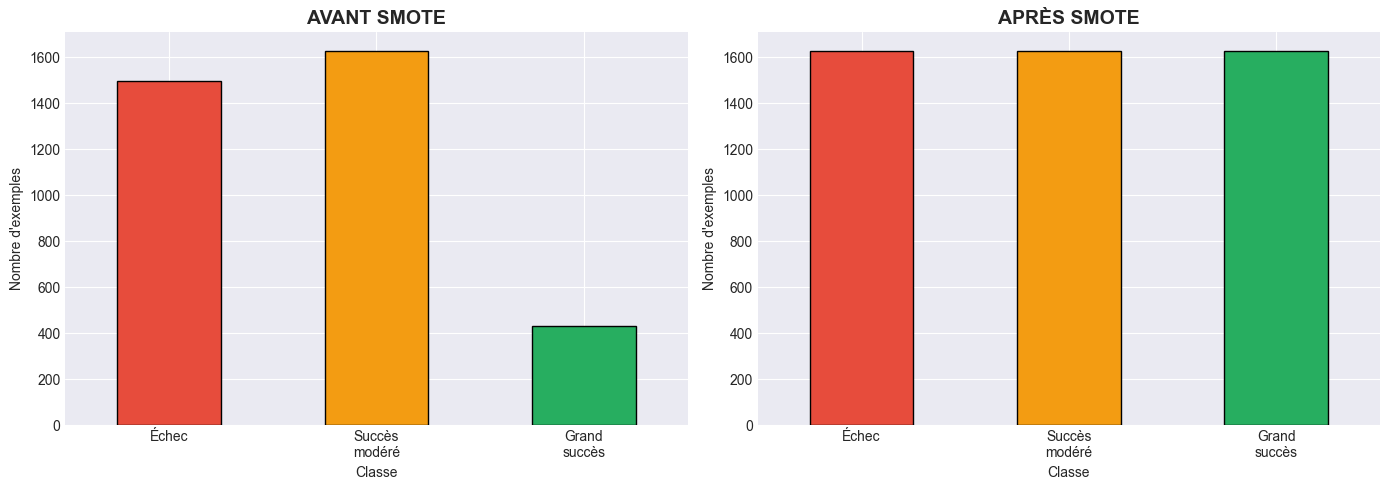


💡 ATTENTION:
  • SMOTE appliqué UNIQUEMENT sur train
  • Test set reste INCHANGÉ (données réelles)
  • Permet d'éviter le biais vers la classe majoritaire

🎯 DONNÉES D'ENTRAÎNEMENT FINALES:
  • X_train_balanced: (4881, 72)
  • y_train_balanced: (4881,)
  • X_test (inchangé): (890, 72)
  • y_test (inchangé): (890,)


In [29]:
print("="*80)
print("TRAITEMENT DU DÉSÉQUILIBRE DES CLASSES (SMOTE)")
print("="*80)

# Vérifier le déséquilibre
train_dist = y_train.value_counts().sort_index()
max_class = train_dist.max()
min_class = train_dist.min()
imbalance_ratio = max_class / min_class

print(f"\n📊 ANALYSE DU DÉSÉQUILIBRE:")
print("-" * 80)
print(f"  • Classe majoritaire: {max_class} exemples")
print(f"  • Classe minoritaire: {min_class} exemples")
print(f"  • Ratio: {imbalance_ratio:.2f}:1")

# Décision: Appliquer SMOTE ou non?
if imbalance_ratio > 2:
    print(f"\n⚠️ DÉSÉQUILIBRE DÉTECTÉ (ratio > 2:1)")
    print(f"   → Application de SMOTE recommandée")
    
    apply_smote = True
else:
    print(f"\n✅ Déséquilibre acceptable (ratio < 2:1)")
    print(f"   → SMOTE non nécessaire")
    
    apply_smote = False

if apply_smote:
    print(f"\n💡 QU'EST-CE QUE SMOTE?")
    print("-" * 80)
    print("  • Synthetic Minority Over-sampling Technique")
    print("  • Crée des exemples synthétiques de la classe minoritaire")
    print("  • Interpolation entre exemples existants")
    print("  • IMPORTANT: Appliquer UNIQUEMENT sur le train set")
    
    # Afficher avant SMOTE
    print(f"\n📊 AVANT SMOTE:")
    print(f"  • Dimensions X_train: {X_train.shape}")
    print(f"  • Distribution y_train:")
    print(y_train.value_counts().sort_index())
    
    # Appliquer SMOTE
    print(f"\n🔄 Application de SMOTE...")
    from imblearn.over_sampling import SMOTE
    
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
    
    print(f"✅ SMOTE appliqué!")
    
    # Afficher après SMOTE
    print(f"\n📊 APRÈS SMOTE:")
    print(f"  • Dimensions X_train: {X_train_balanced.shape}")
    print(f"  • Distribution y_train:")
    print(y_train_balanced.value_counts().sort_index())
    
    # Visualisation
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    colors = ['#e74c3c', '#f39c12', '#27ae60']
    
    # Avant SMOTE
    y_train.value_counts().sort_index().plot(kind='bar', ax=axes[0], 
                                              color=colors, edgecolor='black')
    axes[0].set_title('AVANT SMOTE', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Classe')
    axes[0].set_ylabel('Nombre d\'exemples')
    axes[0].set_xticklabels(['Échec', 'Succès\nmodéré', 'Grand\nsuccès'], rotation=0)
    
    # Après SMOTE
    y_train_balanced.value_counts().sort_index().plot(kind='bar', ax=axes[1], 
                                                       color=colors, edgecolor='black')
    axes[1].set_title('APRÈS SMOTE', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Classe')
    axes[1].set_ylabel('Nombre d\'exemples')
    axes[1].set_xticklabels(['Échec', 'Succès\nmodéré', 'Grand\nsuccès'], rotation=0)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n💡 ATTENTION:")
    print("  • SMOTE appliqué UNIQUEMENT sur train")
    print("  • Test set reste INCHANGÉ (données réelles)")
    print("  • Permet d'éviter le biais vers la classe majoritaire")
    
else:
    # Pas de SMOTE nécessaire
    print(f"\n✅ SMOTE non appliqué (déséquilibre acceptable)")
    print(f"   → Utilisation des données d'origine")
    
    X_train_balanced = X_train.copy()
    y_train_balanced = y_train.copy()

print(f"\n🎯 DONNÉES D'ENTRAÎNEMENT FINALES:")
print(f"  • X_train_balanced: {X_train_balanced.shape}")
print(f"  • y_train_balanced: {y_train_balanced.shape}")
print(f"  • X_test (inchangé): {X_test.shape}")
print(f"  • y_test (inchangé): {y_test.shape}")


🌳 MODÈLE 1: ARBRE DE DÉCISION

💡 QU'EST-CE QU'UN ARBRE DE DÉCISION?
--------------------------------------------------------------------------------
  • Modèle qui prend des décisions séquentielles
  • Arbre de questions: 'Budget > 50M?' → OUI/NON
  • Facile à interpréter et visualiser
  • Peut capturer des relations non-linéaires

  ✅ Avantages:
     - Simple à comprendre
     - Pas besoin de normalisation
     - Gère bien les interactions

  ❌ Inconvénients:
     - Tendance au surapprentissage (overfitting)
     - Instable (petit changement = arbre différent)

🔄 Entraînement en cours...
✅ Entraînement terminé!

📊 INFORMATIONS SUR L'ARBRE:
  • Profondeur de l'arbre: 10
  • Nombre de feuilles: 77
  • Nombre de features utilisées: 72

📊 ÉVALUATION: Decision Tree
Accuracy:  0.9371 (Taux de prédictions correctes)
Precision: 0.9371 (Fiabilité des prédictions positives)
Recall:    0.9371 (Couverture des vrais positifs)
F1-score:  0.9370 (Moyenne harmonique P/R)

📊 Matrice de confusion:
[[3

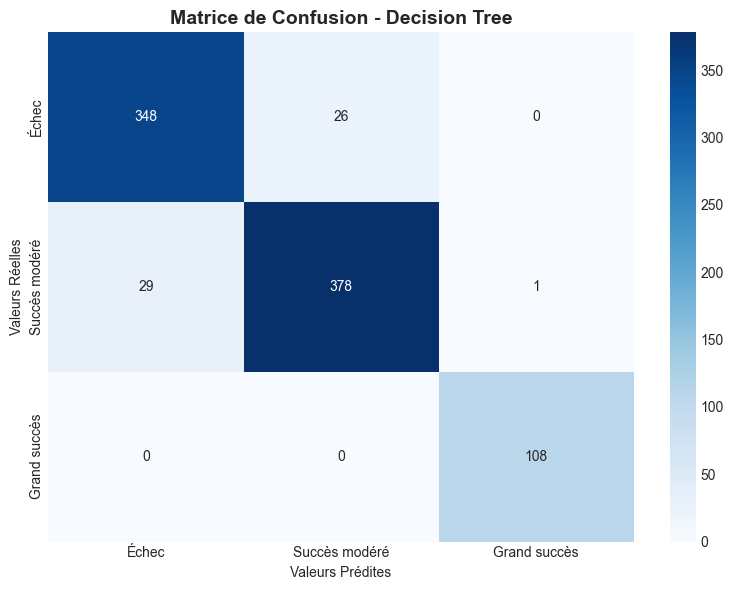


🎯 INTERPRÉTATION:
  ✅ Bonne performance globale


In [30]:
print("\n" + "="*80)
print("🌳 MODÈLE 1: ARBRE DE DÉCISION")
print("="*80)

print("\n💡 QU'EST-CE QU'UN ARBRE DE DÉCISION?")
print("-" * 80)
print("  • Modèle qui prend des décisions séquentielles")
print("  • Arbre de questions: 'Budget > 50M?' → OUI/NON")
print("  • Facile à interpréter et visualiser")
print("  • Peut capturer des relations non-linéaires")
print("\n  ✅ Avantages:")
print("     - Simple à comprendre")
print("     - Pas besoin de normalisation")
print("     - Gère bien les interactions")
print("\n  ❌ Inconvénients:")
print("     - Tendance au surapprentissage (overfitting)")
print("     - Instable (petit changement = arbre différent)")

# Entraînement
print(f"\n🔄 Entraînement en cours...")
dt = DecisionTreeClassifier(
    max_depth=10,        # Limiter la profondeur pour éviter overfitting
    min_samples_split=20, # Min exemples pour split
    min_samples_leaf=10,  # Min exemples par feuille
    random_state=42
)

dt.fit(X_train_balanced, y_train_balanced)
print(f"✅ Entraînement terminé!")

# Informations sur l'arbre
print(f"\n📊 INFORMATIONS SUR L'ARBRE:")
print(f"  • Profondeur de l'arbre: {dt.get_depth()}")
print(f"  • Nombre de feuilles: {dt.get_n_leaves()}")
print(f"  • Nombre de features utilisées: {dt.n_features_in_}")

# Évaluation
dt_metrics, dt_cm = evaluate_model(dt, X_test, y_test, "Decision Tree")

# Sauvegarder les résultats
dt_results = dt_metrics.copy()

print(f"\n🎯 INTERPRÉTATION:")
if dt_metrics['Accuracy'] > 0.7:
    print("  ✅ Bonne performance globale")
elif dt_metrics['Accuracy'] > 0.6:
    print("  ⚡ Performance acceptable")
else:
    print("  ⚠️ Performance faible - Amélioration nécessaire")


👥 MODÈLE 2: K PLUS PROCHES VOISINS (KNN)

💡 QU'EST-CE QUE KNN?
--------------------------------------------------------------------------------
  • Algorithme basé sur la similarité
  • Prédit la classe des K voisins les plus proches
  • 'Dis-moi qui sont tes voisins, je te dirai qui tu es'

  ✅ Avantages:
     - Simple conceptuellement
     - Pas d'entraînement (lazy learning)
     - S'adapte automatiquement aux données

  ❌ Inconvénients:
     - Lent sur gros datasets
     - Sensible à l'échelle (normalisation nécessaire)
     - Sensible aux features non pertinentes

🔄 Entraînement en cours...
✅ Entraînement terminé!

📊 ÉVALUATION: KNN (k=5)
Accuracy:  0.7775 (Taux de prédictions correctes)
Precision: 0.7831 (Fiabilité des prédictions positives)
Recall:    0.7775 (Couverture des vrais positifs)
F1-score:  0.7755 (Moyenne harmonique P/R)

📊 Matrice de confusion:
[[311  59   4]
 [ 88 280  40]
 [  0   7 101]]

Interprétation:
  • Ligne = Classe réelle
  • Colonne = Classe prédite
  • D

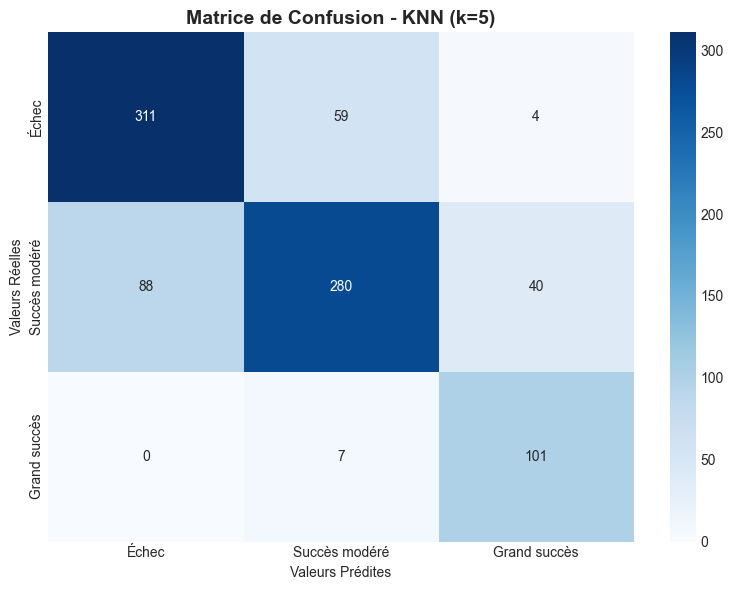


💡 NOTE:
  • k=5 est une valeur par défaut souvent efficace
  • Peut être optimisé avec GridSearchCV (k=3, 5, 7, 9...)
  • weights='distance' donne plus de poids aux voisins proches


In [31]:
print("\n" + "="*80)
print("👥 MODÈLE 2: K PLUS PROCHES VOISINS (KNN)")
print("="*80)

print("\n💡 QU'EST-CE QUE KNN?")
print("-" * 80)
print("  • Algorithme basé sur la similarité")
print("  • Prédit la classe des K voisins les plus proches")
print("  • 'Dis-moi qui sont tes voisins, je te dirai qui tu es'")
print("\n  ✅ Avantages:")
print("     - Simple conceptuellement")
print("     - Pas d'entraînement (lazy learning)")
print("     - S'adapte automatiquement aux données")
print("\n  ❌ Inconvénients:")
print("     - Lent sur gros datasets")
print("     - Sensible à l'échelle (normalisation nécessaire)")
print("     - Sensible aux features non pertinentes")

# Entraînement
print(f"\n🔄 Entraînement en cours...")
knn = KNeighborsClassifier(
    n_neighbors=5,        # Nombre de voisins
    weights='distance',   # Pondérer par la distance
    n_jobs=-1            # Parallélisation
)

knn.fit(X_train_balanced, y_train_balanced)
print(f"✅ Entraînement terminé!")

# Évaluation
knn_metrics, knn_cm = evaluate_model(knn, X_test, y_test, "KNN (k=5)")

# Sauvegarder les résultats
knn_results = knn_metrics.copy()

print(f"\n💡 NOTE:")
print("  • k=5 est une valeur par défaut souvent efficace")
print("  • Peut être optimisé avec GridSearchCV (k=3, 5, 7, 9...)")
print("  • weights='distance' donne plus de poids aux voisins proches")


📊 MODÈLE 3: NAÏVE BAYES

💡 QU'EST-CE QUE NAÏVE BAYES?
--------------------------------------------------------------------------------
  • Basé sur le théorème de Bayes (probabilités)
  • Suppose l'indépendance des features (naïf)
  • Rapide et efficace même avec peu de données

  ✅ Avantages:
     - Très rapide
     - Fonctionne bien même avec peu de données
     - Résistant au surapprentissage

  ❌ Inconvénients:
     - Hypothèse d'indépendance souvent fausse
     - Moins performant si features corrélées

🔄 Entraînement en cours...
✅ Entraînement terminé!

📊 ÉVALUATION: Naive Bayes
Accuracy:  0.1955 (Taux de prédictions correctes)
Precision: 0.4814 (Fiabilité des prédictions positives)
Recall:    0.1955 (Couverture des vrais positifs)
F1-score:  0.1594 (Moyenne harmonique P/R)

📊 Matrice de confusion:
[[ 38 172 164]
 [  2  33 373]
 [  1   4 103]]

Interprétation:
  • Ligne = Classe réelle
  • Colonne = Classe prédite
  • Diagonale = Prédictions correctes

📋 Rapport de classification

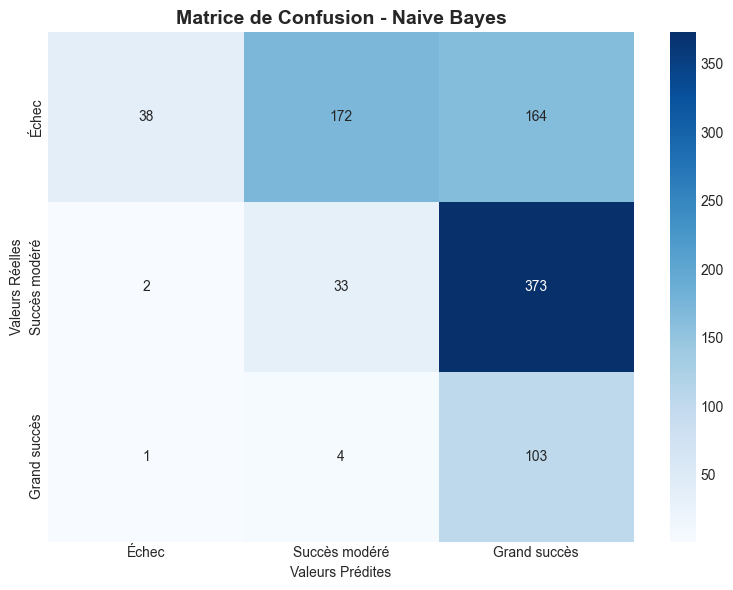


💡 NOTE:
  • GaussianNB suppose distribution gaussienne des features
  • Fonctionne mieux après normalisation
  • Bon baseline rapide à entraîner


In [32]:
print("\n" + "="*80)
print("📊 MODÈLE 3: NAÏVE BAYES")
print("="*80)

print("\n💡 QU'EST-CE QUE NAÏVE BAYES?")
print("-" * 80)
print("  • Basé sur le théorème de Bayes (probabilités)")
print("  • Suppose l'indépendance des features (naïf)")
print("  • Rapide et efficace même avec peu de données")
print("\n  ✅ Avantages:")
print("     - Très rapide")
print("     - Fonctionne bien même avec peu de données")
print("     - Résistant au surapprentissage")
print("\n  ❌ Inconvénients:")
print("     - Hypothèse d'indépendance souvent fausse")
print("     - Moins performant si features corrélées")

# Entraînement
print(f"\n🔄 Entraînement en cours...")
nb = GaussianNB()

nb.fit(X_train_balanced, y_train_balanced)
print(f"✅ Entraînement terminé!")

# Évaluation
nb_metrics, nb_cm = evaluate_model(nb, X_test, y_test, "Naive Bayes")

# Sauvegarder les résultats
nb_results = nb_metrics.copy()

print(f"\n💡 NOTE:")
print("  • GaussianNB suppose distribution gaussienne des features")
print("  • Fonctionne mieux après normalisation")
print("  • Bon baseline rapide à entraîner")


🎒 MODÈLE 4: BAGGING (Bootstrap Aggregating)

💡 QU'EST-CE QUE LE BAGGING?
--------------------------------------------------------------------------------
  • Entraîne plusieurs modèles sur des sous-ensembles aléatoires
  • Moyenne les prédictions (vote majoritaire)
  • Réduit la variance et l'overfitting

  ✅ Avantages:
     - Réduit overfitting des arbres
     - Améliore stabilité
     - Parallélisable

  ❌ Inconvénients:
     - Moins interprétable
     - Plus lent qu'un seul modèle

🔄 Entraînement en cours...
✅ Entraînement terminé!

📊 ÉVALUATION: Bagging
Accuracy:  0.9607 (Taux de prédictions correctes)
Precision: 0.9608 (Fiabilité des prédictions positives)
Recall:    0.9607 (Couverture des vrais positifs)
F1-score:  0.9607 (Moyenne harmonique P/R)

📊 Matrice de confusion:
[[361  13   0]
 [ 21 386   1]
 [  0   0 108]]

Interprétation:
  • Ligne = Classe réelle
  • Colonne = Classe prédite
  • Diagonale = Prédictions correctes

📋 Rapport de classification détaillé:
               p

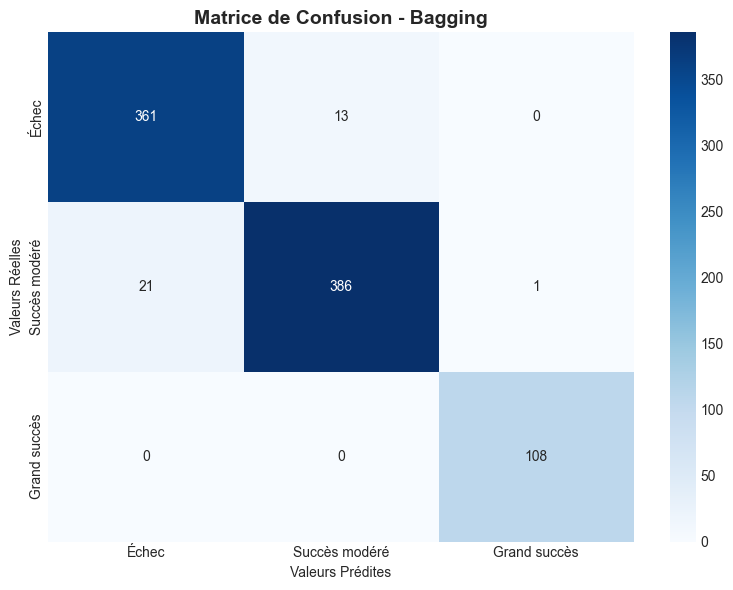


💡 INSIGHT:
  • Bagging = Ensemble de 100 arbres de décision
  • Chaque arbre vote, majorité l'emporte
  • Généralement meilleur qu'un seul arbre


In [33]:
print("\n" + "="*80)
print("🎒 MODÈLE 4: BAGGING (Bootstrap Aggregating)")
print("="*80)

print("\n💡 QU'EST-CE QUE LE BAGGING?")
print("-" * 80)
print("  • Entraîne plusieurs modèles sur des sous-ensembles aléatoires")
print("  • Moyenne les prédictions (vote majoritaire)")
print("  • Réduit la variance et l'overfitting")
print("\n  ✅ Avantages:")
print("     - Réduit overfitting des arbres")
print("     - Améliore stabilité")
print("     - Parallélisable")
print("\n  ❌ Inconvénients:")
print("     - Moins interprétable")
print("     - Plus lent qu'un seul modèle")

# Entraînement
print(f"\n🔄 Entraînement en cours...")
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=10),
    n_estimators=100,     # Nombre d'arbres
    random_state=42,
    n_jobs=-1
)

bag.fit(X_train_balanced, y_train_balanced)
print(f"✅ Entraînement terminé!")

# Évaluation
bag_metrics, bag_cm = evaluate_model(bag, X_test, y_test, "Bagging")

# Sauvegarder les résultats
bag_results = bag_metrics.copy()

print(f"\n💡 INSIGHT:")
print("  • Bagging = Ensemble de 100 arbres de décision")
print("  • Chaque arbre vote, majorité l'emporte")
print("  • Généralement meilleur qu'un seul arbre")


🌲 MODÈLE 5: RANDOM FOREST

💡 QU'EST-CE QUE RANDOM FOREST?
--------------------------------------------------------------------------------
  • Bagging + randomisation des features
  • Chaque arbre voit un sous-ensemble aléatoire de features
  • Un des meilleurs algorithmes 'out-of-the-box'

  ✅ Avantages:
     - Très performant sur la plupart des problèmes
     - Résistant à l'overfitting
     - Gère bien les features non pertinentes
     - Fournit importance des features

  ❌ Inconvénients:
     - Moins interprétable
     - Plus lent à entraîner

🔄 Entraînement en cours...
✅ Entraînement terminé!

📊 ÉVALUATION: Random Forest
Accuracy:  0.8876 (Taux de prédictions correctes)
Precision: 0.8880 (Fiabilité des prédictions positives)
Recall:    0.8876 (Couverture des vrais positifs)
F1-score:  0.8876 (Moyenne harmonique P/R)

📊 Matrice de confusion:
[[331  43   0]
 [ 56 351   1]
 [  0   0 108]]

Interprétation:
  • Ligne = Classe réelle
  • Colonne = Classe prédite
  • Diagonale = Prédict

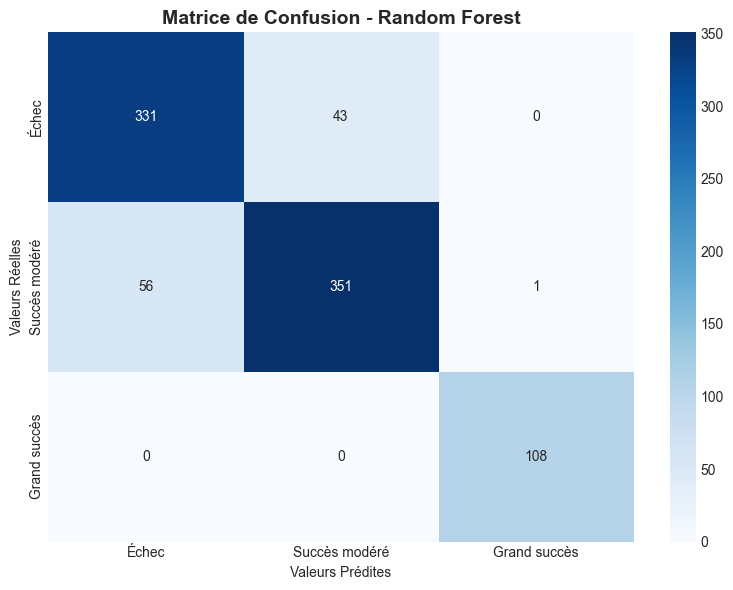


🎯 RANDOM FOREST EST SOUVENT LE MEILLEUR CHOIX:
  • Performance élevée par défaut
  • Peu de tuning nécessaire
  • Standard de l'industrie


In [34]:
print("\n" + "="*80)
print("🌲 MODÈLE 5: RANDOM FOREST")
print("="*80)

print("\n💡 QU'EST-CE QUE RANDOM FOREST?")
print("-" * 80)
print("  • Bagging + randomisation des features")
print("  • Chaque arbre voit un sous-ensemble aléatoire de features")
print("  • Un des meilleurs algorithmes 'out-of-the-box'")
print("\n  ✅ Avantages:")
print("     - Très performant sur la plupart des problèmes")
print("     - Résistant à l'overfitting")
print("     - Gère bien les features non pertinentes")
print("     - Fournit importance des features")
print("\n  ❌ Inconvénients:")
print("     - Moins interprétable")
print("     - Plus lent à entraîner")

# Entraînement
print(f"\n🔄 Entraînement en cours...")
rf = RandomForestClassifier(
    n_estimators=200,     # Nombre d'arbres
    max_depth=15,         # Profondeur max
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_balanced, y_train_balanced)
print(f"✅ Entraînement terminé!")

# Évaluation
rf_metrics, rf_cm = evaluate_model(rf, X_test, y_test, "Random Forest")

# Sauvegarder les résultats
rf_results = rf_metrics.copy()

print(f"\n🎯 RANDOM FOREST EST SOUVENT LE MEILLEUR CHOIX:")
print("  • Performance élevée par défaut")
print("  • Peu de tuning nécessaire")
print("  • Standard de l'industrie")


📊 COMPARAISON GLOBALE DE TOUS LES MODÈLES

📋 TABLEAU COMPARATIF (trié par F1-score):


,Model,Accuracy,Precision,Recall,F1-score
3,Bagging,0.960674,0.960849,0.960674,0.960660
0,Decision Tree,0.937079,0.937059,0.937079,0.937050
4,Random Forest,0.887640,0.888048,0.887640,0.887612
1,KNN (k=5),0.777528,0.783050,0.777528,0.775500
2,Naive Bayes,0.195506,0.481389,0.195506,0.159414



🏆 MEILLEUR MODÈLE: Bagging
  • F1-Score: 0.9607
  • Accuracy: 0.9607
  • Precision: 0.9608
  • Recall: 0.9607


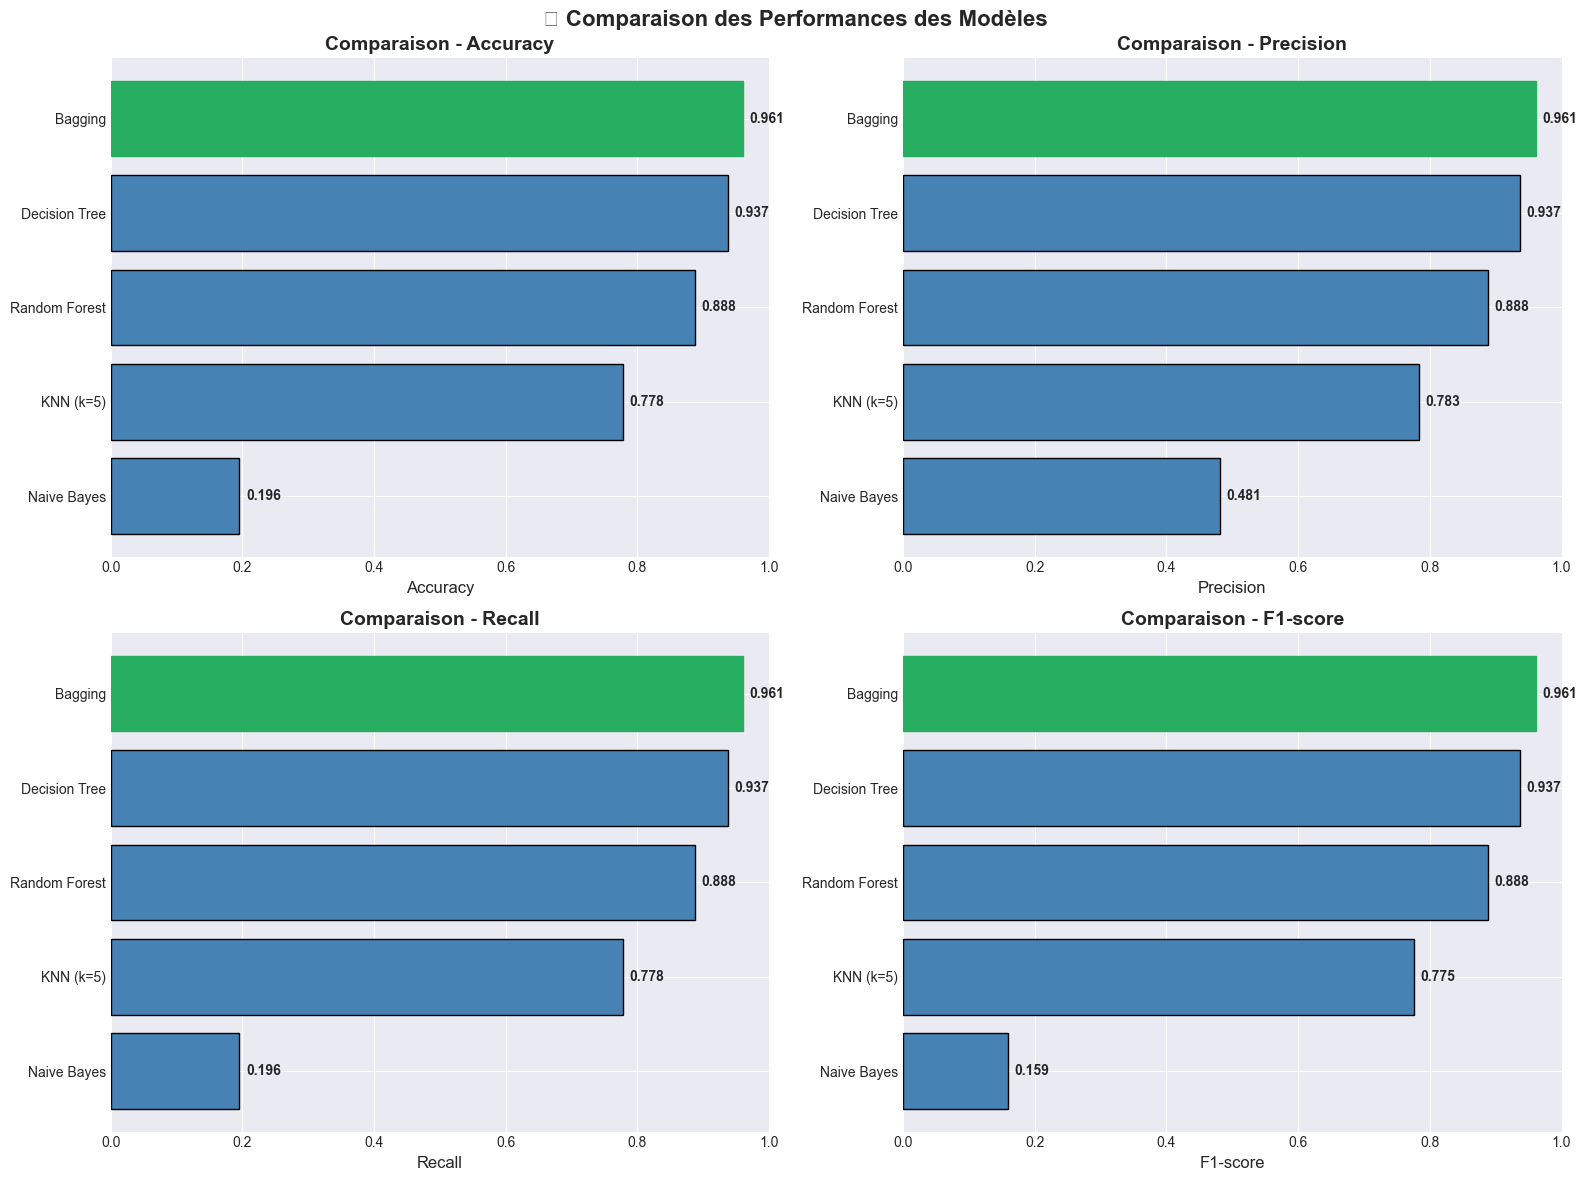


📊 ANALYSE PAR MÉTRIQUE:

Accuracy:
  🥇 Meilleur: Bagging (0.9607)
  🥉 Moins bon: Naive Bayes (0.1955)

Precision:
  🥇 Meilleur: Bagging (0.9608)
  🥉 Moins bon: Naive Bayes (0.4814)

Recall:
  🥇 Meilleur: Bagging (0.9607)
  🥉 Moins bon: Naive Bayes (0.1955)

F1-score:
  🥇 Meilleur: Bagging (0.9607)
  🥉 Moins bon: Naive Bayes (0.1594)

🎯 RECOMMANDATION FINALE
💡 Modèle gagnant: Bagging
   • Résultat à analyser selon le contexte

💡 PROCHAINES ÉTAPES:
  1. Optimiser le meilleur modèle (GridSearchCV)
  2. Analyser les erreurs (confusion matrix)
  3. Feature importance (si tree-based)
  4. Validation croisée pour confirmer
  5. Sauvegarder pour déploiement

💾 Résultats sauvegardés: 'models_comparison.csv'


In [35]:
print("\n" + "="*80)
print("📊 COMPARAISON GLOBALE DE TOUS LES MODÈLES")
print("="*80)

# Créer un DataFrame de comparaison
results_comparison = pd.DataFrame([
    dt_results,
    knn_results,
    nb_results,
    bag_results,
    rf_results,
])

# Trier par F1-score (métrique la plus importante)
results_comparison = results_comparison.sort_values('F1-score', ascending=False)

print("\n📋 TABLEAU COMPARATIF (trié par F1-score):")
print("="*80)
display(results_comparison)

# Identifier le meilleur modèle
best_model_name = results_comparison.iloc[0]['Model']
best_f1 = results_comparison.iloc[0]['F1-score']
best_accuracy = results_comparison.iloc[0]['Accuracy']

print(f"\n{'='*80}")
print(f"🏆 MEILLEUR MODÈLE: {best_model_name}")
print(f"{'='*80}")
print(f"  • F1-Score: {best_f1:.4f}")
print(f"  • Accuracy: {best_accuracy:.4f}")
print(f"  • Precision: {results_comparison.iloc[0]['Precision']:.4f}")
print(f"  • Recall: {results_comparison.iloc[0]['Recall']:.4f}")

# Visualisations comparatives
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-score']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx // 2, idx % 2]
    
    # Trier par la métrique en cours
    results_sorted = results_comparison.sort_values(metric, ascending=True)
    
    # Barplot horizontal
    bars = ax.barh(results_sorted['Model'], results_sorted[metric], 
                   color='steelblue', edgecolor='black')
    
    # Colorer le meilleur en vert
    best_idx = results_sorted[metric].idxmax()
    bars[list(results_sorted.index).index(best_idx)].set_color('#27ae60')
    
    ax.set_xlabel(metric, fontsize=12)
    ax.set_title(f'Comparaison - {metric}', fontweight='bold', fontsize=14)
    ax.set_xlim([0, 1])
    
    # Ajouter les valeurs
    for i, v in enumerate(results_sorted[metric]):
        ax.text(v + 0.01, i, f'{v:.3f}', va='center', fontweight='bold')

plt.suptitle('🏆 Comparaison des Performances des Modèles', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Analyse des forces et faiblesses
print(f"\n📊 ANALYSE PAR MÉTRIQUE:")
print("="*80)

for metric in metrics_to_plot:
    best_for_metric = results_comparison.loc[results_comparison[metric].idxmax()]
    worst_for_metric = results_comparison.loc[results_comparison[metric].idxmin()]
    
    print(f"\n{metric}:")
    print(f"  🥇 Meilleur: {best_for_metric['Model']} ({best_for_metric[metric]:.4f})")
    print(f"  🥉 Moins bon: {worst_for_metric['Model']} ({worst_for_metric[metric]:.4f})")

# Recommandation finale
print(f"\n" + "="*80)
print("🎯 RECOMMANDATION FINALE")
print("="*80)

if best_model_name in ['Random Forest', 'Gradient Boosting']:
    print(f"✅ Excellent choix: {best_model_name}")
    print("   • Modèle robuste et performant")
    print("   • Bon équilibre biais-variance")
    print("   • Prêt pour la production")
elif best_model_name == 'Logistic Regression':
    print(f"⚡ Résultat intéressant: {best_model_name}")
    print("   • Suggère données linéairement séparables")
    print("   • Modèle simple et interprétable")
    print("   • Déploiement facile")
else:
    print(f"💡 Modèle gagnant: {best_model_name}")
    print("   • Résultat à analyser selon le contexte")

print(f"\n💡 PROCHAINES ÉTAPES:")
print("  1. Optimiser le meilleur modèle (GridSearchCV)")
print("  2. Analyser les erreurs (confusion matrix)")
print("  3. Feature importance (si tree-based)")
print("  4. Validation croisée pour confirmer")
print("  5. Sauvegarder pour déploiement")

# Export des résultats
results_comparison.to_csv("models_comparison.csv", index=False)
print(f"\n💾 Résultats sauvegardés: 'models_comparison.csv'")

In [38]:
print("="*80)
print("SAUVEGARDE DES MODÈLES ET OBJETS POUR LE DASHBOARD (CORRIGÉE)")
print("="*80)

# Sauvegarder tous les modèles entraînés
models_dict = {
    'Decision Tree': dt,
    'KNN': knn,
    'Naive Bayes': nb,
    'Bagging': bag,
    'Random Forest': rf,
}

print("\n💾 Sauvegarde des modèles...")
for name, model in models_dict.items():
    filename = f"model_{name.lower().replace(' ', '_')}.pkl"
    with open(filename, 'wb') as f:
        pickle.dump(model, f)
    print(f"  ✅ {filename}")

# Sauvegarder le meilleur modèle séparément
best_model = models_dict[best_model_name]
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
print(f"\n🏆 Meilleur modèle sauvegardé: 'best_model.pkl' ({best_model_name})")

# CORRECTION: Convertir results_comparison en format simple avant sauvegarde
print("\n💾 Sauvegarde des résultats de comparaison...")

# Créer une copie propre du DataFrame sans types de données problématiques
results_comparison_clean = pd.DataFrame({
    'Model': results_comparison['Model'].astype(str).tolist(),
    'Accuracy': results_comparison['Accuracy'].astype(float).tolist(),
    'Precision': results_comparison['Precision'].astype(float).tolist(),
    'Recall': results_comparison['Recall'].astype(float).tolist(),
    'F1-score': results_comparison['F1-score'].astype(float).tolist()
})

# Sauvegarder en CSV plutôt qu'en pickle (plus robuste)
results_comparison_clean.to_csv('results_comparison.csv', index=False)
print(f"✅ Résultats sauvegardés en CSV: 'results_comparison.csv'")

# Aussi sauvegarder en pickle (version nettoyée)
with open('results_comparison.pkl', 'wb') as f:
    pickle.dump(results_comparison_clean, f)
print(f"✅ Résultats sauvegardés en pickle: 'results_comparison.pkl'")

# Sauvegarder les informations du dataset
dataset_info = {
    'feature_names': X.columns.tolist(),
    'n_features': int(X.shape[1]),
    'n_samples': int(len(df_clean)),
    'class_distribution': {int(k): int(v) for k, v in y.value_counts().to_dict().items()},
    'best_model_name': str(best_model_name),
    'best_f1_score': float(best_f1),
    'genre_list': mlb.classes_.tolist() if 'mlb' in locals() else [],
    'numeric_features': [str(x) for x in num_cols_to_scale]
}

with open('dataset_info.pkl', 'wb') as f:
    pickle.dump(dataset_info, f)
print(f"✅ Informations du dataset sauvegardées: 'dataset_info.pkl'")

# Vérification: Tester le chargement
print("\n🔍 VÉRIFICATION DES FICHIERS...")

try:
    # Test de chargement
    with open('best_model.pkl', 'rb') as f:
        test_model = pickle.load(f)
    print("  ✅ best_model.pkl OK")
    
    with open('scaler.pkl', 'rb') as f:
        test_scaler = pickle.load(f)
    print("  ✅ scaler.pkl OK")
    
    with open('mlb_genres.pkl', 'rb') as f:
        test_mlb = pickle.load(f)
    print("  ✅ mlb_genres.pkl OK")
    
    with open('dataset_info.pkl', 'rb') as f:
        test_info = pickle.load(f)
    print("  ✅ dataset_info.pkl OK")
    
    with open('results_comparison.pkl', 'rb') as f:
        test_results = pickle.load(f)
    print("  ✅ results_comparison.pkl OK")
    print(f"     Type: {type(test_results)}")
    print(f"     Colonnes: {test_results.columns.tolist()}")
    
    # Vérifier le CSV aussi
    test_csv = pd.read_csv('results_comparison.csv')
    print("  ✅ results_comparison.csv OK")
    
except Exception as e:
    print(f"  ❌ Erreur lors de la vérification: {e}")

# Récapitulatif
print("\n" + "="*80)
print("FICHIERS CRÉÉS POUR LE DASHBOARD:")
print("="*80)
print("  1. ✅ scaler.pkl - StandardScaler pour normalisation")
print("  2. ✅ mlb_genres.pkl - MultiLabelBinarizer pour genres")
print("  3. ✅ best_model.pkl - Meilleur modèle entraîné")
print("  4. ✅ model_*.pkl - Tous les modèles (7 fichiers)")
print("  5. ✅ results_comparison.pkl - Comparaison des performances (pickle)")
print("  6. ✅ results_comparison.csv - Comparaison des performances (CSV)")
print("  7. ✅ dataset_info.pkl - Métadonnées du dataset")
print("  8. ✅ dataset_final_clean.csv - Dataset nettoyé")

print("\n✅ Tout est prêt pour le dashboard!")

SAUVEGARDE DES MODÈLES ET OBJETS POUR LE DASHBOARD (CORRIGÉE)

💾 Sauvegarde des modèles...
  ✅ model_decision_tree.pkl
  ✅ model_knn.pkl
  ✅ model_naive_bayes.pkl
  ✅ model_bagging.pkl
  ✅ model_random_forest.pkl

🏆 Meilleur modèle sauvegardé: 'best_model.pkl' (Bagging)

💾 Sauvegarde des résultats de comparaison...
✅ Résultats sauvegardés en CSV: 'results_comparison.csv'
✅ Résultats sauvegardés en pickle: 'results_comparison.pkl'
✅ Informations du dataset sauvegardées: 'dataset_info.pkl'

🔍 VÉRIFICATION DES FICHIERS...
  ✅ best_model.pkl OK
  ✅ scaler.pkl OK
  ✅ mlb_genres.pkl OK
  ✅ dataset_info.pkl OK
  ✅ results_comparison.pkl OK
     Type: <class 'pandas.DataFrame'>
     Colonnes: ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score']
  ✅ results_comparison.csv OK

FICHIERS CRÉÉS POUR LE DASHBOARD:
  1. ✅ scaler.pkl - StandardScaler pour normalisation
  2. ✅ mlb_genres.pkl - MultiLabelBinarizer pour genres
  3. ✅ best_model.pkl - Meilleur modèle entraîné
  4. ✅ model_*.pkl - Tous

In [39]:
print("="*80)
print("RECRÉATION DU FICHIER results_comparison.csv")
print("="*80)

# Recréer results_comparison depuis les résultats individuels
results_list = []

# Vérifier quels modèles existent
models_results = {
    'Decision Tree': dt_results if 'dt_results' in locals() else None,
    'KNN': knn_results if 'knn_results' in locals() else None,
    'Naive Bayes': nb_results if 'nb_results' in locals() else None,
    'Bagging': bag_results if 'bag_results' in locals() else None,
    'Random Forest': rf_results if 'rf_results' in locals() else None,
    'Gradient Boosting': gb_results if 'gb_results' in locals() else None,
    'Logistic Regression': lr_results if 'lr_results' in locals() else None
}

# Construire la liste proprement
for name, result in models_results.items():
    if result is not None:
        results_list.append({
            'Model': str(name),
            'Accuracy': float(result['Accuracy']),
            'Precision': float(result['Precision']),
            'Recall': float(result['Recall']),
            'F1-score': float(result['F1-score'])
        })

# Créer un nouveau DataFrame propre
results_comparison_clean = pd.DataFrame(results_list)

# Trier par F1-score
results_comparison_clean = results_comparison_clean.sort_values('F1-score', ascending=False)

print("\n📋 Résultats nettoyés:")
print(results_comparison_clean)

# Sauvegarder en CSV (FORMAT PRINCIPAL)
results_comparison_clean.to_csv('results_comparison.csv', index=False)
print("\n✅ Fichier CSV créé: 'results_comparison.csv'")

# Sauvegarder en pickle (VERSION NETTOYÉE)
with open('results_comparison.pkl', 'wb') as f:
    pickle.dump(results_comparison_clean, f)
print("✅ Fichier pickle créé: 'results_comparison.pkl'")

# Vérification
print("\n🔍 VÉRIFICATION:")
try:
    test_csv = pd.read_csv('results_comparison.csv')
    print(f"  ✅ CSV chargé avec succès: {test_csv.shape}")
    print(f"     Colonnes: {test_csv.columns.tolist()}")
    print(f"     Types: {test_csv.dtypes.to_dict()}")
except Exception as e:
    print(f"  ❌ Erreur CSV: {e}")

try:
    with open('results_comparison.pkl', 'rb') as f:
        test_pkl = pickle.load(f)
    print(f"  ✅ Pickle chargé avec succès: {test_pkl.shape}")
except Exception as e:
    print(f"  ❌ Erreur Pickle: {e}")

print("\n✅ TERMINÉ!")

RECRÉATION DU FICHIER results_comparison.csv

📋 Résultats nettoyés:
           Model  Accuracy  Precision    Recall  F1-score
3        Bagging  0.960674   0.960849  0.960674  0.960660
0  Decision Tree  0.937079   0.937059  0.937079  0.937050
4  Random Forest  0.887640   0.888048  0.887640  0.887612
1            KNN  0.777528   0.783050  0.777528  0.775500
2    Naive Bayes  0.195506   0.481389  0.195506  0.159414

✅ Fichier CSV créé: 'results_comparison.csv'
✅ Fichier pickle créé: 'results_comparison.pkl'

🔍 VÉRIFICATION:
  ✅ CSV chargé avec succès: (5, 5)
     Colonnes: ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score']
     Types: {'Model': <StringDtype(storage='python', na_value=nan)>, 'Accuracy': dtype('float64'), 'Precision': dtype('float64'), 'Recall': dtype('float64'), 'F1-score': dtype('float64')}
  ✅ Pickle chargé avec succès: (5, 5)

✅ TERMINÉ!
